In [1]:
# -*- coding: utf-8 -*-

from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import time
import math
import random
import pandas as pd
import scipy.signal
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable
import torch.distributions as dist
from data_prepare import *

torch.manual_seed(1)

MAX_LENGTH = 100
torch.cuda.set_device(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print('ok')
length = 31
predict_length = 30
batch_size = 128
Training_generator, Test, Valid, WholeSet= get_dataloader(batch_size,length,predict_length)
class TraPred(nn.Module):
    def __init__(self, input_size, output_size,hidden_size,batch_size, dropout=0.8):
        super(TraPred, self).__init__()
        
        self.batch_size = batch_size
        self.hidden_size = hidden_size
        self.num_layers = 2

        self.in2lstm = nn.Linear(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size,num_layers=self.num_layers,bidirectional=False,batch_first=True,dropout =dropout)
        self.in2bilstm = nn.Linear(input_size, hidden_size)
        self.bilstm = nn.LSTM(hidden_size, hidden_size//2,num_layers=self.num_layers,bidirectional=True,batch_first=True,dropout =dropout)
    
        self.fc0 = nn.Linear(hidden_size,hidden_size*2)
        self.fc1 = nn.Linear(hidden_size*2,int(hidden_size/2))
        self.in2out = nn.Linear(input_size, int(hidden_size/2))
        self.fc2 = nn.Linear(int(hidden_size/2) ,output_size)
        self.tanh = nn.Tanh()
        
    def forward(self, input):
        #input = tensor shape[batchsize, len, num_features]
        bilstm_out,_= self.bilstm(self.in2bilstm(input))
        lstm_out,_= self.lstm(self.in2lstm(input))
        out = self.tanh(self.fc0(lstm_out+bilstm_out))
        out = self.tanh(self.fc1(out))
        out =  out + self.in2out(input)
        output = self.fc2(out)# range [0 -> 1 ]
        return output

ok
        Unnamed: 0      ID   Global_Time   Local_X   Local_Y    Length  \
37629        37629   720.0  1.594101e+09 -20748.23 -42024.51  1.969138   
37630        37630   720.0  1.594101e+09 -20746.71 -42024.38  1.772401   
37631        37631   720.0  1.594101e+09 -20745.20 -42024.34  1.755875   
37632        37632   720.0  1.594101e+09 -20743.71 -42024.66  1.938756   
37633        37633   720.0  1.594101e+09 -20742.24 -42024.61  1.898651   
...            ...     ...           ...       ...       ...       ...   
135883      135883  4500.0  1.594104e+09 -20892.13 -42022.04  0.765589   
135884      135884  4500.0  1.594104e+09 -20890.31 -42022.05  0.732798   
135885      135885  4500.0  1.594104e+09 -20888.50 -42022.02  0.699111   
135886      135886  4500.0  1.594104e+09 -20886.68 -42022.02  0.666622   
135887      135887  4500.0  1.594104e+09 -20885.42 -42022.01  0.633604   

           Width  Class        Vel       Acc  ...  angler_top_6  behar_top_6  \
37629   1.664591    5.0   7.

Vhicle ID: 1673.0  Total trajectory point: 1229 Total Trajectory: 1168
Vhicle ID: 1678.0  Total trajectory point: 100 Total Trajectory: 39
Vhicle ID: 1697.0  Total trajectory point: 1757 Total Trajectory: 1696
Vhicle ID: 1722.0  Total trajectory point: 89 Total Trajectory: 28
Vhicle ID: 1736.0  Total trajectory point: 66 Total Trajectory: 5
Vhicle ID: 1752.0  Total trajectory point: 70 Total Trajectory: 9
Vhicle ID: 1753.0  Total trajectory point: 64 Total Trajectory: 3
Vhicle ID: 1755.0  Total trajectory point: 67 Total Trajectory: 6
Vhicle ID: 1759.0  Total trajectory point: 64 Total Trajectory: 3
Vhicle ID: 1761.0  Total trajectory point: 134 Total Trajectory: 73
Vhicle ID: 1802.0  Total trajectory point: 104 Total Trajectory: 43
Vhicle ID: 1829.0  Total trajectory point: 91 Total Trajectory: 30
Vhicle ID: 1833.0  Total trajectory point: 270 Total Trajectory: 209
Vhicle ID: 1834.0  Total trajectory point: 108 Total Trajectory: 47
Vhicle ID: 1841.0  Total trajectory point: 262 Total 

Vhicle ID: 3260.0  Total trajectory point: 274 Total Trajectory: 213
Vhicle ID: 3271.0  Total trajectory point: 141 Total Trajectory: 80
Vhicle ID: 3272.0  Total trajectory point: 92 Total Trajectory: 31
Vhicle ID: 3273.0  Total trajectory point: 70 Total Trajectory: 9
Vhicle ID: 3278.0  Total trajectory point: 89 Total Trajectory: 28
Vhicle ID: 3285.0  Total trajectory point: 99 Total Trajectory: 38
Vhicle ID: 3292.0  Total trajectory point: 102 Total Trajectory: 41
Vhicle ID: 3295.0  Total trajectory point: 114 Total Trajectory: 53
Vhicle ID: 3298.0  Total trajectory point: 539 Total Trajectory: 478
Vhicle ID: 3300.0  Total trajectory point: 246 Total Trajectory: 185
Vhicle ID: 3301.0  Total trajectory point: 225 Total Trajectory: 164
Vhicle ID: 3315.0  Total trajectory point: 75 Total Trajectory: 14
Vhicle ID: 3328.0  Total trajectory point: 92 Total Trajectory: 31
Vhicle ID: 3329.0  Total trajectory point: 79 Total Trajectory: 18
Vhicle ID: 3332.0  Total trajectory point: 62 Total 

****************************** ——-————-————-————-————-————-————-————-————-————-————-————-————-————-————-————-————-————-————-————-—— ******************************
轨迹条数： 34544
---轨迹输入数据结构： torch.Size([128, 31, 44]) ---轨迹输出数据结构： torch.Size([128, 31, 4]) --行为输入数据结构
---轨迹长度： 31 ---预测轨迹长度： 30


In [2]:
def trainIters(encoder, epoches,learning_rate=0.0001,print_every=7):
    encoder_optimizer = optim.Adam(encoder.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(encoder_optimizer,mode='min',
factor=0.1, patience=120,verbose=True,threshold=0.0001,threshold_mode='rel',cooldown=0,min_lr=0,eps=1e-015)
    #criterion = nn.MSELoss(reduction='sum')
    criterion = nn.MSELoss()
    loss_min = np.inf
    train_losses =[]
    valid_losses =[]
    encoder.train()
    for e in range(1, epoches + 1):
        train_loss = []
        for batch_i,(local_batch, local_labels) in enumerate(Training_generator):
            encoder.zero_grad()
            local_batch = local_batch.to(device)
            local_labels = local_labels.to(device)
            
            predY = encoder(local_batch)
            loss = criterion(predY,local_labels).to(device)
            loss.backward()
            encoder_optimizer.step()
            train_loss.append(loss.item())
            if batch_i % print_every == 0:     
                valid_loss = []
                encoder.eval()
                for x,y in Valid:
                    x,y = x.to(device),y.to(device)
                    predict = encoder(x)
                    loss_valid = criterion(predict,y)
                    valid_loss.append(loss_valid.item())
                encoder.train()
                train_loss_mean = np.mean(train_loss)
                valid_loss_mean = np.mean(valid_loss)
                train_losses.append(train_loss_mean)
                valid_losses.append(valid_loss_mean)
                scheduler.step(valid_loss_mean)
                print("Epoch:{}/{},Step:{}/{}".format(e,epoches,batch_i,len(Training_generator)),
                  "Train_Loss:{},Valid_Loss: {}".format(train_loss_mean,valid_loss_mean))
                if valid_loss_mean < loss_min :                             
                    print("valid_loss decrease!!!save the model.")
                    loss_min = valid_loss_mean
                    torch.save(encoder.state_dict(),'model/trajectory_predict_0707_44_4_30.pt')
                #torch.save(encoder.state_dict(),'model/trajectory_predict_68_4_30_each.pt')
    plt.plot(train_losses,color = 'r',label = 'Train_Loss')
    plt.plot(valid_losses,color = 'g',label = 'Valid_Loss')
    plt.title('Loss_Trend')
    plt.xlabel('Epoches')
    plt.ylabel('Loss')
    plt.legend()
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.savefig('image/trajectory_loss_improve1_0707_44_4_30.svg',dpi=600)

In [3]:
train_iter = iter(Training_generator)
x, y = train_iter.next()
print(x.shape, y.shape)
hidden_size = 256
Prednet = TraPred(x.shape[2], y.shape[2], hidden_size, x.shape[0])

torch.Size([128, 31, 44]) torch.Size([128, 31, 4])


Epoch:1/1000,Step:0/216 Train_Loss:1.1171176760538382,Valid_Loss: 0.9712960143761131
valid_loss decrease!!!save the model.
Epoch:1/1000,Step:20/216 Train_Loss:0.3574091461577081,Valid_Loss: 0.09273161545941823
valid_loss decrease!!!save the model.
Epoch:1/1000,Step:40/216 Train_Loss:0.21977093387621094,Valid_Loss: 0.05420169190794723
valid_loss decrease!!!save the model.
Epoch:1/1000,Step:60/216 Train_Loss:0.16398004103230815,Valid_Loss: 0.04047136813568189
valid_loss decrease!!!save the model.
Epoch:1/1000,Step:80/216 Train_Loss:0.13569491704433687,Valid_Loss: 0.03543751505946813
valid_loss decrease!!!save the model.
Epoch:1/1000,Step:100/216 Train_Loss:0.11705463886334336,Valid_Loss: 0.034095651981815085
valid_loss decrease!!!save the model.
Epoch:1/1000,Step:120/216 Train_Loss:0.10334959423080714,Valid_Loss: 0.030899348502372928
valid_loss decrease!!!save the model.
Epoch:1/1000,Step:140/216 Train_Loss:0.09387585338267679,Valid_Loss: 0.029961661268643986
valid_loss decrease!!!save t

Epoch:7/1000,Step:160/216 Train_Loss:0.010013776319203978,Valid_Loss: 0.00894526720023872
Epoch:7/1000,Step:180/216 Train_Loss:0.010532843249826892,Valid_Loss: 0.009037638132719494
Epoch:7/1000,Step:200/216 Train_Loss:0.010370570110090183,Valid_Loss: 0.006884351736768982
Epoch:8/1000,Step:0/216 Train_Loss:0.005529466044253532,Valid_Loss: 0.007005802675715465
Epoch:8/1000,Step:20/216 Train_Loss:0.007895032567364707,Valid_Loss: 0.007131304978035126
Epoch:8/1000,Step:40/216 Train_Loss:0.009290631055998559,Valid_Loss: 0.0066844783759644885
Epoch:8/1000,Step:60/216 Train_Loss:0.009462138527605987,Valid_Loss: 0.007463095505137657
Epoch:8/1000,Step:80/216 Train_Loss:0.009166446968255993,Valid_Loss: 0.006178464871866751
Epoch:8/1000,Step:100/216 Train_Loss:0.009051686117533977,Valid_Loss: 0.006185142416900053
Epoch:8/1000,Step:120/216 Train_Loss:0.009732712235683592,Valid_Loss: 0.006661211669024071
Epoch:8/1000,Step:140/216 Train_Loss:0.009803529612692805,Valid_Loss: 0.00625378606772596
Epoch:

Epoch:15/1000,Step:100/216 Train_Loss:0.005714743904810124,Valid_Loss: 0.0036975707655680806
Epoch:15/1000,Step:120/216 Train_Loss:0.005754382109182559,Valid_Loss: 0.0036770221194986196
Epoch:15/1000,Step:140/216 Train_Loss:0.005768965164808459,Valid_Loss: 0.0032891390960558286
valid_loss decrease!!!save the model.
Epoch:15/1000,Step:160/216 Train_Loss:0.005639861206422291,Valid_Loss: 0.0033616371919032413
Epoch:15/1000,Step:180/216 Train_Loss:0.005588631379473208,Valid_Loss: 0.0033962827345715143
Epoch:15/1000,Step:200/216 Train_Loss:0.005521356841194771,Valid_Loss: 0.0034365328762904234
Epoch:16/1000,Step:0/216 Train_Loss:0.003589628121461678,Valid_Loss: 0.003245920595003604
valid_loss decrease!!!save the model.
Epoch:16/1000,Step:20/216 Train_Loss:0.004155543174276672,Valid_Loss: 0.0031052939963406587
valid_loss decrease!!!save the model.
Epoch:16/1000,Step:40/216 Train_Loss:0.005095021341482639,Valid_Loss: 0.013234444859462083
Epoch:16/1000,Step:60/216 Train_Loss:0.0053368887132737

Epoch:23/1000,Step:40/216 Train_Loss:0.0029415055812760517,Valid_Loss: 0.0024995702415774473
Epoch:23/1000,Step:60/216 Train_Loss:0.003125782842996605,Valid_Loss: 0.002473832325910741
Epoch:23/1000,Step:80/216 Train_Loss:0.00302729835802563,Valid_Loss: 0.002023961027607949
valid_loss decrease!!!save the model.
Epoch:23/1000,Step:100/216 Train_Loss:0.0029525326047698647,Valid_Loss: 0.002090447656000636
Epoch:23/1000,Step:120/216 Train_Loss:0.002897454480874495,Valid_Loss: 0.0022205460940071006
Epoch:23/1000,Step:140/216 Train_Loss:0.0029001510264339177,Valid_Loss: 0.002383927658916284
Epoch:23/1000,Step:160/216 Train_Loss:0.002871313309361227,Valid_Loss: 0.0025629616311205828
Epoch:23/1000,Step:180/216 Train_Loss:0.0028840523461342218,Valid_Loss: 0.0023447255287708723
Epoch:23/1000,Step:200/216 Train_Loss:0.0029126146542714213,Valid_Loss: 0.0022602739956233
Epoch:24/1000,Step:0/216 Train_Loss:0.002692614146766076,Valid_Loss: 0.0021574387213201067
Epoch:24/1000,Step:20/216 Train_Loss:0.0

Epoch:30/1000,Step:180/216 Train_Loss:0.002013168016073505,Valid_Loss: 0.001631580769725771
Epoch:30/1000,Step:200/216 Train_Loss:0.0020010622599689262,Valid_Loss: 0.0015805294118336258
Epoch:31/1000,Step:0/216 Train_Loss:0.001745915721324961,Valid_Loss: 0.0016070939682253367
Epoch:31/1000,Step:20/216 Train_Loss:0.0018970046847132135,Valid_Loss: 0.0016419511005767412
Epoch:31/1000,Step:40/216 Train_Loss:0.0019163466366828301,Valid_Loss: 0.001600013500513173
Epoch:31/1000,Step:60/216 Train_Loss:0.0019099177480078296,Valid_Loss: 0.0018028649838468494
Epoch:31/1000,Step:80/216 Train_Loss:0.0018898214741780422,Valid_Loss: 0.0015312992771166283
valid_loss decrease!!!save the model.
Epoch:31/1000,Step:100/216 Train_Loss:0.0018861759349466482,Valid_Loss: 0.0016393054152512747
Epoch:31/1000,Step:120/216 Train_Loss:0.0018807353666292284,Valid_Loss: 0.0014538961016146842
valid_loss decrease!!!save the model.
Epoch:31/1000,Step:140/216 Train_Loss:0.0018845752783161296,Valid_Loss: 0.00152055235524

Epoch:38/1000,Step:120/216 Train_Loss:0.0016341888814769012,Valid_Loss: 0.0013692196431055082
Epoch:38/1000,Step:140/216 Train_Loss:0.001638315305877077,Valid_Loss: 0.0013937527384415638
Epoch:38/1000,Step:160/216 Train_Loss:0.0016359414357696733,Valid_Loss: 0.0013641959959292032
Epoch:38/1000,Step:180/216 Train_Loss:0.001645801571937009,Valid_Loss: 0.0013214105064353633
Epoch:38/1000,Step:200/216 Train_Loss:0.0017155184739830567,Valid_Loss: 0.0022247682850002164
Epoch:39/1000,Step:0/216 Train_Loss:0.003968179560221867,Valid_Loss: 0.003243800191750537
Epoch:39/1000,Step:20/216 Train_Loss:0.0047688292090001345,Valid_Loss: 0.0035395523633481706
Epoch:39/1000,Step:40/216 Train_Loss:0.004453442047722111,Valid_Loss: 0.003178000643026165
Epoch:39/1000,Step:60/216 Train_Loss:0.004219252536012458,Valid_Loss: 0.002865044924021797
Epoch:39/1000,Step:80/216 Train_Loss:0.004008029342809382,Valid_Loss: 0.0025324143944554156
Epoch:39/1000,Step:100/216 Train_Loss:0.003752381489381509,Valid_Loss: 0.00

Epoch:46/1000,Step:100/216 Train_Loss:0.0015658472507948723,Valid_Loss: 0.0013214112190303732
Epoch:46/1000,Step:120/216 Train_Loss:0.0015521418157061835,Valid_Loss: 0.0011755439382330585
Epoch:46/1000,Step:140/216 Train_Loss:0.0015268047416199528,Valid_Loss: 0.001196041654086837
Epoch:46/1000,Step:160/216 Train_Loss:0.0015258305543177234,Valid_Loss: 0.0012219809740075705
Epoch:46/1000,Step:180/216 Train_Loss:0.0015243978651703655,Valid_Loss: 0.0011394209617549072
Epoch:46/1000,Step:200/216 Train_Loss:0.0015123332487994095,Valid_Loss: 0.0012275562942570073
Epoch:47/1000,Step:0/216 Train_Loss:0.002676802529538031,Valid_Loss: 0.0012007607299093096
Epoch:47/1000,Step:20/216 Train_Loss:0.001436783908630703,Valid_Loss: 0.0011933394348105921
Epoch:47/1000,Step:40/216 Train_Loss:0.0013856061387791429,Valid_Loss: 0.0011157554365623392
Epoch:47/1000,Step:60/216 Train_Loss:0.0013739464142279822,Valid_Loss: 0.0010995192315029257
Epoch:47/1000,Step:80/216 Train_Loss:0.0013644285947583166,Valid_Los

Epoch:54/1000,Step:80/216 Train_Loss:0.0011042462818150326,Valid_Loss: 0.0009111540586056138
Epoch:54/1000,Step:100/216 Train_Loss:0.0011121646130200652,Valid_Loss: 0.0009077120718527903
Epoch:54/1000,Step:120/216 Train_Loss:0.0011004790312700412,Valid_Loss: 0.0008742537876276159
valid_loss decrease!!!save the model.
Epoch:54/1000,Step:140/216 Train_Loss:0.0010899987559558843,Valid_Loss: 0.000963790627237296
Epoch:54/1000,Step:160/216 Train_Loss:0.0010965819287166933,Valid_Loss: 0.001026856824184958
Epoch:54/1000,Step:180/216 Train_Loss:0.0011144620358889265,Valid_Loss: 0.0011148398503433785
Epoch:54/1000,Step:200/216 Train_Loss:0.0011289859523563668,Valid_Loss: 0.0010774087198914244
Epoch:55/1000,Step:0/216 Train_Loss:0.0011793749367298542,Valid_Loss: 0.0010631133379347872
Epoch:55/1000,Step:20/216 Train_Loss:0.0011000513782420986,Valid_Loss: 0.0010570960399428687
Epoch:55/1000,Step:40/216 Train_Loss:0.0011162664709262523,Valid_Loss: 0.0010155199344404797
Epoch:55/1000,Step:60/216 Tra

Epoch:62/1000,Step:100/216 Train_Loss:0.001342259306003757,Valid_Loss: 0.0011107817095876887
Epoch:62/1000,Step:120/216 Train_Loss:0.001332025138402359,Valid_Loss: 0.0011626100800798123
Epoch:62/1000,Step:140/216 Train_Loss:0.0013347662134084008,Valid_Loss: 0.0011866880354909999
Epoch:62/1000,Step:160/216 Train_Loss:0.0013299175349830833,Valid_Loss: 0.001057542096955264
Epoch:62/1000,Step:180/216 Train_Loss:0.0013164954882077175,Valid_Loss: 0.0010616231748752322
Epoch:62/1000,Step:200/216 Train_Loss:0.0013174564897119776,Valid_Loss: 0.0010977912202022677
Epoch:63/1000,Step:0/216 Train_Loss:0.0011101681008642763,Valid_Loss: 0.0010692551409401856
Epoch:63/1000,Step:20/216 Train_Loss:0.0012867755270588423,Valid_Loss: 0.0010190697084729407
Epoch:63/1000,Step:40/216 Train_Loss:0.0012483800429108763,Valid_Loss: 0.0010402298790384075
Epoch:63/1000,Step:60/216 Train_Loss:0.0012436355921544994,Valid_Loss: 0.0010278036637411268
Epoch:63/1000,Step:80/216 Train_Loss:0.0012380203118001537,Valid_Los

Epoch:69/1000,Step:100/216 Train_Loss:0.0008684775554910766,Valid_Loss: 0.0007149224392235357
Epoch:69/1000,Step:120/216 Train_Loss:0.0008793565008979412,Valid_Loss: 0.0007151805457312144
Epoch:69/1000,Step:140/216 Train_Loss:0.0008730463755521084,Valid_Loss: 0.0007144731388958057
Epoch:69/1000,Step:160/216 Train_Loss:0.0008670366155019997,Valid_Loss: 0.0007124902951417751
valid_loss decrease!!!save the model.
Epoch:69/1000,Step:180/216 Train_Loss:0.0008628744494924023,Valid_Loss: 0.0007139399401134923
Epoch:69/1000,Step:200/216 Train_Loss:0.0008632450223371143,Valid_Loss: 0.0007116339810398198
valid_loss decrease!!!save the model.
Epoch:70/1000,Step:0/216 Train_Loss:0.0007518478686740304,Valid_Loss: 0.0007182095757865007
Epoch:70/1000,Step:20/216 Train_Loss:0.0008348073245836046,Valid_Loss: 0.0007198816226620905
Epoch:70/1000,Step:40/216 Train_Loss:0.0008606924999763545,Valid_Loss: 0.0007110116264460701
valid_loss decrease!!!save the model.
Epoch:70/1000,Step:60/216 Train_Loss:0.00086

Epoch:76/1000,Step:180/216 Train_Loss:0.0008090345891227776,Valid_Loss: 0.0006736912083756945
Epoch:76/1000,Step:200/216 Train_Loss:0.0008071303276579107,Valid_Loss: 0.0006726852443393569
Epoch:77/1000,Step:0/216 Train_Loss:0.0006393869805443909,Valid_Loss: 0.000668059117919248
valid_loss decrease!!!save the model.
Epoch:77/1000,Step:20/216 Train_Loss:0.0007826824690742558,Valid_Loss: 0.0006712973509814849
Epoch:77/1000,Step:40/216 Train_Loss:0.0007877458298500571,Valid_Loss: 0.0006697928985089388
Epoch:77/1000,Step:60/216 Train_Loss:0.0007869259983709581,Valid_Loss: 0.0006731826903482743
Epoch:77/1000,Step:80/216 Train_Loss:0.0007788129237729006,Valid_Loss: 0.000675531065420674
Epoch:77/1000,Step:100/216 Train_Loss:0.0007914318550894398,Valid_Loss: 0.0006692945790584304
Epoch:77/1000,Step:120/216 Train_Loss:0.0007936715063564827,Valid_Loss: 0.0006718255218317545
Epoch:77/1000,Step:140/216 Train_Loss:0.0007976278079044113,Valid_Loss: 0.0006629546865409334
valid_loss decrease!!!save the

Epoch:84/1000,Step:100/216 Train_Loss:0.0007355767306988323,Valid_Loss: 0.0006295411289914046
Epoch:84/1000,Step:120/216 Train_Loss:0.0007457862305846749,Valid_Loss: 0.0006392779948237617
Epoch:84/1000,Step:140/216 Train_Loss:0.0007464355635738738,Valid_Loss: 0.0006344766615363061
Epoch:84/1000,Step:160/216 Train_Loss:0.0007454201527795923,Valid_Loss: 0.0006373734382764953
Epoch:84/1000,Step:180/216 Train_Loss:0.0007475188515377084,Valid_Loss: 0.0006354408062202021
Epoch:84/1000,Step:200/216 Train_Loss:0.0007452479582681162,Valid_Loss: 0.000628094753445541
Epoch:85/1000,Step:0/216 Train_Loss:0.0006877618788515015,Valid_Loss: 0.0006261763130063171
valid_loss decrease!!!save the model.
Epoch:85/1000,Step:20/216 Train_Loss:0.0007286730515517506,Valid_Loss: 0.0006370986364761675
Epoch:85/1000,Step:40/216 Train_Loss:0.0007418618440168122,Valid_Loss: 0.0006338922466071816
Epoch:85/1000,Step:60/216 Train_Loss:0.0007380447913169099,Valid_Loss: 0.0006331846205281725
Epoch:85/1000,Step:80/216 Tr

Epoch:92/1000,Step:0/216 Train_Loss:0.0006600387409746243,Valid_Loss: 0.0006015655346738777
Epoch:92/1000,Step:20/216 Train_Loss:0.000692700734138515,Valid_Loss: 0.0005889553863312151
valid_loss decrease!!!save the model.
Epoch:92/1000,Step:40/216 Train_Loss:0.0006921026414464311,Valid_Loss: 0.0005889846580264048
Epoch:92/1000,Step:60/216 Train_Loss:0.0006935903958649938,Valid_Loss: 0.0005842450943335079
valid_loss decrease!!!save the model.
Epoch:92/1000,Step:80/216 Train_Loss:0.0006944717167881565,Valid_Loss: 0.0005888880376099458
Epoch:92/1000,Step:100/216 Train_Loss:0.0006974242440160627,Valid_Loss: 0.0005874343516332147
Epoch:92/1000,Step:120/216 Train_Loss:0.0006910508464543672,Valid_Loss: 0.0005837492129074101
valid_loss decrease!!!save the model.
Epoch:92/1000,Step:140/216 Train_Loss:0.0006938975914485231,Valid_Loss: 0.0005967176447120277
Epoch:92/1000,Step:160/216 Train_Loss:0.0006929188194317923,Valid_Loss: 0.0005788942926437314
valid_loss decrease!!!save the model.
Epoch:92/

Epoch:99/1000,Step:80/216 Train_Loss:0.0006424724175844345,Valid_Loss: 0.0005473913808310005
valid_loss decrease!!!save the model.
Epoch:99/1000,Step:100/216 Train_Loss:0.0006443995004174957,Valid_Loss: 0.0005495132587307621
Epoch:99/1000,Step:120/216 Train_Loss:0.0006439000406428779,Valid_Loss: 0.0005566193835631882
Epoch:99/1000,Step:140/216 Train_Loss:0.0006464857488796036,Valid_Loss: 0.0005646000953721359
Epoch:99/1000,Step:160/216 Train_Loss:0.0006456894630802875,Valid_Loss: 0.0005527914925464482
Epoch:99/1000,Step:180/216 Train_Loss:0.0006469657064142246,Valid_Loss: 0.0005572358605814613
Epoch:99/1000,Step:200/216 Train_Loss:0.0006456040374509241,Valid_Loss: 0.000564118686994177
Epoch:100/1000,Step:0/216 Train_Loss:0.0006595404317921521,Valid_Loss: 0.0005626933634292759
Epoch:100/1000,Step:20/216 Train_Loss:0.0006532821674624843,Valid_Loss: 0.0005540364020004635
Epoch:100/1000,Step:40/216 Train_Loss:0.0006436303422685495,Valid_Loss: 0.0005500762067144451
Epoch:100/1000,Step:60/21

Epoch:106/1000,Step:200/216 Train_Loss:0.0006092334349512437,Valid_Loss: 0.000521500742322752
Epoch:107/1000,Step:0/216 Train_Loss:0.0005898207268149713,Valid_Loss: 0.0005285797018289738
Epoch:107/1000,Step:20/216 Train_Loss:0.0005993745998188882,Valid_Loss: 0.0005153936185725417
valid_loss decrease!!!save the model.
Epoch:107/1000,Step:40/216 Train_Loss:0.0006248529715686516,Valid_Loss: 0.0005217029028503675
Epoch:107/1000,Step:60/216 Train_Loss:0.0006161764247010221,Valid_Loss: 0.0005274128393179161
Epoch:107/1000,Step:80/216 Train_Loss:0.000614644121753518,Valid_Loss: 0.0005308017986829362
Epoch:107/1000,Step:100/216 Train_Loss:0.0006142686195580743,Valid_Loss: 0.0005229793776723818
Epoch:107/1000,Step:120/216 Train_Loss:0.0006119089481509718,Valid_Loss: 0.000524224070202506
Epoch:107/1000,Step:140/216 Train_Loss:0.0006112569378503408,Valid_Loss: 0.0005296324101734075
Epoch:107/1000,Step:160/216 Train_Loss:0.0006107867313435311,Valid_Loss: 0.0005203214834036107
Epoch:107/1000,Step:1

Epoch:114/1000,Step:120/216 Train_Loss:0.0005834385578125879,Valid_Loss: 0.0005017432459547567
Epoch:114/1000,Step:140/216 Train_Loss:0.0005806942389064171,Valid_Loss: 0.0005059390981571043
Epoch:114/1000,Step:160/216 Train_Loss:0.0005790446552673725,Valid_Loss: 0.0004987131120458983
Epoch:114/1000,Step:180/216 Train_Loss:0.0005769338288338326,Valid_Loss: 0.0005062924058781693
Epoch:114/1000,Step:200/216 Train_Loss:0.0005738586188144548,Valid_Loss: 0.0004944571565079044
Epoch:115/1000,Step:0/216 Train_Loss:0.0005589522771759593,Valid_Loss: 0.0004991274110700499
Epoch:115/1000,Step:20/216 Train_Loss:0.000573536494754304,Valid_Loss: 0.0005003787253282573
Epoch:115/1000,Step:40/216 Train_Loss:0.0005683822371891123,Valid_Loss: 0.0005042987135633672
Epoch:115/1000,Step:60/216 Train_Loss:0.000572404303842365,Valid_Loss: 0.0005107202952372303
Epoch:115/1000,Step:80/216 Train_Loss:0.0005793074371704554,Valid_Loss: 0.0004980260690475213
Epoch:115/1000,Step:100/216 Train_Loss:0.00057804412606877

Epoch:122/1000,Step:40/216 Train_Loss:0.0005438433555910575,Valid_Loss: 0.0004671667464108009
valid_loss decrease!!!save the model.
Epoch:122/1000,Step:60/216 Train_Loss:0.000544181645312485,Valid_Loss: 0.0004835359744140794
Epoch:122/1000,Step:80/216 Train_Loss:0.0005406414154951762,Valid_Loss: 0.0004684114475243303
Epoch:122/1000,Step:100/216 Train_Loss:0.0005422186250953236,Valid_Loss: 0.00047224015861563085
Epoch:122/1000,Step:120/216 Train_Loss:0.0005403307750522621,Valid_Loss: 0.0004727328060493984
Epoch:122/1000,Step:140/216 Train_Loss:0.0005434738664924909,Valid_Loss: 0.0004712602128903664
Epoch:122/1000,Step:160/216 Train_Loss:0.0005465871109987606,Valid_Loss: 0.0004723656029456361
Epoch:122/1000,Step:180/216 Train_Loss:0.0005461329513199567,Valid_Loss: 0.0004735917235507364
Epoch:122/1000,Step:200/216 Train_Loss:0.0005473437647020717,Valid_Loss: 0.00047609792063119463
Epoch:123/1000,Step:0/216 Train_Loss:0.0005410917533922459,Valid_Loss: 0.0004723494459264641
Epoch:123/1000,S

Epoch:129/1000,Step:160/216 Train_Loss:0.0005303343492056002,Valid_Loss: 0.00044620879759178317
Epoch:129/1000,Step:180/216 Train_Loss:0.0005307159718286333,Valid_Loss: 0.00045539182350826785
Epoch:129/1000,Step:200/216 Train_Loss:0.0005293921838014016,Valid_Loss: 0.0004515861521291269
Epoch:130/1000,Step:0/216 Train_Loss:0.0005700543781231319,Valid_Loss: 0.00045196872789437907
Epoch:130/1000,Step:20/216 Train_Loss:0.0005167818472334125,Valid_Loss: 0.00045669191135719534
Epoch:130/1000,Step:40/216 Train_Loss:0.0005128170093737781,Valid_Loss: 0.0004564436727058
Epoch:130/1000,Step:60/216 Train_Loss:0.0005157153857377189,Valid_Loss: 0.0004530309535401345
Epoch:130/1000,Step:80/216 Train_Loss:0.0005203973681111324,Valid_Loss: 0.0004583733862756511
Epoch:130/1000,Step:100/216 Train_Loss:0.0005232402796207502,Valid_Loss: 0.0004608049709956141
Epoch:130/1000,Step:120/216 Train_Loss:0.0005221835754867845,Valid_Loss: 0.0004437480524234566
valid_loss decrease!!!save the model.
Epoch:130/1000,St

Epoch:137/1000,Step:80/216 Train_Loss:0.0005012421209288155,Valid_Loss: 0.00043579280241217734
Epoch:137/1000,Step:100/216 Train_Loss:0.0005051771784649471,Valid_Loss: 0.00043887300785602025
Epoch:137/1000,Step:120/216 Train_Loss:0.0005066176199869606,Valid_Loss: 0.0004361326442465434
Epoch:137/1000,Step:140/216 Train_Loss:0.0005096292595105821,Valid_Loss: 0.0004361544497904993
Epoch:137/1000,Step:160/216 Train_Loss:0.0005079376619563204,Valid_Loss: 0.00043707126515103934
Epoch:137/1000,Step:180/216 Train_Loss:0.000506308111796491,Valid_Loss: 0.00043833461816055635
Epoch:137/1000,Step:200/216 Train_Loss:0.0005081043908288786,Valid_Loss: 0.0004315460593959389
valid_loss decrease!!!save the model.
Epoch:138/1000,Step:0/216 Train_Loss:0.0005366481160315432,Valid_Loss: 0.00043583405575005314
Epoch:138/1000,Step:20/216 Train_Loss:0.0005361061703996499,Valid_Loss: 0.0004315800942779857
Epoch:138/1000,Step:40/216 Train_Loss:0.0005180639641139485,Valid_Loss: 0.0004341507655135855
Epoch:138/100

Epoch:144/1000,Step:180/216 Train_Loss:0.00048797071600408193,Valid_Loss: 0.00041910330457129515
Epoch:144/1000,Step:200/216 Train_Loss:0.00048714271583125823,Valid_Loss: 0.00041881248425566645
Epoch:145/1000,Step:0/216 Train_Loss:0.0006225968105927912,Valid_Loss: 0.00042172003929469217
Epoch:145/1000,Step:20/216 Train_Loss:0.0004956289711675821,Valid_Loss: 0.0004195168321047685
Epoch:145/1000,Step:40/216 Train_Loss:0.0004886384045340933,Valid_Loss: 0.00042488475851167604
Epoch:145/1000,Step:60/216 Train_Loss:0.0004886935629271985,Valid_Loss: 0.00042155253207326013
Epoch:145/1000,Step:80/216 Train_Loss:0.0004869531229280062,Valid_Loss: 0.0004220703071953344
Epoch:145/1000,Step:100/216 Train_Loss:0.00048349838221896856,Valid_Loss: 0.00041649412360754396
Epoch:145/1000,Step:120/216 Train_Loss:0.000483751648413506,Valid_Loss: 0.0004198249601966927
Epoch:145/1000,Step:140/216 Train_Loss:0.0004845758478782911,Valid_Loss: 0.00041828377932501027
Epoch:145/1000,Step:160/216 Train_Loss:0.000486

Epoch:152/1000,Step:100/216 Train_Loss:0.0004689352994799435,Valid_Loss: 0.00040925522430161593
Epoch:152/1000,Step:120/216 Train_Loss:0.00047220166648653637,Valid_Loss: 0.00041728286325782394
Epoch:152/1000,Step:140/216 Train_Loss:0.00047222590078050563,Valid_Loss: 0.0004025214964640357
Epoch:152/1000,Step:160/216 Train_Loss:0.00047053859343633127,Valid_Loss: 0.00040479469977712176
Epoch:152/1000,Step:180/216 Train_Loss:0.00046841437111962055,Valid_Loss: 0.0004056977274847186
Epoch:152/1000,Step:200/216 Train_Loss:0.0004693649807536139,Valid_Loss: 0.00040157438153340033
Epoch:153/1000,Step:0/216 Train_Loss:0.0004391981618678305,Valid_Loss: 0.0004081186781297784
Epoch:153/1000,Step:20/216 Train_Loss:0.00048316213226096757,Valid_Loss: 0.0004074510063836419
Epoch:153/1000,Step:40/216 Train_Loss:0.0004786209244320315,Valid_Loss: 0.0004090930774597387
Epoch:153/1000,Step:60/216 Train_Loss:0.00047551307931546235,Valid_Loss: 0.00040277330423585557
Epoch:153/1000,Step:80/216 Train_Loss:0.0004

Epoch:160/1000,Step:20/216 Train_Loss:0.0004498533895340993,Valid_Loss: 0.0003925278768409899
Epoch:160/1000,Step:40/216 Train_Loss:0.0004482969377845255,Valid_Loss: 0.000388192319524034
valid_loss decrease!!!save the model.
Epoch:160/1000,Step:60/216 Train_Loss:0.00045390888642095177,Valid_Loss: 0.0003922976876518192
Epoch:160/1000,Step:80/216 Train_Loss:0.000453835538970175,Valid_Loss: 0.0003961712954206951
Epoch:160/1000,Step:100/216 Train_Loss:0.00045096639680673473,Valid_Loss: 0.00039440930753580777
Epoch:160/1000,Step:120/216 Train_Loss:0.0004515339022541442,Valid_Loss: 0.0004034835573902211
Epoch:160/1000,Step:140/216 Train_Loss:0.0004533829504038876,Valid_Loss: 0.00040153991060416056
Epoch:160/1000,Step:160/216 Train_Loss:0.0004538761964510367,Valid_Loss: 0.0003931270818749531
Epoch:160/1000,Step:180/216 Train_Loss:0.00045430143663095757,Valid_Loss: 0.0004082687925946525
Epoch:160/1000,Step:200/216 Train_Loss:0.00045694878668420507,Valid_Loss: 0.00039674812916414633
Epoch:161/1

Epoch:167/1000,Step:160/216 Train_Loss:0.00044303513033215397,Valid_Loss: 0.00038692278815758433
Epoch:167/1000,Step:180/216 Train_Loss:0.0004433029960267539,Valid_Loss: 0.00037769574068737607
Epoch:167/1000,Step:200/216 Train_Loss:0.0004425595075822013,Valid_Loss: 0.00037793154162499287
Epoch:168/1000,Step:0/216 Train_Loss:0.0004262897377068118,Valid_Loss: 0.0003761155533009388
Epoch:168/1000,Step:20/216 Train_Loss:0.0004319108746960713,Valid_Loss: 0.000371597879295577
valid_loss decrease!!!save the model.
Epoch:168/1000,Step:40/216 Train_Loss:0.0004363736775567529,Valid_Loss: 0.00037597325822541196
Epoch:168/1000,Step:60/216 Train_Loss:0.00043524866416800234,Valid_Loss: 0.0003780841633075052
Epoch:168/1000,Step:80/216 Train_Loss:0.0004372394256740392,Valid_Loss: 0.00037552422386003323
Epoch:168/1000,Step:100/216 Train_Loss:0.00043567535909703645,Valid_Loss: 0.0003775738131045482
Epoch:168/1000,Step:120/216 Train_Loss:0.00043534105192319166,Valid_Loss: 0.00037415566776658875
Epoch:168

Epoch:175/1000,Step:80/216 Train_Loss:0.00043263707349811047,Valid_Loss: 0.00036629114730911703
valid_loss decrease!!!save the model.
Epoch:175/1000,Step:100/216 Train_Loss:0.00043075421570187313,Valid_Loss: 0.00036409467030008554
valid_loss decrease!!!save the model.
Epoch:175/1000,Step:120/216 Train_Loss:0.0004283898657514727,Valid_Loss: 0.00036989884421450127
Epoch:175/1000,Step:140/216 Train_Loss:0.00042965142680368606,Valid_Loss: 0.0003668168659961362
Epoch:175/1000,Step:160/216 Train_Loss:0.0004310539962604781,Valid_Loss: 0.0003714927655944171
Epoch:175/1000,Step:180/216 Train_Loss:0.0004312622048016596,Valid_Loss: 0.000363783856859082
valid_loss decrease!!!save the model.
Epoch:175/1000,Step:200/216 Train_Loss:0.00042920684437916724,Valid_Loss: 0.00037221592476905204
Epoch:176/1000,Step:0/216 Train_Loss:0.00038633897249995417,Valid_Loss: 0.0003642321492229171
Epoch:176/1000,Step:20/216 Train_Loss:0.0004266621211006864,Valid_Loss: 0.0003691240274532691
Epoch:176/1000,Step:40/216 

Epoch:183/1000,Step:0/216 Train_Loss:0.000360407668779056,Valid_Loss: 0.00036206392585682874
Epoch:183/1000,Step:20/216 Train_Loss:0.00040735462437800976,Valid_Loss: 0.00036229755356636015
Epoch:183/1000,Step:40/216 Train_Loss:0.0004091083947033068,Valid_Loss: 0.00035783352984260393
Epoch:183/1000,Step:60/216 Train_Loss:0.00040935964279436026,Valid_Loss: 0.0003555350265416504
valid_loss decrease!!!save the model.
Epoch:183/1000,Step:80/216 Train_Loss:0.00040930369961589876,Valid_Loss: 0.00035696011107899797
Epoch:183/1000,Step:100/216 Train_Loss:0.0004125685368137097,Valid_Loss: 0.0003574265844710462
Epoch:183/1000,Step:120/216 Train_Loss:0.0004141043000266561,Valid_Loss: 0.0003661290693208854
Epoch:183/1000,Step:140/216 Train_Loss:0.00041496292624253303,Valid_Loss: 0.00035943353299263433
Epoch:183/1000,Step:160/216 Train_Loss:0.0004143747717672229,Valid_Loss: 0.0003642946907098704
Epoch:183/1000,Step:180/216 Train_Loss:0.00041432813238305357,Valid_Loss: 0.00036151657356797603
Epoch:18

Epoch:190/1000,Step:160/216 Train_Loss:0.0004054093898613257,Valid_Loss: 0.0003431477184697332
valid_loss decrease!!!save the model.
Epoch:190/1000,Step:180/216 Train_Loss:0.00040547015143128765,Valid_Loss: 0.00034230074309449617
valid_loss decrease!!!save the model.
Epoch:190/1000,Step:200/216 Train_Loss:0.0004039247390851062,Valid_Loss: 0.0003415380724688831
valid_loss decrease!!!save the model.
Epoch:191/1000,Step:0/216 Train_Loss:0.00040120941931558857,Valid_Loss: 0.00034905062623816864
Epoch:191/1000,Step:20/216 Train_Loss:0.00041005194206686715,Valid_Loss: 0.0003473490626439116
Epoch:191/1000,Step:40/216 Train_Loss:0.00041615867147569945,Valid_Loss: 0.0003497866437406026
Epoch:191/1000,Step:60/216 Train_Loss:0.00041233763613272476,Valid_Loss: 0.0003442549418100922
Epoch:191/1000,Step:80/216 Train_Loss:0.00040649477833696495,Valid_Loss: 0.00034052346999937874
valid_loss decrease!!!save the model.
Epoch:191/1000,Step:100/216 Train_Loss:0.00040441033822257664,Valid_Loss: 0.000353898

Epoch:198/1000,Step:80/216 Train_Loss:0.0004005449222409224,Valid_Loss: 0.00034192157976790867
Epoch:198/1000,Step:100/216 Train_Loss:0.00039767655013387657,Valid_Loss: 0.00034255538730000855
Epoch:198/1000,Step:120/216 Train_Loss:0.00039731138617274837,Valid_Loss: 0.0003459637458437655
Epoch:198/1000,Step:140/216 Train_Loss:0.00039615437278645005,Valid_Loss: 0.00034383968436542227
Epoch:198/1000,Step:160/216 Train_Loss:0.0003966662605917818,Valid_Loss: 0.0003400531686557097
Epoch:198/1000,Step:180/216 Train_Loss:0.0003968003828365224,Valid_Loss: 0.0003415929835786176
Epoch:198/1000,Step:200/216 Train_Loss:0.00039591385505726134,Valid_Loss: 0.00034613419140857525
Epoch:199/1000,Step:0/216 Train_Loss:0.00040632078668873705,Valid_Loss: 0.0003418433005301744
Epoch:199/1000,Step:20/216 Train_Loss:0.00040156466674500207,Valid_Loss: 0.0003448873644831167
Epoch:199/1000,Step:40/216 Train_Loss:0.0004086656269216256,Valid_Loss: 0.0003427033685941047
Epoch:199/1000,Step:60/216 Train_Loss:0.00040

Epoch:206/1000,Step:0/216 Train_Loss:0.0004120306032421186,Valid_Loss: 0.0003315083321294346
Epoch:206/1000,Step:20/216 Train_Loss:0.00037909297462585125,Valid_Loss: 0.000327663368463241
Epoch:206/1000,Step:40/216 Train_Loss:0.0003872813418767418,Valid_Loss: 0.0003376870927341371
Epoch:206/1000,Step:60/216 Train_Loss:0.00038427906796601987,Valid_Loss: 0.0003317991717197307
Epoch:206/1000,Step:80/216 Train_Loss:0.00038389446762821476,Valid_Loss: 0.00033761243985131183
Epoch:206/1000,Step:100/216 Train_Loss:0.00038423712641700566,Valid_Loss: 0.0003366598260178822
Epoch:206/1000,Step:120/216 Train_Loss:0.0003838955307919401,Valid_Loss: 0.00033537601826532325
Epoch:206/1000,Step:140/216 Train_Loss:0.0003838722907185704,Valid_Loss: 0.0003325927290890244
Epoch:206/1000,Step:160/216 Train_Loss:0.00038251362619727303,Valid_Loss: 0.0003357610602958405
Epoch:206/1000,Step:180/216 Train_Loss:0.0003816167925166714,Valid_Loss: 0.00033438029792500396
Epoch:206/1000,Step:200/216 Train_Loss:0.00038077

Epoch:213/1000,Step:180/216 Train_Loss:0.0003725591244458444,Valid_Loss: 0.00032167647658474195
Epoch:213/1000,Step:200/216 Train_Loss:0.0003736974961795985,Valid_Loss: 0.0003209708228902368
Epoch:214/1000,Step:0/216 Train_Loss:0.0003291477414264321,Valid_Loss: 0.00032878626611315573
Epoch:214/1000,Step:20/216 Train_Loss:0.0003720329060708199,Valid_Loss: 0.00032948782879091524
Epoch:214/1000,Step:40/216 Train_Loss:0.0003770851318530248,Valid_Loss: 0.00033135077946800523
Epoch:214/1000,Step:60/216 Train_Loss:0.00037263533790282737,Valid_Loss: 0.00032390395420633266
Epoch:214/1000,Step:80/216 Train_Loss:0.00037469588919814196,Valid_Loss: 0.000324325163920494
Epoch:214/1000,Step:100/216 Train_Loss:0.00037197327592098587,Valid_Loss: 0.0003227038099803435
Epoch:214/1000,Step:120/216 Train_Loss:0.0003739618306757148,Valid_Loss: 0.00032583507683622457
Epoch:214/1000,Step:140/216 Train_Loss:0.000373447493464312,Valid_Loss: 0.0003275205152307025
Epoch:214/1000,Step:160/216 Train_Loss:0.00037319

Epoch:221/1000,Step:120/216 Train_Loss:0.00036347970982759356,Valid_Loss: 0.0003159095006293358
Epoch:221/1000,Step:140/216 Train_Loss:0.0003632543168594337,Valid_Loss: 0.0003231755984136036
Epoch:221/1000,Step:160/216 Train_Loss:0.00036449240554719436,Valid_Loss: 0.0003166117214943299
Epoch:221/1000,Step:180/216 Train_Loss:0.00036429148489832027,Valid_Loss: 0.0003195330538047901
Epoch:221/1000,Step:200/216 Train_Loss:0.00036497504358078256,Valid_Loss: 0.00032676353450046964
Epoch:222/1000,Step:0/216 Train_Loss:0.00037381699696957077,Valid_Loss: 0.0003203353341013118
Epoch:222/1000,Step:20/216 Train_Loss:0.00036227047869627775,Valid_Loss: 0.00031871998590841667
Epoch:222/1000,Step:40/216 Train_Loss:0.0003657347494435641,Valid_Loss: 0.0003161709058002692
Epoch:222/1000,Step:60/216 Train_Loss:0.00036523758650801693,Valid_Loss: 0.0003088765702817555
valid_loss decrease!!!save the model.
Epoch:222/1000,Step:80/216 Train_Loss:0.0003622948225289506,Valid_Loss: 0.00032331005094173173
Epoch:22

Epoch:229/1000,Step:60/216 Train_Loss:0.00035797210992679436,Valid_Loss: 0.0003130909978389971
Epoch:229/1000,Step:80/216 Train_Loss:0.000357809205482839,Valid_Loss: 0.0003067204985497487
Epoch:229/1000,Step:100/216 Train_Loss:0.0003543272921589395,Valid_Loss: 0.0003059493572692219
Epoch:229/1000,Step:120/216 Train_Loss:0.0003538404136023203,Valid_Loss: 0.00030997004138386255
Epoch:229/1000,Step:140/216 Train_Loss:0.00035483312129287774,Valid_Loss: 0.00030845679731267744
Epoch:229/1000,Step:160/216 Train_Loss:0.00035542102046164635,Valid_Loss: 0.00031659856530044027
Epoch:229/1000,Step:180/216 Train_Loss:0.0003550149955251166,Valid_Loss: 0.0003109006278158788
Epoch:229/1000,Step:200/216 Train_Loss:0.000355144283960856,Valid_Loss: 0.0003120434985128676
Epoch:230/1000,Step:0/216 Train_Loss:0.0003260780448694429,Valid_Loss: 0.00031516341117895203
Epoch:230/1000,Step:20/216 Train_Loss:0.000342582532003891,Valid_Loss: 0.0003182038833613248
Epoch:230/1000,Step:40/216 Train_Loss:0.00034129162

Epoch:237/1000,Step:0/216 Train_Loss:0.0002996695887026429,Valid_Loss: 0.0003052848951028677
Epoch:237/1000,Step:20/216 Train_Loss:0.0003471977642895083,Valid_Loss: 0.0003000267966190463
Epoch:237/1000,Step:40/216 Train_Loss:0.00034414743601206147,Valid_Loss: 0.000309639799165632
Epoch:237/1000,Step:60/216 Train_Loss:0.00034519579305264825,Valid_Loss: 0.0003039973929215425
Epoch:237/1000,Step:80/216 Train_Loss:0.00034516158962151304,Valid_Loss: 0.0002999660757475944
Epoch:237/1000,Step:100/216 Train_Loss:0.0003462301579995686,Valid_Loss: 0.00030413871412372805
Epoch:237/1000,Step:120/216 Train_Loss:0.00034703588684379815,Valid_Loss: 0.00030529984482232693
Epoch:237/1000,Step:140/216 Train_Loss:0.0003452037213687237,Valid_Loss: 0.0003062844278788645
Epoch:237/1000,Step:160/216 Train_Loss:0.00034480989273835477,Valid_Loss: 0.000305742528587515
Epoch:237/1000,Step:180/216 Train_Loss:0.00034444040170431906,Valid_Loss: 0.0002994182221017425
Epoch:237/1000,Step:200/216 Train_Loss:0.000345105

Epoch:244/1000,Step:140/216 Train_Loss:0.0003373001679929683,Valid_Loss: 0.0002961998491875767
Epoch:244/1000,Step:160/216 Train_Loss:0.000338621744981501,Valid_Loss: 0.00029626181364897017
Epoch:244/1000,Step:180/216 Train_Loss:0.00033936873276324553,Valid_Loss: 0.00029361039477487086
Epoch:244/1000,Step:200/216 Train_Loss:0.0003406421979181275,Valid_Loss: 0.00030023590480154926
Epoch:245/1000,Step:0/216 Train_Loss:0.0003279227661646548,Valid_Loss: 0.00029624126134817724
Epoch:245/1000,Step:20/216 Train_Loss:0.0003347285784770076,Valid_Loss: 0.0002987892425581102
Epoch:245/1000,Step:40/216 Train_Loss:0.00033824172078692686,Valid_Loss: 0.0002999174922061576
Epoch:245/1000,Step:60/216 Train_Loss:0.00033928155771229164,Valid_Loss: 0.0002932127081920057
Epoch:245/1000,Step:80/216 Train_Loss:0.0003390516188529505,Valid_Loss: 0.0002976758785616361
Epoch:245/1000,Step:100/216 Train_Loss:0.00033993859625748964,Valid_Loss: 0.000290788452812951
Epoch:245/1000,Step:120/216 Train_Loss:0.000338443

Epoch:252/1000,Step:100/216 Train_Loss:0.00033137845348936315,Valid_Loss: 0.0002868734780909475
Epoch:252/1000,Step:120/216 Train_Loss:0.0003332978887775456,Valid_Loss: 0.0002965616503544139
Epoch:252/1000,Step:140/216 Train_Loss:0.000334442747584782,Valid_Loss: 0.00029368794961590186
Epoch:252/1000,Step:160/216 Train_Loss:0.00033450312791700185,Valid_Loss: 0.0002873647144484606
Epoch:252/1000,Step:180/216 Train_Loss:0.00033443780033911224,Valid_Loss: 0.00029038703753325826
Epoch:252/1000,Step:200/216 Train_Loss:0.0003341924111647974,Valid_Loss: 0.00029149760644039724
Epoch:253/1000,Step:0/216 Train_Loss:0.0003054168710870588,Valid_Loss: 0.0002923670881957455
Epoch:253/1000,Step:20/216 Train_Loss:0.00033204613833682606,Valid_Loss: 0.00029611091057077686
Epoch:253/1000,Step:40/216 Train_Loss:0.00033628883525997047,Valid_Loss: 0.0002948163587894434
Epoch:253/1000,Step:60/216 Train_Loss:0.0003386148412717526,Valid_Loss: 0.0002865485579376721
Epoch:253/1000,Step:80/216 Train_Loss:0.0003366

Epoch:260/1000,Step:40/216 Train_Loss:0.000333984470829244,Valid_Loss: 0.0002927698486066033
Epoch:260/1000,Step:60/216 Train_Loss:0.000331174448283476,Valid_Loss: 0.00028502298903037654
Epoch:260/1000,Step:80/216 Train_Loss:0.00032982467715836166,Valid_Loss: 0.0002872678162812594
Epoch:260/1000,Step:100/216 Train_Loss:0.0003300699449251537,Valid_Loss: 0.00028773623512838613
Epoch:260/1000,Step:120/216 Train_Loss:0.0003290314403003379,Valid_Loss: 0.00028548924490765995
Epoch:260/1000,Step:140/216 Train_Loss:0.0003263505077372742,Valid_Loss: 0.0002890329454952344
Epoch:260/1000,Step:160/216 Train_Loss:0.0003248073491388651,Valid_Loss: 0.0002867026452541675
Epoch:260/1000,Step:180/216 Train_Loss:0.00032372841573054836,Valid_Loss: 0.00028776800067205913
Epoch:260/1000,Step:200/216 Train_Loss:0.000324297883285122,Valid_Loss: 0.0002941614994638315
Epoch:261/1000,Step:0/216 Train_Loss:0.0003027335562007395,Valid_Loss: 0.0002909571873841208
Epoch:261/1000,Step:20/216 Train_Loss:0.000329979600

Epoch:267/1000,Step:180/216 Train_Loss:0.00032060618695996777,Valid_Loss: 0.00028574957684247414
Epoch:267/1000,Step:200/216 Train_Loss:0.00032015970966905457,Valid_Loss: 0.0002777588018385633
Epoch:268/1000,Step:0/216 Train_Loss:0.00032039664395790905,Valid_Loss: 0.0002723154541421184
valid_loss decrease!!!save the model.
Epoch:268/1000,Step:20/216 Train_Loss:0.00031869682705679863,Valid_Loss: 0.0002787383034014265
Epoch:268/1000,Step:40/216 Train_Loss:0.00031439078227113806,Valid_Loss: 0.0002822421087819756
Epoch:268/1000,Step:60/216 Train_Loss:0.0003104977788817886,Valid_Loss: 0.0002807991845442411
Epoch:268/1000,Step:80/216 Train_Loss:0.00031458920953289206,Valid_Loss: 0.00028271501907726354
Epoch:268/1000,Step:100/216 Train_Loss:0.0003162093234372927,Valid_Loss: 0.0002845172292286693
Epoch:268/1000,Step:120/216 Train_Loss:0.0003148118960734302,Valid_Loss: 0.000289189142901614
Epoch:268/1000,Step:140/216 Train_Loss:0.0003151640499797543,Valid_Loss: 0.00028511227876546207
Epoch:268/

Epoch:275/1000,Step:120/216 Train_Loss:0.0003088605356890663,Valid_Loss: 0.00027524998844541605
Epoch:275/1000,Step:140/216 Train_Loss:0.00030987899285125523,Valid_Loss: 0.00027035745988136523
Epoch:275/1000,Step:160/216 Train_Loss:0.00030987740455977556,Valid_Loss: 0.0002746902172122034
Epoch:275/1000,Step:180/216 Train_Loss:0.0003108896603090575,Valid_Loss: 0.00027172218753220023
Epoch:275/1000,Step:200/216 Train_Loss:0.00031127072357532226,Valid_Loss: 0.0002748199326566488
Epoch:276/1000,Step:0/216 Train_Loss:0.00027932549884586823,Valid_Loss: 0.0002787568422747136
Epoch:276/1000,Step:20/216 Train_Loss:0.0003028291290854925,Valid_Loss: 0.0002730335564724869
Epoch:276/1000,Step:40/216 Train_Loss:0.0003041935649876286,Valid_Loss: 0.0002715104546081552
Epoch:276/1000,Step:60/216 Train_Loss:0.0003145933753260325,Valid_Loss: 0.00027646499980116284
Epoch:276/1000,Step:80/216 Train_Loss:0.00031383516840864135,Valid_Loss: 0.0002750999054559783
Epoch:276/1000,Step:100/216 Train_Loss:0.000313

Epoch:283/1000,Step:60/216 Train_Loss:0.0003041013562672192,Valid_Loss: 0.00026863039272692163
Epoch:283/1000,Step:80/216 Train_Loss:0.0003032919532981343,Valid_Loss: 0.0002668677941726187
Epoch:283/1000,Step:100/216 Train_Loss:0.000304556913129107,Valid_Loss: 0.00027178519378273517
Epoch:283/1000,Step:120/216 Train_Loss:0.00030512852516186224,Valid_Loss: 0.0002704211532580286
Epoch:283/1000,Step:140/216 Train_Loss:0.000304206899951948,Valid_Loss: 0.0002700757745889853
Epoch:283/1000,Step:160/216 Train_Loss:0.0003046307477689247,Valid_Loss: 0.00026887149312953927
Epoch:283/1000,Step:180/216 Train_Loss:0.0003046110930230535,Valid_Loss: 0.00027170719025040277
Epoch:283/1000,Step:200/216 Train_Loss:0.0003041433835199534,Valid_Loss: 0.00027533336901098757
Epoch:284/1000,Step:0/216 Train_Loss:0.0003401634245168103,Valid_Loss: 0.00026672081206315584
Epoch:284/1000,Step:20/216 Train_Loss:0.00030967206479348534,Valid_Loss: 0.0002720157815524532
Epoch:284/1000,Step:40/216 Train_Loss:0.000307167

Epoch:291/1000,Step:20/216 Train_Loss:0.00030037451905607607,Valid_Loss: 0.00027526696740203606
Epoch:291/1000,Step:40/216 Train_Loss:0.00029693807032995357,Valid_Loss: 0.00026334754042060923
Epoch:291/1000,Step:60/216 Train_Loss:0.0002975747027692537,Valid_Loss: 0.00026844161462869425
Epoch:291/1000,Step:80/216 Train_Loss:0.0002992654190194045,Valid_Loss: 0.0002686270786809986
Epoch:291/1000,Step:100/216 Train_Loss:0.0002990408503295452,Valid_Loss: 0.0002677910477789228
Epoch:291/1000,Step:120/216 Train_Loss:0.0002985031003317368,Valid_Loss: 0.00026743760209701
Epoch:291/1000,Step:140/216 Train_Loss:0.00029859812364556483,Valid_Loss: 0.0002632018951846512
Epoch:291/1000,Step:160/216 Train_Loss:0.00029872460995793035,Valid_Loss: 0.00027579586202459625
Epoch:291/1000,Step:180/216 Train_Loss:0.0002993289835031904,Valid_Loss: 0.00026704532857947243
Epoch:291/1000,Step:200/216 Train_Loss:0.00030012608277596675,Valid_Loss: 0.00026427304193614676
Epoch:292/1000,Step:0/216 Train_Loss:0.000301

Epoch:298/1000,Step:180/216 Train_Loss:0.0002956760329075285,Valid_Loss: 0.00026406014786093263
Epoch:298/1000,Step:200/216 Train_Loss:0.0002955671324946557,Valid_Loss: 0.0002644034663046231
Epoch:299/1000,Step:0/216 Train_Loss:0.0002763473912788547,Valid_Loss: 0.00026606967746863926
Epoch:299/1000,Step:20/216 Train_Loss:0.0002953562258280505,Valid_Loss: 0.000262949942731361
Epoch:299/1000,Step:40/216 Train_Loss:0.0002951030483319782,Valid_Loss: 0.00026121059933725734
Epoch:299/1000,Step:60/216 Train_Loss:0.0002974340762427016,Valid_Loss: 0.00025741082266132645
Epoch:299/1000,Step:80/216 Train_Loss:0.00029647079911153526,Valid_Loss: 0.0002630863569363972
Epoch:299/1000,Step:100/216 Train_Loss:0.00029712855935937465,Valid_Loss: 0.0002617745227771109
Epoch:299/1000,Step:120/216 Train_Loss:0.00029768327520665947,Valid_Loss: 0.0002628192852178381
Epoch:299/1000,Step:140/216 Train_Loss:0.000297210818669347,Valid_Loss: 0.00026086639502858374
Epoch:299/1000,Step:160/216 Train_Loss:0.000297447

Epoch:306/1000,Step:140/216 Train_Loss:0.0002884033884284998,Valid_Loss: 0.00025930327989852364
Epoch:306/1000,Step:160/216 Train_Loss:0.00028814096836419725,Valid_Loss: 0.0002614132742958636
Epoch:306/1000,Step:180/216 Train_Loss:0.0002887057664187808,Valid_Loss: 0.00025538822897631605
Epoch:306/1000,Step:200/216 Train_Loss:0.000288488807356009,Valid_Loss: 0.00025277452653735586
Epoch:307/1000,Step:0/216 Train_Loss:0.0002590055190225875,Valid_Loss: 0.0002517110225047659
Epoch:307/1000,Step:20/216 Train_Loss:0.0002809909964738647,Valid_Loss: 0.00025142000330059767
valid_loss decrease!!!save the model.
Epoch:307/1000,Step:40/216 Train_Loss:0.0002843037989992278,Valid_Loss: 0.0002525901701008343
Epoch:307/1000,Step:60/216 Train_Loss:0.0002868050045787901,Valid_Loss: 0.0002541076669510576
Epoch:307/1000,Step:80/216 Train_Loss:0.0002869177301620169,Valid_Loss: 0.0002548979263593879
Epoch:307/1000,Step:100/216 Train_Loss:0.00028826054111106956,Valid_Loss: 0.00025541694038439704
Epoch:307/10

Epoch:314/1000,Step:80/216 Train_Loss:0.00028408680638916634,Valid_Loss: 0.0002536150597501067
Epoch:314/1000,Step:100/216 Train_Loss:0.00028450790069514675,Valid_Loss: 0.00025562581385199393
Epoch:314/1000,Step:120/216 Train_Loss:0.00028331498395596077,Valid_Loss: 0.00025366708741099604
Epoch:314/1000,Step:140/216 Train_Loss:0.00028359507694671293,Valid_Loss: 0.0002528787660240555
Epoch:314/1000,Step:160/216 Train_Loss:0.0002846188126813067,Valid_Loss: 0.00025617773296417965
Epoch:314/1000,Step:180/216 Train_Loss:0.00028501699982430535,Valid_Loss: 0.0002588591586940241
Epoch:314/1000,Step:200/216 Train_Loss:0.00028532718398227553,Valid_Loss: 0.00025673112976364065
Epoch:315/1000,Step:0/216 Train_Loss:0.0002995365812544999,Valid_Loss: 0.00025050146132929587
Epoch:315/1000,Step:20/216 Train_Loss:0.0002872702470953017,Valid_Loss: 0.0002563019676001438
Epoch:315/1000,Step:40/216 Train_Loss:0.0002862818740811741,Valid_Loss: 0.0002512046357515286
Epoch:315/1000,Step:60/216 Train_Loss:0.0002

Epoch:322/1000,Step:20/216 Train_Loss:0.0002878981668440154,Valid_Loss: 0.0002464482461978748
Epoch:322/1000,Step:40/216 Train_Loss:0.0002846877362651589,Valid_Loss: 0.000249590398454157
Epoch:322/1000,Step:60/216 Train_Loss:0.0002849775510991834,Valid_Loss: 0.00024994059130643484
Epoch:322/1000,Step:80/216 Train_Loss:0.00028435683896394897,Valid_Loss: 0.0002491465383455517
Epoch:322/1000,Step:100/216 Train_Loss:0.0002836344769091658,Valid_Loss: 0.00025767485958170166
Epoch:322/1000,Step:120/216 Train_Loss:0.00028496203507603543,Valid_Loss: 0.0002469324575904872
Epoch:322/1000,Step:140/216 Train_Loss:0.0002831751888405455,Valid_Loss: 0.00025332771346949005
Epoch:322/1000,Step:160/216 Train_Loss:0.0002834725440098716,Valid_Loss: 0.00024159241123513224
Epoch:322/1000,Step:180/216 Train_Loss:0.0002830557933676384,Valid_Loss: 0.00024981848070926055
Epoch:322/1000,Step:200/216 Train_Loss:0.00028268519496450734,Valid_Loss: 0.00026082136129088735
Epoch:323/1000,Step:0/216 Train_Loss:0.0002558

Epoch:329/1000,Step:200/216 Train_Loss:0.00027691546389978754,Valid_Loss: 0.00024553056939076293
Epoch:330/1000,Step:0/216 Train_Loss:0.00026382841506046833,Valid_Loss: 0.00024384088568902638
Epoch:330/1000,Step:20/216 Train_Loss:0.00027487470256332613,Valid_Loss: 0.00024292432968186432
Epoch:330/1000,Step:40/216 Train_Loss:0.0002726401336236615,Valid_Loss: 0.00023901835430674924
valid_loss decrease!!!save the model.
Epoch:330/1000,Step:60/216 Train_Loss:0.0002712328963711165,Valid_Loss: 0.0002458928528635902
Epoch:330/1000,Step:80/216 Train_Loss:0.00027400600175124447,Valid_Loss: 0.0002432998338726778
Epoch:330/1000,Step:100/216 Train_Loss:0.00027319501662396984,Valid_Loss: 0.00023890781814600627
valid_loss decrease!!!save the model.
Epoch:330/1000,Step:120/216 Train_Loss:0.0002731603436755086,Valid_Loss: 0.000246103562095911
Epoch:330/1000,Step:140/216 Train_Loss:0.00027427744525890485,Valid_Loss: 0.00024613132320067734
Epoch:330/1000,Step:160/216 Train_Loss:0.00027481584594881656,Va

Epoch:337/1000,Step:120/216 Train_Loss:0.00027595387599957453,Valid_Loss: 0.00025243891865162874
Epoch:337/1000,Step:140/216 Train_Loss:0.0002757596449266803,Valid_Loss: 0.00023922131682467055
Epoch:337/1000,Step:160/216 Train_Loss:0.0002762324162612865,Valid_Loss: 0.0002399378753109613
Epoch:337/1000,Step:180/216 Train_Loss:0.0002755207238054309,Valid_Loss: 0.00024444104454397135
Epoch:337/1000,Step:200/216 Train_Loss:0.00027451701917205777,Valid_Loss: 0.0002511217274227748
Epoch:338/1000,Step:0/216 Train_Loss:0.00029452797866259594,Valid_Loss: 0.0002426464691371389
Epoch:338/1000,Step:20/216 Train_Loss:0.0002631312786138546,Valid_Loss: 0.00024062607908396984
Epoch:338/1000,Step:40/216 Train_Loss:0.00026349678554513767,Valid_Loss: 0.00024918531482613686
Epoch:338/1000,Step:60/216 Train_Loss:0.0002673401911769904,Valid_Loss: 0.00023708071100683018
valid_loss decrease!!!save the model.
Epoch:338/1000,Step:80/216 Train_Loss:0.00027062108504919807,Valid_Loss: 0.00023995744154153674
Epoch:

Epoch:345/1000,Step:20/216 Train_Loss:0.000264042101009413,Valid_Loss: 0.00023717374161853544
Epoch:345/1000,Step:40/216 Train_Loss:0.0002624022195479817,Valid_Loss: 0.00023970586675381642
Epoch:345/1000,Step:60/216 Train_Loss:0.0002666429789081336,Valid_Loss: 0.00023795082352226333
Epoch:345/1000,Step:80/216 Train_Loss:0.00026606405557994125,Valid_Loss: 0.0002399035372301645
Epoch:345/1000,Step:100/216 Train_Loss:0.00026492644647435284,Valid_Loss: 0.00023787700370770366
Epoch:345/1000,Step:120/216 Train_Loss:0.00026409346213793515,Valid_Loss: 0.0002327708564591156
valid_loss decrease!!!save the model.
Epoch:345/1000,Step:140/216 Train_Loss:0.00026505743650562333,Valid_Loss: 0.00023742314337632075
Epoch:345/1000,Step:160/216 Train_Loss:0.0002655736653763819,Valid_Loss: 0.0002332749392532285
Epoch:345/1000,Step:180/216 Train_Loss:0.0002651553472248967,Valid_Loss: 0.00023878619743254948
Epoch:345/1000,Step:200/216 Train_Loss:0.0002650288773897946,Valid_Loss: 0.00023630414068376063
Epoch:

Epoch:352/1000,Step:180/216 Train_Loss:0.00027013369378107603,Valid_Loss: 0.0002407187408465168
Epoch:352/1000,Step:200/216 Train_Loss:0.0002692957366371977,Valid_Loss: 0.000230374539726811
valid_loss decrease!!!save the model.
Epoch:353/1000,Step:0/216 Train_Loss:0.00028783312496927704,Valid_Loss: 0.0002391202310177568
Epoch:353/1000,Step:20/216 Train_Loss:0.00026681752836546583,Valid_Loss: 0.00023895850117029236
Epoch:353/1000,Step:40/216 Train_Loss:0.0002603863061597547,Valid_Loss: 0.00023927885651679076
Epoch:353/1000,Step:60/216 Train_Loss:0.0002632139586279037,Valid_Loss: 0.0002322733945200762
Epoch:353/1000,Step:80/216 Train_Loss:0.000263936207424049,Valid_Loss: 0.00023165141019335298
Epoch:353/1000,Step:100/216 Train_Loss:0.00026363698446024215,Valid_Loss: 0.0002344176189494165
Epoch:353/1000,Step:120/216 Train_Loss:0.000263060048796404,Valid_Loss: 0.0002360616784841575
Epoch:353/1000,Step:140/216 Train_Loss:0.00026402564625390774,Valid_Loss: 0.00023795788323703533
Epoch:353/10

Epoch:360/1000,Step:120/216 Train_Loss:0.00026049999737016424,Valid_Loss: 0.00022531880036981072
valid_loss decrease!!!save the model.
Epoch:360/1000,Step:140/216 Train_Loss:0.0002589451447098222,Valid_Loss: 0.00023506918677819005
Epoch:360/1000,Step:160/216 Train_Loss:0.00025949160639103486,Valid_Loss: 0.0002327994396329992
Epoch:360/1000,Step:180/216 Train_Loss:0.00025959962613696287,Valid_Loss: 0.00023265640804999592
Epoch:360/1000,Step:200/216 Train_Loss:0.0002595282181407255,Valid_Loss: 0.0002314995886830494
Epoch:361/1000,Step:0/216 Train_Loss:0.00026310662125376576,Valid_Loss: 0.00023650272218292813
Epoch:361/1000,Step:20/216 Train_Loss:0.00026008840912140446,Valid_Loss: 0.00023061284244578676
Epoch:361/1000,Step:40/216 Train_Loss:0.00025732287754956095,Valid_Loss: 0.00023612910194786916
Epoch:361/1000,Step:60/216 Train_Loss:0.00025952869333469415,Valid_Loss: 0.00022945300308599038
Epoch:361/1000,Step:80/216 Train_Loss:0.000262159759793674,Valid_Loss: 0.00022884009011863717
Epoc

Epoch:368/1000,Step:80/216 Train_Loss:0.00025825728484662314,Valid_Loss: 0.0002266503062422736
Epoch:368/1000,Step:100/216 Train_Loss:0.00025887110386430353,Valid_Loss: 0.00023745691003477845
Epoch:368/1000,Step:120/216 Train_Loss:0.0002579430926237148,Valid_Loss: 0.00023100245562670713
Epoch:368/1000,Step:140/216 Train_Loss:0.00025646801290369757,Valid_Loss: 0.0002357795091192821
Epoch:368/1000,Step:160/216 Train_Loss:0.00025588371724861314,Valid_Loss: 0.00023043120460476636
Epoch:368/1000,Step:180/216 Train_Loss:0.00025629690062825555,Valid_Loss: 0.00023259298609746727
Epoch:368/1000,Step:200/216 Train_Loss:0.00025524272803432394,Valid_Loss: 0.0002288875790977363
Epoch:369/1000,Step:0/216 Train_Loss:0.00024212462399046976,Valid_Loss: 0.000230800352102571
Epoch:369/1000,Step:20/216 Train_Loss:0.00026250452361572,Valid_Loss: 0.00022871811432059302
Epoch:369/1000,Step:40/216 Train_Loss:0.00025672556547113825,Valid_Loss: 0.00023343763557758467
Epoch:369/1000,Step:60/216 Train_Loss:0.0002

Epoch:376/1000,Step:40/216 Train_Loss:0.0002454520341617327,Valid_Loss: 0.0002295756900767138
Epoch:376/1000,Step:60/216 Train_Loss:0.0002465514442278799,Valid_Loss: 0.00023399074412128128
Epoch:376/1000,Step:80/216 Train_Loss:0.000246804639031835,Valid_Loss: 0.00022969196308282328
Epoch:376/1000,Step:100/216 Train_Loss:0.0002487148939480569,Valid_Loss: 0.00022554288250263964
Epoch:376/1000,Step:120/216 Train_Loss:0.000250012809963524,Valid_Loss: 0.00022550474550293734
Epoch:376/1000,Step:140/216 Train_Loss:0.00025093781219061507,Valid_Loss: 0.00022822887757229375
Epoch:376/1000,Step:160/216 Train_Loss:0.00025143582751166796,Valid_Loss: 0.00022888229560450232
Epoch:376/1000,Step:180/216 Train_Loss:0.00025122980640527746,Valid_Loss: 0.00022442244613139016
Epoch:376/1000,Step:200/216 Train_Loss:0.0002509272158903678,Valid_Loss: 0.00023016078879142205
Epoch:377/1000,Step:0/216 Train_Loss:0.00021256940845349308,Valid_Loss: 0.0002213844082818985
valid_loss decrease!!!save the model.
Epoch:3

Epoch:383/1000,Step:200/216 Train_Loss:0.00024953946250392905,Valid_Loss: 0.00022266934227824944
Epoch:384/1000,Step:0/216 Train_Loss:0.0002472658012487204,Valid_Loss: 0.00022245504339512697
Epoch:384/1000,Step:20/216 Train_Loss:0.00024854870164052055,Valid_Loss: 0.00022167648946337242
Epoch:384/1000,Step:40/216 Train_Loss:0.00024678103570473524,Valid_Loss: 0.00022499325207079866
Epoch:384/1000,Step:60/216 Train_Loss:0.0002471015915963365,Valid_Loss: 0.00022408537332241859
Epoch:384/1000,Step:80/216 Train_Loss:0.0002473778864737805,Valid_Loss: 0.00022155095604536675
Epoch:384/1000,Step:100/216 Train_Loss:0.0002486900038073005,Valid_Loss: 0.00022637518422840403
Epoch:384/1000,Step:120/216 Train_Loss:0.00024997043631581374,Valid_Loss: 0.00021976182193235818
Epoch:384/1000,Step:140/216 Train_Loss:0.00025054077809186627,Valid_Loss: 0.00023281224050219275
Epoch:384/1000,Step:160/216 Train_Loss:0.00025056056821438325,Valid_Loss: 0.00022559507817682212
Epoch:384/1000,Step:180/216 Train_Loss:0

Epoch:391/1000,Step:140/216 Train_Loss:0.00024840970689975493,Valid_Loss: 0.00021829629958019077
Epoch:391/1000,Step:160/216 Train_Loss:0.00024761411612955303,Valid_Loss: 0.00021617621376064227
valid_loss decrease!!!save the model.
Epoch:391/1000,Step:180/216 Train_Loss:0.0002477950150791177,Valid_Loss: 0.00021973979481177934
Epoch:391/1000,Step:200/216 Train_Loss:0.0002479702002849012,Valid_Loss: 0.00022018602947270063
Epoch:392/1000,Step:0/216 Train_Loss:0.00024798380274237394,Valid_Loss: 0.00022155577204578376
Epoch:392/1000,Step:20/216 Train_Loss:0.00023899225033446856,Valid_Loss: 0.00021944322471365268
Epoch:392/1000,Step:40/216 Train_Loss:0.00023896960927567267,Valid_Loss: 0.0002245738621494185
Epoch:392/1000,Step:60/216 Train_Loss:0.00024043883177996366,Valid_Loss: 0.00021943180054132281
Epoch:392/1000,Step:80/216 Train_Loss:0.00024019348905089067,Valid_Loss: 0.00021673999808929478
Epoch:392/1000,Step:100/216 Train_Loss:0.00024247971864935753,Valid_Loss: 0.00021510276307582613
v

Epoch:399/1000,Step:60/216 Train_Loss:0.00024013804457533155,Valid_Loss: 0.00022258052997600584
Epoch:399/1000,Step:80/216 Train_Loss:0.00024283126363880525,Valid_Loss: 0.0002189125897857434
Epoch:399/1000,Step:100/216 Train_Loss:0.00024328521354899423,Valid_Loss: 0.00022129336989125015
Epoch:399/1000,Step:120/216 Train_Loss:0.00025076883108592936,Valid_Loss: 0.00022532994452494038
Epoch:399/1000,Step:140/216 Train_Loss:0.0002503382571935892,Valid_Loss: 0.0002253590947786925
Epoch:399/1000,Step:160/216 Train_Loss:0.0002490339688744162,Valid_Loss: 0.0002210258937303034
Epoch:399/1000,Step:180/216 Train_Loss:0.0002485119453188946,Valid_Loss: 0.0002209835366815484
Epoch:399/1000,Step:200/216 Train_Loss:0.0002481045560239461,Valid_Loss: 0.00021459223826088506
Epoch:400/1000,Step:0/216 Train_Loss:0.00025826557284513345,Valid_Loss: 0.00022262353989554114
Epoch:400/1000,Step:20/216 Train_Loss:0.00024829535861151927,Valid_Loss: 0.00021907456007784297
Epoch:400/1000,Step:40/216 Train_Loss:0.000

Epoch:407/1000,Step:0/216 Train_Loss:0.0002621201052410704,Valid_Loss: 0.0002166781992025302
Epoch:407/1000,Step:20/216 Train_Loss:0.00023745372883159145,Valid_Loss: 0.00021444230446730298
Epoch:407/1000,Step:40/216 Train_Loss:0.00023907581500050713,Valid_Loss: 0.00020778147992420043
Epoch:407/1000,Step:60/216 Train_Loss:0.00023730855346799153,Valid_Loss: 0.00021709095779810414
Epoch:407/1000,Step:80/216 Train_Loss:0.00023584992715454115,Valid_Loss: 0.00021992913781293153
Epoch:407/1000,Step:100/216 Train_Loss:0.00023671720994821802,Valid_Loss: 0.00021726533019050847
Epoch:407/1000,Step:120/216 Train_Loss:0.00023605143879417616,Valid_Loss: 0.00021292140172831986
Epoch:407/1000,Step:140/216 Train_Loss:0.00023699501287290152,Valid_Loss: 0.0002081019637390987
Epoch:407/1000,Step:160/216 Train_Loss:0.0002360829108058709,Valid_Loss: 0.00020711022088912046
valid_loss decrease!!!save the model.
Epoch:407/1000,Step:180/216 Train_Loss:0.00023612010095730115,Valid_Loss: 0.00021380506025757835
Ep

Epoch:414/1000,Step:160/216 Train_Loss:0.00023427218876179558,Valid_Loss: 0.00021160130024360055
Epoch:414/1000,Step:180/216 Train_Loss:0.00023369240145763103,Valid_Loss: 0.0002102390034524087
Epoch:414/1000,Step:200/216 Train_Loss:0.00023477230581906618,Valid_Loss: 0.00021350386100484273
Epoch:415/1000,Step:0/216 Train_Loss:0.0001974939457047243,Valid_Loss: 0.00020626467638708244
Epoch:415/1000,Step:20/216 Train_Loss:0.00023330338487566698,Valid_Loss: 0.00020965864829246424
Epoch:415/1000,Step:40/216 Train_Loss:0.00023193646772020992,Valid_Loss: 0.00020901201583041105
Epoch:415/1000,Step:60/216 Train_Loss:0.00023224296798925805,Valid_Loss: 0.00020973423996226072
Epoch:415/1000,Step:80/216 Train_Loss:0.00023234551029665637,Valid_Loss: 0.00021884885818676772
Epoch:415/1000,Step:100/216 Train_Loss:0.00023297226720498393,Valid_Loss: 0.00020888791035402458
Epoch:415/1000,Step:120/216 Train_Loss:0.0002330971971643377,Valid_Loss: 0.00020852251756586492
Epoch:415/1000,Step:140/216 Train_Loss:

Epoch:422/1000,Step:120/216 Train_Loss:0.00023685435599632218,Valid_Loss: 0.00021622720666633966
Epoch:422/1000,Step:140/216 Train_Loss:0.0002354614664302654,Valid_Loss: 0.00020893575290313547
Epoch:422/1000,Step:160/216 Train_Loss:0.00023483313988404434,Valid_Loss: 0.00021231838827466532
Epoch:422/1000,Step:180/216 Train_Loss:0.00023476288816260616,Valid_Loss: 0.000211020609401275
Epoch:422/1000,Step:200/216 Train_Loss:0.00023463479198096093,Valid_Loss: 0.00020985525468226427
Epoch:423/1000,Step:0/216 Train_Loss:0.0002331760177071754,Valid_Loss: 0.0002095559143371327
Epoch:423/1000,Step:20/216 Train_Loss:0.0002290455646794801,Valid_Loss: 0.00021061595025321917
Epoch:423/1000,Step:40/216 Train_Loss:0.00023095139307825353,Valid_Loss: 0.00020869438007041762
Epoch:423/1000,Step:60/216 Train_Loss:0.0002305142068339005,Valid_Loss: 0.00021146649478958045
Epoch:423/1000,Step:80/216 Train_Loss:0.0002305680096335306,Valid_Loss: 0.0002105110713748817
Epoch:423/1000,Step:100/216 Train_Loss:0.0002

Epoch:429/1000,Step:160/216 Train_Loss:0.00021254770514680016,Valid_Loss: 0.00019321837057090322
Epoch:429/1000,Step:180/216 Train_Loss:0.0002123340886201035,Valid_Loss: 0.0001926674469857534
Epoch:429/1000,Step:200/216 Train_Loss:0.00021243543567613693,Valid_Loss: 0.00019417695429361416
Epoch:430/1000,Step:0/216 Train_Loss:0.00022441400447564252,Valid_Loss: 0.00019100791864418948
valid_loss decrease!!!save the model.
Epoch:430/1000,Step:20/216 Train_Loss:0.00020477058848080492,Valid_Loss: 0.00019174894136515263
Epoch:430/1000,Step:40/216 Train_Loss:0.00020737057149090363,Valid_Loss: 0.00019266309174610231
Epoch:430/1000,Step:60/216 Train_Loss:0.00020808675192883347,Valid_Loss: 0.0001926835900349757
Epoch:430/1000,Step:80/216 Train_Loss:0.0002082010153731381,Valid_Loss: 0.0001916286665341372
Epoch:430/1000,Step:100/216 Train_Loss:0.00020848862634392396,Valid_Loss: 0.00019216090356740037
Epoch:430/1000,Step:120/216 Train_Loss:0.0002092610788238258,Valid_Loss: 0.00019258957417166202
Epoc

Epoch:437/1000,Step:80/216 Train_Loss:0.00021116360376238947,Valid_Loss: 0.00018987323360085845
Epoch:437/1000,Step:100/216 Train_Loss:0.00021047317461952536,Valid_Loss: 0.0001910688908001773
Epoch:437/1000,Step:120/216 Train_Loss:0.0002097119640526274,Valid_Loss: 0.00018976539244740205
Epoch:437/1000,Step:140/216 Train_Loss:0.00021008348352951947,Valid_Loss: 0.0001901231282845996
Epoch:437/1000,Step:160/216 Train_Loss:0.0002099458541595772,Valid_Loss: 0.00019072899537564221
Epoch:437/1000,Step:180/216 Train_Loss:0.00021044144849567128,Valid_Loss: 0.00019072707683489277
Epoch:437/1000,Step:200/216 Train_Loss:0.00021012681884480862,Valid_Loss: 0.00019038254778442094
Epoch:438/1000,Step:0/216 Train_Loss:0.00020015539956951879,Valid_Loss: 0.00018950166849152625
Epoch:438/1000,Step:20/216 Train_Loss:0.0002086262439995537,Valid_Loss: 0.00018851971417543407
valid_loss decrease!!!save the model.
Epoch:438/1000,Step:40/216 Train_Loss:0.00021113875666806562,Valid_Loss: 0.00018995453798996843
Ep

Epoch:445/1000,Step:20/216 Train_Loss:0.00020945463669360062,Valid_Loss: 0.00019042611673075334
Epoch:445/1000,Step:40/216 Train_Loss:0.00021129317885443897,Valid_Loss: 0.00018957867145843863
Epoch:445/1000,Step:60/216 Train_Loss:0.00021071747319787663,Valid_Loss: 0.00018946589048429764
Epoch:445/1000,Step:80/216 Train_Loss:0.00021002090918338366,Valid_Loss: 0.00019104937224523406
Epoch:445/1000,Step:100/216 Train_Loss:0.00020981379258182427,Valid_Loss: 0.00019014090605195763
Epoch:445/1000,Step:120/216 Train_Loss:0.0002108583098472014,Valid_Loss: 0.00019127514916342532
Epoch:445/1000,Step:140/216 Train_Loss:0.0002103391234113398,Valid_Loss: 0.00019185460496632108
Epoch:445/1000,Step:160/216 Train_Loss:0.0002099150267320143,Valid_Loss: 0.0001901161708306889
Epoch:445/1000,Step:180/216 Train_Loss:0.00020953946790207805,Valid_Loss: 0.00018991786429341776
Epoch:445/1000,Step:200/216 Train_Loss:0.00020980223023638953,Valid_Loss: 0.00019003988812765646
Epoch:446/1000,Step:0/216 Train_Loss:0

Epoch:452/1000,Step:180/216 Train_Loss:0.00020917965791085466,Valid_Loss: 0.00018913715432141993
Epoch:452/1000,Step:200/216 Train_Loss:0.00020891537680698367,Valid_Loss: 0.00018927996980008362
Epoch:453/1000,Step:0/216 Train_Loss:0.00020099892155359665,Valid_Loss: 0.00018941278631542626
Epoch:453/1000,Step:20/216 Train_Loss:0.00020875669164248348,Valid_Loss: 0.00018941835802455107
Epoch:453/1000,Step:40/216 Train_Loss:0.00020785096000103663,Valid_Loss: 0.00018951876504825352
Epoch:453/1000,Step:60/216 Train_Loss:0.00020734605783236053,Valid_Loss: 0.00018932823595142675
Epoch:453/1000,Step:80/216 Train_Loss:0.00020617939383743426,Valid_Loss: 0.00018941933577152934
Epoch:453/1000,Step:100/216 Train_Loss:0.0002064639458480519,Valid_Loss: 0.00018956776460027518
Epoch:453/1000,Step:120/216 Train_Loss:0.00020727876467104204,Valid_Loss: 0.00018986928715016818
Epoch:453/1000,Step:140/216 Train_Loss:0.00020827197360823732,Valid_Loss: 0.00018990994340962452
Epoch:453/1000,Step:160/216 Train_Los

Epoch:460/1000,Step:140/216 Train_Loss:0.0002075531617598176,Valid_Loss: 0.00018956734205316633
Epoch:460/1000,Step:160/216 Train_Loss:0.00020885131755380213,Valid_Loss: 0.00018936150093599137
Epoch:460/1000,Step:180/216 Train_Loss:0.00020909781187802625,Valid_Loss: 0.00018943754152520219
Epoch:460/1000,Step:200/216 Train_Loss:0.00020872220159101802,Valid_Loss: 0.000189447498905047
Epoch:461/1000,Step:0/216 Train_Loss:0.00020617705462841284,Valid_Loss: 0.00018918281755077418
Epoch:461/1000,Step:20/216 Train_Loss:0.0002093509859090637,Valid_Loss: 0.0001887467249779569
Epoch:461/1000,Step:40/216 Train_Loss:0.0002077764685967204,Valid_Loss: 0.0001890813642885411
Epoch:461/1000,Step:60/216 Train_Loss:0.00020938392562772009,Valid_Loss: 0.00018919153488680982
Epoch:461/1000,Step:80/216 Train_Loss:0.00020812129755140568,Valid_Loss: 0.0001888859133244001
Epoch:461/1000,Step:100/216 Train_Loss:0.0002073062833306179,Valid_Loss: 0.0001892955073858805
Epoch  5066: reducing learning rate of group 0

Epoch:468/1000,Step:100/216 Train_Loss:0.00020608648051867896,Valid_Loss: 0.00018894979693512252
Epoch:468/1000,Step:120/216 Train_Loss:0.0002072008799549895,Valid_Loss: 0.0001889740633645362
Epoch:468/1000,Step:140/216 Train_Loss:0.00020689786068371442,Valid_Loss: 0.00018902258266361975
Epoch:468/1000,Step:160/216 Train_Loss:0.00020678001632994615,Valid_Loss: 0.00018903415514626612
Epoch:468/1000,Step:180/216 Train_Loss:0.00020755500866474294,Valid_Loss: 0.00018907117685456915
Epoch:468/1000,Step:200/216 Train_Loss:0.00020801179598112094,Valid_Loss: 0.00018907467488247872
Epoch:469/1000,Step:0/216 Train_Loss:0.00021950880324026828,Valid_Loss: 0.00018911014917176057
Epoch:469/1000,Step:20/216 Train_Loss:0.00021670709992612918,Valid_Loss: 0.0001890706552373365
Epoch:469/1000,Step:40/216 Train_Loss:0.0002117221365759842,Valid_Loss: 0.00018901909169823198
Epoch:469/1000,Step:60/216 Train_Loss:0.00020983010119163885,Valid_Loss: 0.00018902700167423592
Epoch:469/1000,Step:80/216 Train_Loss:0

Epoch:476/1000,Step:40/216 Train_Loss:0.00020512296313830573,Valid_Loss: 0.0001889230931771963
Epoch:476/1000,Step:60/216 Train_Loss:0.00020629531193583722,Valid_Loss: 0.00018892657764137032
Epoch:476/1000,Step:80/216 Train_Loss:0.00020575913884207534,Valid_Loss: 0.00018891534285342995
Epoch:476/1000,Step:100/216 Train_Loss:0.00020593745753357342,Valid_Loss: 0.00018897847835846172
Epoch:476/1000,Step:120/216 Train_Loss:0.00020648928450525634,Valid_Loss: 0.0001889126258339585
Epoch:476/1000,Step:140/216 Train_Loss:0.0002065658258747407,Valid_Loss: 0.00018891063790026072
Epoch:476/1000,Step:160/216 Train_Loss:0.00020706185365828133,Valid_Loss: 0.00018890990048065607
Epoch:476/1000,Step:180/216 Train_Loss:0.00020713813907567843,Valid_Loss: 0.00018890899778687046
Epoch:476/1000,Step:200/216 Train_Loss:0.00020723531248950368,Valid_Loss: 0.00018891438339213584
Epoch:477/1000,Step:0/216 Train_Loss:0.0002001267880172928,Valid_Loss: 0.00018891326809801023
Epoch:477/1000,Step:20/216 Train_Loss:0

Epoch:483/1000,Step:200/216 Train_Loss:0.00020750817004625113,Valid_Loss: 0.00018894230521085794
Epoch:484/1000,Step:0/216 Train_Loss:0.00019825649958309165,Valid_Loss: 0.00018894471555764672
Epoch:484/1000,Step:20/216 Train_Loss:0.00020273360398911022,Valid_Loss: 0.00018894482496515874
Epoch:484/1000,Step:40/216 Train_Loss:0.0002052423458562792,Valid_Loss: 0.00018895199553520316
Epoch:484/1000,Step:60/216 Train_Loss:0.00020766519962675433,Valid_Loss: 0.00018894304683139088
Epoch:484/1000,Step:80/216 Train_Loss:0.00020579501328566789,Valid_Loss: 0.00018894518127041753
Epoch:484/1000,Step:100/216 Train_Loss:0.00020602640673909834,Valid_Loss: 0.00018894912471301015
Epoch:484/1000,Step:120/216 Train_Loss:0.00020730704942749237,Valid_Loss: 0.0001889446474236226
Epoch:484/1000,Step:140/216 Train_Loss:0.000207333951135045,Valid_Loss: 0.0001890192729411251
Epoch:484/1000,Step:160/216 Train_Loss:0.00020719534441032437,Valid_Loss: 0.00018895168814388977
Epoch:484/1000,Step:180/216 Train_Loss:0.

Epoch:491/1000,Step:160/216 Train_Loss:0.0002074139438828685,Valid_Loss: 0.0001889502861735376
Epoch:491/1000,Step:180/216 Train_Loss:0.00020744201467625835,Valid_Loss: 0.00018895432709984886
Epoch:491/1000,Step:200/216 Train_Loss:0.00020716901869985606,Valid_Loss: 0.00018895598245190827
Epoch:492/1000,Step:0/216 Train_Loss:0.00020685654469014805,Valid_Loss: 0.00018894244961988833
Epoch:492/1000,Step:20/216 Train_Loss:0.00020439407146752615,Valid_Loss: 0.00018893920839544126
Epoch:492/1000,Step:40/216 Train_Loss:0.000207251711335125,Valid_Loss: 0.00018895596326889811
Epoch:492/1000,Step:60/216 Train_Loss:0.00020734831787698216,Valid_Loss: 0.00018895172028676125
Epoch:492/1000,Step:80/216 Train_Loss:0.0002062035357038104,Valid_Loss: 0.00018895980532042286
Epoch:492/1000,Step:100/216 Train_Loss:0.00020724572977776833,Valid_Loss: 0.0001889552102070974
Epoch:492/1000,Step:120/216 Train_Loss:0.0002075532470784566,Valid_Loss: 0.00018896137473215814
Epoch:492/1000,Step:140/216 Train_Loss:0.00

Epoch:499/1000,Step:100/216 Train_Loss:0.00020868351121271334,Valid_Loss: 0.0001889546685409119
Epoch:499/1000,Step:120/216 Train_Loss:0.00020938712481039542,Valid_Loss: 0.00018895654404934206
Epoch:499/1000,Step:140/216 Train_Loss:0.00020997056408013533,Valid_Loss: 0.00018894149750075856
Epoch:499/1000,Step:160/216 Train_Loss:0.00020903396867431927,Valid_Loss: 0.00018896318704074994
Epoch:499/1000,Step:180/216 Train_Loss:0.00020838326698443808,Valid_Loss: 0.00018898535454847448
Epoch:499/1000,Step:200/216 Train_Loss:0.0002084566108274581,Valid_Loss: 0.0001889602936786845
Epoch:500/1000,Step:0/216 Train_Loss:0.00020153954714574718,Valid_Loss: 0.00018895047116261615
Epoch:500/1000,Step:20/216 Train_Loss:0.00020707789659671791,Valid_Loss: 0.00018894694823464364
Epoch:500/1000,Step:40/216 Train_Loss:0.00020543512239458507,Valid_Loss: 0.00018897112886893228
Epoch:500/1000,Step:60/216 Train_Loss:0.00020652071212183494,Valid_Loss: 0.00018895107362380334
Epoch:500/1000,Step:80/216 Train_Loss:

Epoch:507/1000,Step:40/216 Train_Loss:0.0002047194610342358,Valid_Loss: 0.00018894545774995224
Epoch:507/1000,Step:60/216 Train_Loss:0.0002048054824639376,Valid_Loss: 0.00018895664806544666
Epoch:507/1000,Step:80/216 Train_Loss:0.0002057622439498307,Valid_Loss: 0.0001889504270169032
Epoch:507/1000,Step:100/216 Train_Loss:0.00020679723376064365,Valid_Loss: 0.00018902193244073318
Epoch:507/1000,Step:120/216 Train_Loss:0.0002076092273269459,Valid_Loss: 0.000188958218260053
Epoch:507/1000,Step:140/216 Train_Loss:0.00020745258730038327,Valid_Loss: 0.00018894861761034747
Epoch:507/1000,Step:160/216 Train_Loss:0.00020736164869013916,Valid_Loss: 0.0001889403921423597
Epoch:507/1000,Step:180/216 Train_Loss:0.00020679427944800922,Valid_Loss: 0.0001889424835977428
Epoch:507/1000,Step:200/216 Train_Loss:0.0002076187508792958,Valid_Loss: 0.00018894437667300645
Epoch:508/1000,Step:0/216 Train_Loss:0.0001938183091503845,Valid_Loss: 0.000188954012760378
Epoch:508/1000,Step:20/216 Train_Loss:0.00019929

Epoch:515/1000,Step:0/216 Train_Loss:0.000207844976347832,Valid_Loss: 0.0001889612558595435
Epoch:515/1000,Step:20/216 Train_Loss:0.00019896262125554975,Valid_Loss: 0.0001889472530119916
Epoch:515/1000,Step:40/216 Train_Loss:0.00020123261164469122,Valid_Loss: 0.0001889450543573779
Epoch:515/1000,Step:60/216 Train_Loss:0.00020504743549860533,Valid_Loss: 0.00018896000827635498
Epoch:515/1000,Step:80/216 Train_Loss:0.00020703717396169003,Valid_Loss: 0.00018895322848644613
Epoch:515/1000,Step:100/216 Train_Loss:0.00020672822155132196,Valid_Loss: 0.00018894952191800883
Epoch:515/1000,Step:120/216 Train_Loss:0.00020866840480146125,Valid_Loss: 0.00018895814540260196
Epoch:515/1000,Step:140/216 Train_Loss:0.00020926949789997962,Valid_Loss: 0.00018895478754364357
Epoch:515/1000,Step:160/216 Train_Loss:0.00020924056966015335,Valid_Loss: 0.0001889468305181979
Epoch:515/1000,Step:180/216 Train_Loss:0.00020945563723181193,Valid_Loss: 0.00018895316536510727
Epoch:515/1000,Step:200/216 Train_Loss:0.0

Epoch:522/1000,Step:160/216 Train_Loss:0.00020736854949960701,Valid_Loss: 0.0001889514921330872
Epoch:522/1000,Step:180/216 Train_Loss:0.00020750846971807256,Valid_Loss: 0.00018895410833721127
Epoch:522/1000,Step:200/216 Train_Loss:0.00020784959456521243,Valid_Loss: 0.00018896193080086902
Epoch:523/1000,Step:0/216 Train_Loss:0.00023020484219498052,Valid_Loss: 0.00018895715397165166
Epoch:523/1000,Step:20/216 Train_Loss:0.00020038960325782128,Valid_Loss: 0.00018896226262853945
Epoch:523/1000,Step:40/216 Train_Loss:0.00020799461488815577,Valid_Loss: 0.00018896011165767638
Epoch:523/1000,Step:60/216 Train_Loss:0.00020778560254366973,Valid_Loss: 0.00018894879321485302
Epoch:523/1000,Step:80/216 Train_Loss:0.0002074417373642428,Valid_Loss: 0.00018895602391304074
Epoch:523/1000,Step:100/216 Train_Loss:0.0002075916459460874,Valid_Loss: 0.00018895029001442012
Epoch:523/1000,Step:120/216 Train_Loss:0.00020877618274214564,Valid_Loss: 0.00018895714208128523
Epoch:523/1000,Step:140/216 Train_Loss:

Epoch:530/1000,Step:100/216 Train_Loss:0.0002079037915777125,Valid_Loss: 0.00018895284316694145
Epoch:530/1000,Step:120/216 Train_Loss:0.00020866211665162573,Valid_Loss: 0.00018894406855653873
Epoch:530/1000,Step:140/216 Train_Loss:0.00020853652526670426,Valid_Loss: 0.0001889584664397307
Epoch:530/1000,Step:160/216 Train_Loss:0.000207961257901295,Valid_Loss: 0.00018895021542350815
Epoch:530/1000,Step:180/216 Train_Loss:0.0002077050554005656,Valid_Loss: 0.00018894840826876863
Epoch:530/1000,Step:200/216 Train_Loss:0.00020761998329994926,Valid_Loss: 0.0001889444072688261
Epoch:531/1000,Step:0/216 Train_Loss:0.00019816704008744607,Valid_Loss: 0.00018895200357964064
Epoch:531/1000,Step:20/216 Train_Loss:0.00020005162506559802,Valid_Loss: 0.00018895908605008453
Epoch:531/1000,Step:40/216 Train_Loss:0.00020552049930533338,Valid_Loss: 0.00018895546671406305
Epoch:531/1000,Step:60/216 Train_Loss:0.00020595931382234116,Valid_Loss: 0.00018895542751406103
Epoch:531/1000,Step:80/216 Train_Loss:0.0

Epoch:538/1000,Step:60/216 Train_Loss:0.00020962140440284016,Valid_Loss: 0.00018894562758952482
Epoch:538/1000,Step:80/216 Train_Loss:0.00020848572245148897,Valid_Loss: 0.00018895324780432952
Epoch:538/1000,Step:100/216 Train_Loss:0.00020734869778401185,Valid_Loss: 0.00018895892918829234
Epoch  5913: reducing learning rate of group 0 to 1.0000e-14.
Epoch:538/1000,Step:120/216 Train_Loss:0.00020788903911761014,Valid_Loss: 0.00018895069436202893
Epoch:538/1000,Step:140/216 Train_Loss:0.00020858119837092307,Valid_Loss: 0.00018896318482237377
Epoch:538/1000,Step:160/216 Train_Loss:0.00020836055654634744,Valid_Loss: 0.00018895518600556827
Epoch:538/1000,Step:180/216 Train_Loss:0.00020807093670001712,Valid_Loss: 0.0001889516943271424
Epoch:538/1000,Step:200/216 Train_Loss:0.00020784489504678514,Valid_Loss: 0.00018894677810099727
Epoch:539/1000,Step:0/216 Train_Loss:0.00022258706896229651,Valid_Loss: 0.00018894324854712189
Epoch:539/1000,Step:20/216 Train_Loss:0.00020444851001390386,Valid_Los

Epoch:546/1000,Step:0/216 Train_Loss:0.00023259021103947717,Valid_Loss: 0.00018896155416489493
Epoch:546/1000,Step:20/216 Train_Loss:0.00020642026681236104,Valid_Loss: 0.0001889512518424777
Epoch:546/1000,Step:40/216 Train_Loss:0.0002078561585479707,Valid_Loss: 0.00018894598548779644
Epoch:546/1000,Step:60/216 Train_Loss:0.00020827573023022745,Valid_Loss: 0.00018895223772569415
Epoch:546/1000,Step:80/216 Train_Loss:0.00020784447112966102,Valid_Loss: 0.0001889637551658719
Epoch:546/1000,Step:100/216 Train_Loss:0.00020797046391430956,Valid_Loss: 0.00018895904852908442
Epoch:546/1000,Step:120/216 Train_Loss:0.00020769437600010672,Valid_Loss: 0.0001889534844848119
Epoch:546/1000,Step:140/216 Train_Loss:0.00020717877177891874,Valid_Loss: 0.00018894523876616416
Epoch:546/1000,Step:160/216 Train_Loss:0.0002068885280813297,Valid_Loss: 0.000188965988526367
Epoch:546/1000,Step:180/216 Train_Loss:0.0002070851936256616,Valid_Loss: 0.0001889466691148288
Epoch:546/1000,Step:200/216 Train_Loss:0.0002

Epoch:553/1000,Step:160/216 Train_Loss:0.00020662010574863286,Valid_Loss: 0.00018894828028573032
Epoch:553/1000,Step:180/216 Train_Loss:0.00020788788026844713,Valid_Loss: 0.00018895576426407104
Epoch:553/1000,Step:200/216 Train_Loss:0.00020787225138292482,Valid_Loss: 0.00018896023783607078
Epoch:554/1000,Step:0/216 Train_Loss:0.00021460874118740326,Valid_Loss: 0.00018896184554923062
Epoch:554/1000,Step:20/216 Train_Loss:0.00021654977724635567,Valid_Loss: 0.00018894568123458983
Epoch:554/1000,Step:40/216 Train_Loss:0.0002110430791884739,Valid_Loss: 0.0001889519796414074
Epoch:554/1000,Step:60/216 Train_Loss:0.00020705302689102772,Valid_Loss: 0.00018894737480899628
Epoch:554/1000,Step:80/216 Train_Loss:0.0002067268383226336,Valid_Loss: 0.0001889743955634385
Epoch:554/1000,Step:100/216 Train_Loss:0.0002063551817655494,Valid_Loss: 0.00018895535262181812
Epoch:554/1000,Step:120/216 Train_Loss:0.00020537029372354618,Valid_Loss: 0.00018894966255636066
Epoch:554/1000,Step:140/216 Train_Loss:0.

Epoch:561/1000,Step:120/216 Train_Loss:0.0002095519469270438,Valid_Loss: 0.00018894660576404692
Epoch:561/1000,Step:140/216 Train_Loss:0.00020862788122719592,Valid_Loss: 0.00018894580329875853
Epoch:561/1000,Step:160/216 Train_Loss:0.00020854862429278335,Valid_Loss: 0.00018896003000063195
Epoch:561/1000,Step:180/216 Train_Loss:0.0002085253108388203,Valid_Loss: 0.0001889525003882387
Epoch:561/1000,Step:200/216 Train_Loss:0.00020855026063295782,Valid_Loss: 0.00018895790604760783
Epoch:562/1000,Step:0/216 Train_Loss:0.000196965618712434,Valid_Loss: 0.0001889443286743106
Epoch:562/1000,Step:20/216 Train_Loss:0.00020973214168207126,Valid_Loss: 0.0001889553644359139
Epoch:562/1000,Step:40/216 Train_Loss:0.0002108607779899629,Valid_Loss: 0.0001889460979206944
Epoch:562/1000,Step:60/216 Train_Loss:0.00021042264625717802,Valid_Loss: 0.00018896738328238368
Epoch:562/1000,Step:80/216 Train_Loss:0.00020890272840792302,Valid_Loss: 0.00018896632502428366
Epoch:562/1000,Step:100/216 Train_Loss:0.0002

Epoch:569/1000,Step:80/216 Train_Loss:0.00020762358598105674,Valid_Loss: 0.00018896063634295699
Epoch:569/1000,Step:100/216 Train_Loss:0.00020692877186809726,Valid_Loss: 0.00018895661177841642
Epoch:569/1000,Step:120/216 Train_Loss:0.00020759308795579104,Valid_Loss: 0.0001889461661966257
Epoch:569/1000,Step:140/216 Train_Loss:0.00020761128948251659,Valid_Loss: 0.000188948150945621
Epoch:569/1000,Step:160/216 Train_Loss:0.00020764680321394118,Valid_Loss: 0.0001889465043546591
Epoch:569/1000,Step:180/216 Train_Loss:0.0002079944209052374,Valid_Loss: 0.00018895654876534366
Epoch:569/1000,Step:200/216 Train_Loss:0.00020802773708804615,Valid_Loss: 0.00018894836935865969
Epoch:570/1000,Step:0/216 Train_Loss:0.0002110882898679288,Valid_Loss: 0.0001889518101730512
Epoch:570/1000,Step:20/216 Train_Loss:0.0002091684902766848,Valid_Loss: 0.0001889561058312369
Epoch:570/1000,Step:40/216 Train_Loss:0.00020938014963804174,Valid_Loss: 0.00018894835675701516
Epoch:570/1000,Step:60/216 Train_Loss:0.0002

Epoch:577/1000,Step:40/216 Train_Loss:0.0002046641899598481,Valid_Loss: 0.00018895764542674066
Epoch:577/1000,Step:60/216 Train_Loss:0.00020771819051714624,Valid_Loss: 0.00018894575591244593
Epoch:577/1000,Step:80/216 Train_Loss:0.0002062661144179554,Valid_Loss: 0.00018894750408704342
Epoch:577/1000,Step:100/216 Train_Loss:0.00020747781868347238,Valid_Loss: 0.00018894506086513386
Epoch:577/1000,Step:120/216 Train_Loss:0.0002062838801306132,Valid_Loss: 0.00018895483905294005
Epoch:577/1000,Step:140/216 Train_Loss:0.0002054438100497821,Valid_Loss: 0.00018894655526162948
Epoch:577/1000,Step:160/216 Train_Loss:0.00020641934836201103,Valid_Loss: 0.0001889578418612649
Epoch:577/1000,Step:180/216 Train_Loss:0.00020647373165159403,Valid_Loss: 0.0001889569812073989
Epoch:577/1000,Step:200/216 Train_Loss:0.00020683395032428017,Valid_Loss: 0.0001889742821446394
Epoch:578/1000,Step:0/216 Train_Loss:0.00020342332728636253,Valid_Loss: 0.0001889454933179636
Epoch:578/1000,Step:20/216 Train_Loss:0.000

Epoch:585/1000,Step:0/216 Train_Loss:0.00022662660466535596,Valid_Loss: 0.00018902599187838344
Epoch:585/1000,Step:20/216 Train_Loss:0.00020832365313890337,Valid_Loss: 0.0001889549191082673
Epoch:585/1000,Step:40/216 Train_Loss:0.00020892267529453394,Valid_Loss: 0.00018895857928103745
Epoch:585/1000,Step:60/216 Train_Loss:0.00020777848139969684,Valid_Loss: 0.0001889452894911076
Epoch:585/1000,Step:80/216 Train_Loss:0.00020897356209586897,Valid_Loss: 0.00018895431485449002
Epoch:585/1000,Step:100/216 Train_Loss:0.00020803692531367506,Valid_Loss: 0.0001889601142832264
Epoch:585/1000,Step:120/216 Train_Loss:0.0002077834644436451,Valid_Loss: 0.00018894797321156498
Epoch:585/1000,Step:140/216 Train_Loss:0.00020819160104332333,Valid_Loss: 0.00018895640926811156
Epoch:585/1000,Step:160/216 Train_Loss:0.00020809003847788475,Valid_Loss: 0.00018894682476782918
Epoch:585/1000,Step:180/216 Train_Loss:0.0002076230496902349,Valid_Loss: 0.00018895157772854304
Epoch:585/1000,Step:200/216 Train_Loss:0.

Epoch:592/1000,Step:180/216 Train_Loss:0.000206641714131142,Valid_Loss: 0.00018896504427609313
Epoch:592/1000,Step:200/216 Train_Loss:0.00020724723499019365,Valid_Loss: 0.00018895294811129102
Epoch:593/1000,Step:0/216 Train_Loss:0.00020101461830048485,Valid_Loss: 0.00018895884480791023
Epoch:593/1000,Step:20/216 Train_Loss:0.00021245021725104266,Valid_Loss: 0.00018895294499530026
Epoch:593/1000,Step:40/216 Train_Loss:0.00021002249647328845,Valid_Loss: 0.0001889798949050961
Epoch:593/1000,Step:60/216 Train_Loss:0.000209026284695492,Valid_Loss: 0.0001889467163208258
Epoch:593/1000,Step:80/216 Train_Loss:0.00020807686038736115,Valid_Loss: 0.00018896406546833517
Epoch:593/1000,Step:100/216 Train_Loss:0.00020767130178490085,Valid_Loss: 0.0001889482528424915
Epoch:593/1000,Step:120/216 Train_Loss:0.00020807575360645524,Valid_Loss: 0.00018895016905702986
Epoch:593/1000,Step:140/216 Train_Loss:0.00020765250244799124,Valid_Loss: 0.00018894834016754952
Epoch:593/1000,Step:160/216 Train_Loss:0.00

Epoch:600/1000,Step:140/216 Train_Loss:0.00020587942604576216,Valid_Loss: 0.00018895078247821857
Epoch:600/1000,Step:160/216 Train_Loss:0.00020681646435760558,Valid_Loss: 0.0001889423930454791
Epoch:600/1000,Step:180/216 Train_Loss:0.0002070163677682156,Valid_Loss: 0.00018894867044782408
Epoch:600/1000,Step:200/216 Train_Loss:0.00020730011401928354,Valid_Loss: 0.00018895290455000005
Epoch:601/1000,Step:0/216 Train_Loss:0.00020952185151163193,Valid_Loss: 0.0001889480055404459
Epoch:601/1000,Step:20/216 Train_Loss:0.00020516239374878962,Valid_Loss: 0.00018896307150183044
Epoch:601/1000,Step:40/216 Train_Loss:0.0002047328183260276,Valid_Loss: 0.00018894988273174265
Epoch:601/1000,Step:60/216 Train_Loss:0.00020465408715423112,Valid_Loss: 0.00018895905615828103
Epoch:601/1000,Step:80/216 Train_Loss:0.00020521538504211545,Valid_Loss: 0.00018895836028229513
Epoch:601/1000,Step:100/216 Train_Loss:0.00020672072914646258,Valid_Loss: 0.00018894805452740042
Epoch:601/1000,Step:120/216 Train_Loss:0

Epoch:608/1000,Step:100/216 Train_Loss:0.00020623266774005077,Valid_Loss: 0.0001889497779848036
Epoch:608/1000,Step:120/216 Train_Loss:0.0002071997522160471,Valid_Loss: 0.0001889512094953614
Epoch:608/1000,Step:140/216 Train_Loss:0.00020874697250496908,Valid_Loss: 0.00018896454134971884
Epoch:608/1000,Step:160/216 Train_Loss:0.00020853256620496482,Valid_Loss: 0.00018896146205044106
Epoch:608/1000,Step:180/216 Train_Loss:0.00020818256080747618,Valid_Loss: 0.00018895692849776205
Epoch:608/1000,Step:200/216 Train_Loss:0.00020766213219275764,Valid_Loss: 0.0001889493642327698
Epoch:609/1000,Step:0/216 Train_Loss:0.0002588732179352268,Valid_Loss: 0.0001889558131620079
Epoch:609/1000,Step:20/216 Train_Loss:0.0002078408605110295,Valid_Loss: 0.0001889488651210769
Epoch:609/1000,Step:40/216 Train_Loss:0.00020423818144614842,Valid_Loss: 0.0001890185804917273
Epoch:609/1000,Step:60/216 Train_Loss:0.00020673588929199529,Valid_Loss: 0.00018895630772592598
Epoch:609/1000,Step:80/216 Train_Loss:0.0002

Epoch:616/1000,Step:60/216 Train_Loss:0.00020864467814292773,Valid_Loss: 0.00018894469859123667
Epoch:616/1000,Step:80/216 Train_Loss:0.00020804105050779828,Valid_Loss: 0.00018894941997254795
Epoch:616/1000,Step:100/216 Train_Loss:0.00020665429354638958,Valid_Loss: 0.00018894999501829608
Epoch:616/1000,Step:120/216 Train_Loss:0.00020566822850307507,Valid_Loss: 0.00018894857604430447
Epoch:616/1000,Step:140/216 Train_Loss:0.00020607461213168282,Valid_Loss: 0.0001889484855506731
Epoch:616/1000,Step:160/216 Train_Loss:0.0002060685269188429,Valid_Loss: 0.00018894967088701906
Epoch:616/1000,Step:180/216 Train_Loss:0.00020614446263107644,Valid_Loss: 0.0001889557206173399
Epoch:616/1000,Step:200/216 Train_Loss:0.0002063443318481581,Valid_Loss: 0.00018895296634995333
Epoch:617/1000,Step:0/216 Train_Loss:0.00019131178087499634,Valid_Loss: 0.00018894687576942823
Epoch:617/1000,Step:20/216 Train_Loss:0.0002007651986951796,Valid_Loss: 0.00018894666020990135
Epoch:617/1000,Step:40/216 Train_Loss:0.

Epoch:624/1000,Step:20/216 Train_Loss:0.00020335368650849282,Valid_Loss: 0.00018896243086662733
Epoch:624/1000,Step:40/216 Train_Loss:0.00020536865227953024,Valid_Loss: 0.0001889524049854437
Epoch:624/1000,Step:60/216 Train_Loss:0.00020607926629099256,Valid_Loss: 0.00018894966853396454
Epoch:624/1000,Step:80/216 Train_Loss:0.00020587652077814488,Valid_Loss: 0.00018894600385460845
Epoch:624/1000,Step:100/216 Train_Loss:0.00020570673876818023,Valid_Loss: 0.00018895372055284412
Epoch:624/1000,Step:120/216 Train_Loss:0.0002063875887601584,Valid_Loss: 0.00018895969562615273
Epoch:624/1000,Step:140/216 Train_Loss:0.00020583387004581766,Valid_Loss: 0.00018894981422408266
Epoch:624/1000,Step:160/216 Train_Loss:0.0002058279313754369,Valid_Loss: 0.00018894735866455955
Epoch:624/1000,Step:180/216 Train_Loss:0.00020599608836339626,Valid_Loss: 0.00018894537975000584
Epoch:624/1000,Step:200/216 Train_Loss:0.00020643798312764468,Valid_Loss: 0.00018894658076177068
Epoch:625/1000,Step:0/216 Train_Loss:

Epoch:631/1000,Step:200/216 Train_Loss:0.00020808842986448956,Valid_Loss: 0.00018895351886757486
Epoch:632/1000,Step:0/216 Train_Loss:0.00021191170816200762,Valid_Loss: 0.0001889560757236714
Epoch:632/1000,Step:20/216 Train_Loss:0.00021027950986926832,Valid_Loss: 0.00018903209603430055
Epoch:632/1000,Step:40/216 Train_Loss:0.00020823815856536244,Valid_Loss: 0.00018894801350374267
Epoch:632/1000,Step:60/216 Train_Loss:0.0002093494548940126,Valid_Loss: 0.00018895307306757893
Epoch:632/1000,Step:80/216 Train_Loss:0.00020780956894117416,Valid_Loss: 0.00018894710464155702
Epoch:632/1000,Step:100/216 Train_Loss:0.0002087502239692444,Valid_Loss: 0.00018894792261105433
Epoch:632/1000,Step:120/216 Train_Loss:0.00020859256729010168,Valid_Loss: 0.00018902755213257073
Epoch:632/1000,Step:140/216 Train_Loss:0.00020880276032346658,Valid_Loss: 0.00018896736918503604
Epoch:632/1000,Step:160/216 Train_Loss:0.00020871656874351538,Valid_Loss: 0.0001889719557381715
Epoch:632/1000,Step:180/216 Train_Loss:0

Epoch:639/1000,Step:160/216 Train_Loss:0.00020730589575822537,Valid_Loss: 0.00018895607390315988
Epoch:639/1000,Step:180/216 Train_Loss:0.00020713916040129789,Valid_Loss: 0.00018902947422398304
Epoch:639/1000,Step:200/216 Train_Loss:0.00020686755741203207,Valid_Loss: 0.00018894866472688596
Epoch:640/1000,Step:0/216 Train_Loss:0.00021526068880049906,Valid_Loss: 0.00018902551031396922
Epoch:640/1000,Step:20/216 Train_Loss:0.00021591758494719917,Valid_Loss: 0.00018895827586634417
Epoch:640/1000,Step:40/216 Train_Loss:0.00021240909508108926,Valid_Loss: 0.00018895975750726855
Epoch:640/1000,Step:60/216 Train_Loss:0.0002088044739485528,Valid_Loss: 0.00018895246934067908
Epoch:640/1000,Step:80/216 Train_Loss:0.00020980086330712238,Valid_Loss: 0.0001889574081062361
Epoch:640/1000,Step:100/216 Train_Loss:0.00020952899176983225,Valid_Loss: 0.00018895324880870357
Epoch:640/1000,Step:120/216 Train_Loss:0.00020820657121499453,Valid_Loss: 0.00018894788415739638
Epoch:640/1000,Step:140/216 Train_Loss

Epoch:647/1000,Step:120/216 Train_Loss:0.00020695407854990472,Valid_Loss: 0.00018901800517628879
Epoch:647/1000,Step:140/216 Train_Loss:0.0002069107112822136,Valid_Loss: 0.0001889749288154087
Epoch:647/1000,Step:160/216 Train_Loss:0.00020714495507311077,Valid_Loss: 0.0001889632365609242
Epoch:647/1000,Step:180/216 Train_Loss:0.0002074844018842397,Valid_Loss: 0.00018901370291904917
Epoch:647/1000,Step:200/216 Train_Loss:0.00020759319731329702,Valid_Loss: 0.00018897325134140642
Epoch:648/1000,Step:0/216 Train_Loss:0.00018857956718240152,Valid_Loss: 0.0001889807958752021
Epoch:648/1000,Step:20/216 Train_Loss:0.00020360913180092374,Valid_Loss: 0.00018894711080182715
Epoch:648/1000,Step:40/216 Train_Loss:0.00021031773857718846,Valid_Loss: 0.00018896067770525642
Epoch:648/1000,Step:60/216 Train_Loss:0.00020791284691682618,Valid_Loss: 0.0001889525045414127
Epoch:648/1000,Step:80/216 Train_Loss:0.00020838042491488055,Valid_Loss: 0.0001889549911569087
Epoch:648/1000,Step:100/216 Train_Loss:0.00

Epoch:655/1000,Step:80/216 Train_Loss:0.000205057900583867,Valid_Loss: 0.0001889476232982475
Epoch:655/1000,Step:100/216 Train_Loss:0.00020474138668509937,Valid_Loss: 0.0001889610625195312
Epoch:655/1000,Step:120/216 Train_Loss:0.00020553984931140617,Valid_Loss: 0.00018894879426874665
Epoch:655/1000,Step:140/216 Train_Loss:0.0002064510968292205,Valid_Loss: 0.0001890267625830576
Epoch:655/1000,Step:160/216 Train_Loss:0.00020689327266604115,Valid_Loss: 0.00018895732129856706
Epoch:655/1000,Step:180/216 Train_Loss:0.00020715238509620414,Valid_Loss: 0.0001889509955053588
Epoch:655/1000,Step:200/216 Train_Loss:0.00020697335127301745,Valid_Loss: 0.00018896022097445605
Epoch:656/1000,Step:0/216 Train_Loss:0.0002462867804020027,Valid_Loss: 0.00018895202367125445
Epoch:656/1000,Step:20/216 Train_Loss:0.0002052913600123952,Valid_Loss: 0.00018895064163789837
Epoch:656/1000,Step:40/216 Train_Loss:0.00020350404333186584,Valid_Loss: 0.00018895724882858256
Epoch:656/1000,Step:60/216 Train_Loss:0.0002

Epoch:663/1000,Step:40/216 Train_Loss:0.0002033593073034619,Valid_Loss: 0.00018895836597268592
Epoch:663/1000,Step:60/216 Train_Loss:0.00020581901621560724,Valid_Loss: 0.00018895097600083824
Epoch:663/1000,Step:80/216 Train_Loss:0.00020698236298048503,Valid_Loss: 0.00018901289664571507
Epoch:663/1000,Step:100/216 Train_Loss:0.00020688200023647664,Valid_Loss: 0.00018895099956868643
Epoch:663/1000,Step:120/216 Train_Loss:0.00020856607660128796,Valid_Loss: 0.00018897731326422264
Epoch:663/1000,Step:140/216 Train_Loss:0.0002083173879230923,Valid_Loss: 0.0001889446956084095
Epoch:663/1000,Step:160/216 Train_Loss:0.00020780775728655384,Valid_Loss: 0.00018895586812746996
Epoch:663/1000,Step:180/216 Train_Loss:0.0002075547674771902,Valid_Loss: 0.00018896864281284548
Epoch:663/1000,Step:200/216 Train_Loss:0.00020754103360223018,Valid_Loss: 0.00018903349685073185
Epoch:664/1000,Step:0/216 Train_Loss:0.000216806450520986,Valid_Loss: 0.00018895024416124925
Epoch:664/1000,Step:20/216 Train_Loss:0.0

Epoch:671/1000,Step:0/216 Train_Loss:0.00023362862050501195,Valid_Loss: 0.0001889479744857224
Epoch:671/1000,Step:20/216 Train_Loss:0.0002137746217401856,Valid_Loss: 0.00018895815162333658
Epoch:671/1000,Step:40/216 Train_Loss:0.0002119257615575432,Valid_Loss: 0.0001889528161467615
Epoch:671/1000,Step:60/216 Train_Loss:0.00020778634083860406,Valid_Loss: 0.0001889634139510765
Epoch:671/1000,Step:80/216 Train_Loss:0.0002075975566851548,Valid_Loss: 0.00018896248557279422
Epoch:671/1000,Step:100/216 Train_Loss:0.00020906945651223975,Valid_Loss: 0.00018895083298260193
Epoch:671/1000,Step:120/216 Train_Loss:0.00020951668317623862,Valid_Loss: 0.00018896707925143764
Epoch:671/1000,Step:140/216 Train_Loss:0.00020918609911008829,Valid_Loss: 0.00018895571883294945
Epoch:671/1000,Step:160/216 Train_Loss:0.00020926952547997002,Valid_Loss: 0.00018894433087613554
Epoch:671/1000,Step:180/216 Train_Loss:0.00020927671995673563,Valid_Loss: 0.00018894893703551107
Epoch:671/1000,Step:200/216 Train_Loss:0.0

Epoch:678/1000,Step:180/216 Train_Loss:0.00020776432211005644,Valid_Loss: 0.00018894559870410093
Epoch:678/1000,Step:200/216 Train_Loss:0.00020686948399772426,Valid_Loss: 0.0001889566024165796
Epoch:679/1000,Step:0/216 Train_Loss:0.0002014344567081137,Valid_Loss: 0.000188959428948538
Epoch:679/1000,Step:20/216 Train_Loss:0.0002127370345504837,Valid_Loss: 0.0001889490295111935
Epoch:679/1000,Step:40/216 Train_Loss:0.00020796723615780532,Valid_Loss: 0.00018894609457676957
Epoch:679/1000,Step:60/216 Train_Loss:0.00020699810226317423,Valid_Loss: 0.0001889646880461738
Epoch:679/1000,Step:80/216 Train_Loss:0.00020728082784812906,Valid_Loss: 0.00018894644130974992
Epoch:679/1000,Step:100/216 Train_Loss:0.00020637186616001045,Valid_Loss: 0.00018894995424606018
Epoch:679/1000,Step:120/216 Train_Loss:0.00020697448619296904,Valid_Loss: 0.0001889580335809418
Epoch:679/1000,Step:140/216 Train_Loss:0.0002073025256911002,Valid_Loss: 0.00018894796306999164
Epoch:679/1000,Step:160/216 Train_Loss:0.0002

Epoch:686/1000,Step:140/216 Train_Loss:0.00020725611019817056,Valid_Loss: 0.00018896632127504194
Epoch:686/1000,Step:160/216 Train_Loss:0.0002088564219396923,Valid_Loss: 0.00018901913477339209
Epoch:686/1000,Step:180/216 Train_Loss:0.000208101715258162,Valid_Loss: 0.00018895279026791628
Epoch:686/1000,Step:200/216 Train_Loss:0.0002084578831172996,Valid_Loss: 0.00018894553257644598
Epoch:687/1000,Step:0/216 Train_Loss:0.00020885923551497353,Valid_Loss: 0.00018894388779300983
Epoch:687/1000,Step:20/216 Train_Loss:0.00021220751162840458,Valid_Loss: 0.00018896225950381317
Epoch:687/1000,Step:40/216 Train_Loss:0.000213521571020676,Valid_Loss: 0.000188957001281816
Epoch:687/1000,Step:60/216 Train_Loss:0.0002112884853653682,Valid_Loss: 0.000188955470831185
Epoch:687/1000,Step:80/216 Train_Loss:0.00020935115999682016,Valid_Loss: 0.0001890185831786972
Epoch:687/1000,Step:100/216 Train_Loss:0.0002086448065611119,Valid_Loss: 0.00018896374438310022
Epoch:687/1000,Step:120/216 Train_Loss:0.00020805

Epoch:694/1000,Step:100/216 Train_Loss:0.00020592171703055513,Valid_Loss: 0.00018895209257663995
Epoch:694/1000,Step:120/216 Train_Loss:0.00020640365097812047,Valid_Loss: 0.00018894740276470827
Epoch:694/1000,Step:140/216 Train_Loss:0.00020618158339773406,Valid_Loss: 0.00018894677908860922
Epoch:694/1000,Step:160/216 Train_Loss:0.0002066668705158928,Valid_Loss: 0.00018895625785212623
Epoch:694/1000,Step:180/216 Train_Loss:0.00020757999221913105,Valid_Loss: 0.00018895795049580163
Epoch:694/1000,Step:200/216 Train_Loss:0.000207789543889149,Valid_Loss: 0.00018895228300455866
Epoch:695/1000,Step:0/216 Train_Loss:0.0001843085660469673,Valid_Loss: 0.00018901406442746878
Epoch:695/1000,Step:20/216 Train_Loss:0.00020959374545348277,Valid_Loss: 0.00018895184406754736
Epoch:695/1000,Step:40/216 Train_Loss:0.0002084836209065131,Valid_Loss: 0.00018895011617186985
Epoch:695/1000,Step:60/216 Train_Loss:0.00020944333905470632,Valid_Loss: 0.00018895110276619502
Epoch:695/1000,Step:80/216 Train_Loss:0.

Epoch:702/1000,Step:60/216 Train_Loss:0.00020756462523798444,Valid_Loss: 0.00018894379279505759
Epoch:702/1000,Step:80/216 Train_Loss:0.00020617630512301358,Valid_Loss: 0.00018903963701635221
Epoch:702/1000,Step:100/216 Train_Loss:0.00020689521398608584,Valid_Loss: 0.00018895226101493665
Epoch:702/1000,Step:120/216 Train_Loss:0.00020695055698048408,Valid_Loss: 0.0001889399920635032
Epoch:702/1000,Step:140/216 Train_Loss:0.00020762232735424104,Valid_Loss: 0.00018894851007290338
Epoch:702/1000,Step:160/216 Train_Loss:0.00020830148439209096,Valid_Loss: 0.0001889547596513597
Epoch:702/1000,Step:180/216 Train_Loss:0.00020813974180905386,Valid_Loss: 0.00018894481472023257
Epoch:702/1000,Step:200/216 Train_Loss:0.0002074635469466637,Valid_Loss: 0.0001889550674505251
Epoch:703/1000,Step:0/216 Train_Loss:0.0002092464242764602,Valid_Loss: 0.00018894951290741456
Epoch:703/1000,Step:20/216 Train_Loss:0.00021208541435353335,Valid_Loss: 0.00018894942771695755
Epoch:703/1000,Step:40/216 Train_Loss:0.

Epoch:710/1000,Step:20/216 Train_Loss:0.00020402151905486154,Valid_Loss: 0.0001889601065514092
Epoch:710/1000,Step:40/216 Train_Loss:0.00020588901025386282,Valid_Loss: 0.0001889517698973131
Epoch:710/1000,Step:60/216 Train_Loss:0.00020599512335022077,Valid_Loss: 0.0001889611912929534
Epoch:710/1000,Step:80/216 Train_Loss:0.00020519226246098034,Valid_Loss: 0.0001889508047448489
Epoch:710/1000,Step:100/216 Train_Loss:0.000205095229643611,Valid_Loss: 0.00018896340829063893
Epoch:710/1000,Step:120/216 Train_Loss:0.00020551319672623805,Valid_Loss: 0.00018895024594319483
Epoch:710/1000,Step:140/216 Train_Loss:0.00020621389527039337,Valid_Loss: 0.0001889546510678597
Epoch:710/1000,Step:160/216 Train_Loss:0.00020607274412153445,Valid_Loss: 0.00018895002905056085
Epoch:710/1000,Step:180/216 Train_Loss:0.00020642743286533545,Valid_Loss: 0.00018894285609286402
Epoch:710/1000,Step:200/216 Train_Loss:0.00020636523119523848,Valid_Loss: 0.00018894738410638897
Epoch:711/1000,Step:0/216 Train_Loss:0.00

Epoch:717/1000,Step:200/216 Train_Loss:0.00020845522900962487,Valid_Loss: 0.0001890142453537295
Epoch:718/1000,Step:0/216 Train_Loss:0.0002176426924084046,Valid_Loss: 0.00018896335780682082
Epoch:718/1000,Step:20/216 Train_Loss:0.00021459401173253392,Valid_Loss: 0.00018897095948446576
Epoch:718/1000,Step:40/216 Train_Loss:0.00020937998110770678,Valid_Loss: 0.00018896953212913276
Epoch:718/1000,Step:60/216 Train_Loss:0.00020896429454686638,Valid_Loss: 0.00018895201209392733
Epoch:718/1000,Step:80/216 Train_Loss:0.00020746773238818766,Valid_Loss: 0.00018894302969997274
Epoch:718/1000,Step:100/216 Train_Loss:0.00020710951216600356,Valid_Loss: 0.00018894302552940808
Epoch:718/1000,Step:120/216 Train_Loss:0.00020766380248667688,Valid_Loss: 0.00018894572437214307
Epoch:718/1000,Step:140/216 Train_Loss:0.00020837257279018889,Valid_Loss: 0.00018895319849182395
Epoch:718/1000,Step:160/216 Train_Loss:0.00020796244970705186,Valid_Loss: 0.00018895518129051226
Epoch:718/1000,Step:180/216 Train_Loss

Epoch:725/1000,Step:160/216 Train_Loss:0.00020730970710949759,Valid_Loss: 0.00018894960198458446
Epoch:725/1000,Step:180/216 Train_Loss:0.0002075289475635053,Valid_Loss: 0.00018897113045466334
Epoch:725/1000,Step:200/216 Train_Loss:0.00020747660565533998,Valid_Loss: 0.0001889664525849866
Epoch:726/1000,Step:0/216 Train_Loss:0.00019139576144528277,Valid_Loss: 0.00018895269018983816
Epoch:726/1000,Step:20/216 Train_Loss:0.0002087924415642548,Valid_Loss: 0.00018895914796367911
Epoch:726/1000,Step:40/216 Train_Loss:0.00020752418508397741,Valid_Loss: 0.00018894794084947658
Epoch:726/1000,Step:60/216 Train_Loss:0.00020805939575545596,Valid_Loss: 0.00018894778866633026
Epoch:726/1000,Step:80/216 Train_Loss:0.00020736559829417504,Valid_Loss: 0.00018895167565498509
Epoch:726/1000,Step:100/216 Train_Loss:0.0002069263044078987,Valid_Loss: 0.0001889473863695347
Epoch:726/1000,Step:120/216 Train_Loss:0.0002068031455036732,Valid_Loss: 0.00018894765479285865
Epoch:726/1000,Step:140/216 Train_Loss:0.0

Epoch:733/1000,Step:120/216 Train_Loss:0.00020607340758625287,Valid_Loss: 0.00018895545954835245
Epoch:733/1000,Step:140/216 Train_Loss:0.00020580388310054517,Valid_Loss: 0.0001889651330486054
Epoch:733/1000,Step:160/216 Train_Loss:0.00020631480765738444,Valid_Loss: 0.00018896716435371356
Epoch:733/1000,Step:180/216 Train_Loss:0.0002066623171933692,Valid_Loss: 0.0001889526162990003
Epoch:733/1000,Step:200/216 Train_Loss:0.0002067260573806401,Valid_Loss: 0.00018896114435315413
Epoch:734/1000,Step:0/216 Train_Loss:0.00019817775157842096,Valid_Loss: 0.00018895942141809857
Epoch:734/1000,Step:20/216 Train_Loss:0.00021245373879599913,Valid_Loss: 0.0001889523734940973
Epoch:734/1000,Step:40/216 Train_Loss:0.00021045343810338388,Valid_Loss: 0.00018895470769795823
Epoch:734/1000,Step:60/216 Train_Loss:0.00020787378936140149,Valid_Loss: 0.00018895302295948767
Epoch:734/1000,Step:80/216 Train_Loss:0.0002089448094999314,Valid_Loss: 0.0001889504840362169
Epoch:734/1000,Step:100/216 Train_Loss:0.00

Epoch:741/1000,Step:80/216 Train_Loss:0.00020522531332137298,Valid_Loss: 0.00018895111629284935
Epoch:741/1000,Step:100/216 Train_Loss:0.00020741491348567366,Valid_Loss: 0.00018893883758662488
Epoch:741/1000,Step:120/216 Train_Loss:0.00020881170113171604,Valid_Loss: 0.00018896476332877754
Epoch:741/1000,Step:140/216 Train_Loss:0.00020833828931170417,Valid_Loss: 0.0001889469921310725
Epoch:741/1000,Step:160/216 Train_Loss:0.0002081399223182639,Valid_Loss: 0.00018894793136336286
Epoch:741/1000,Step:180/216 Train_Loss:0.0002083038785815075,Valid_Loss: 0.00018895321095803788
Epoch:741/1000,Step:200/216 Train_Loss:0.00020802613485680077,Valid_Loss: 0.00018895565239853977
Epoch:742/1000,Step:0/216 Train_Loss:0.0001955816588297153,Valid_Loss: 0.0001889537180045994
Epoch:742/1000,Step:20/216 Train_Loss:0.0002041125366617384,Valid_Loss: 0.0001889496504114401
Epoch:742/1000,Step:40/216 Train_Loss:0.00020943763966266188,Valid_Loss: 0.0001890341380917322
Epoch:742/1000,Step:60/216 Train_Loss:0.000

Epoch:749/1000,Step:40/216 Train_Loss:0.00020807954282184619,Valid_Loss: 0.00018902018757217944
Epoch:749/1000,Step:60/216 Train_Loss:0.00020774637966351758,Valid_Loss: 0.0001889450360589632
Epoch:749/1000,Step:80/216 Train_Loss:0.00020608352790854994,Valid_Loss: 0.00018896036150017065
Epoch:749/1000,Step:100/216 Train_Loss:0.00020520447474851297,Valid_Loss: 0.0001889533466528421
Epoch:749/1000,Step:120/216 Train_Loss:0.00020628611594333075,Valid_Loss: 0.00018894759486103477
Epoch:749/1000,Step:140/216 Train_Loss:0.00020650027501298282,Valid_Loss: 0.00018895054808237393
Epoch:749/1000,Step:160/216 Train_Loss:0.000206065004597175,Valid_Loss: 0.0001889723484988655
Epoch:749/1000,Step:180/216 Train_Loss:0.00020642808876663487,Valid_Loss: 0.00018894921012724828
Epoch:749/1000,Step:200/216 Train_Loss:0.00020597120272784712,Valid_Loss: 0.00018901191144135321
Epoch:750/1000,Step:0/216 Train_Loss:0.00022501190983082914,Valid_Loss: 0.00018894160964491276
Epoch:750/1000,Step:20/216 Train_Loss:0.

Epoch:757/1000,Step:0/216 Train_Loss:0.00022762359311410756,Valid_Loss: 0.00018894249421680108
Epoch:757/1000,Step:20/216 Train_Loss:0.0002108251999193308,Valid_Loss: 0.00018897624907155428
Epoch:757/1000,Step:40/216 Train_Loss:0.00021036527614562919,Valid_Loss: 0.00018894508649759803
Epoch:757/1000,Step:60/216 Train_Loss:0.00020963276434239644,Valid_Loss: 0.00018895809579053507
Epoch:757/1000,Step:80/216 Train_Loss:0.00020968319486078062,Valid_Loss: 0.0001889559241818033
Epoch:757/1000,Step:100/216 Train_Loss:0.00020935949932459296,Valid_Loss: 0.00018894944586159512
Epoch:757/1000,Step:120/216 Train_Loss:0.00020829017647011182,Valid_Loss: 0.00018894455503266043
Epoch:757/1000,Step:140/216 Train_Loss:0.0002086647450838238,Valid_Loss: 0.00018895052689889708
Epoch:757/1000,Step:160/216 Train_Loss:0.0002077002575547899,Valid_Loss: 0.0001889833580833065
Epoch:757/1000,Step:180/216 Train_Loss:0.0002073313541355032,Valid_Loss: 0.00018894865651975092
Epoch:757/1000,Step:200/216 Train_Loss:0.0

Epoch:764/1000,Step:180/216 Train_Loss:0.0002064855898985554,Valid_Loss: 0.00018894636511166795
Epoch:764/1000,Step:200/216 Train_Loss:0.00020692678159489668,Valid_Loss: 0.00018894206991805983
Epoch:765/1000,Step:0/216 Train_Loss:0.00021861268323661868,Valid_Loss: 0.000188966973382136
Epoch:765/1000,Step:20/216 Train_Loss:0.00020919238219262902,Valid_Loss: 0.00018902060552898517
Epoch:765/1000,Step:40/216 Train_Loss:0.00020762292393818518,Valid_Loss: 0.0001889622311993574
Epoch:765/1000,Step:60/216 Train_Loss:0.00020752782231088027,Valid_Loss: 0.00018895453108759737
Epoch:765/1000,Step:80/216 Train_Loss:0.00020907330736174282,Valid_Loss: 0.0001889538601689365
Epoch:765/1000,Step:100/216 Train_Loss:0.00020878730188081943,Valid_Loss: 0.000188949075590453
Epoch:765/1000,Step:120/216 Train_Loss:0.00020830426965190497,Valid_Loss: 0.00018894624517486555
Epoch:765/1000,Step:140/216 Train_Loss:0.00020816857835992818,Valid_Loss: 0.00018896425466254581
Epoch:765/1000,Step:160/216 Train_Loss:0.00

Epoch:772/1000,Step:140/216 Train_Loss:0.0002075016829726931,Valid_Loss: 0.00018895170083416864
Epoch:772/1000,Step:160/216 Train_Loss:0.0002072093265381754,Valid_Loss: 0.00018895313477206512
Epoch:772/1000,Step:180/216 Train_Loss:0.0002070698010760677,Valid_Loss: 0.00018896400661151818
Epoch:772/1000,Step:200/216 Train_Loss:0.0002074190381284434,Valid_Loss: 0.00018894460300664893
Epoch:773/1000,Step:0/216 Train_Loss:0.00021007781454699946,Valid_Loss: 0.00018896224219935607
Epoch:773/1000,Step:20/216 Train_Loss:0.0002092848239400651,Valid_Loss: 0.000188952669848527
Epoch:773/1000,Step:40/216 Train_Loss:0.00020869489620878366,Valid_Loss: 0.00018895357057057674
Epoch:773/1000,Step:60/216 Train_Loss:0.00020933358134899986,Valid_Loss: 0.00018894008297927999
Epoch:773/1000,Step:80/216 Train_Loss:0.0002070706800049301,Valid_Loss: 0.0001889473603238263
Epoch:773/1000,Step:100/216 Train_Loss:0.00020742993437567804,Valid_Loss: 0.00018897411731542502
Epoch:773/1000,Step:120/216 Train_Loss:0.0002

Epoch:780/1000,Step:100/216 Train_Loss:0.00020562415276760725,Valid_Loss: 0.00018894854657139582
Epoch:780/1000,Step:120/216 Train_Loss:0.00020586365437385827,Valid_Loss: 0.0001889482186291239
Epoch:780/1000,Step:140/216 Train_Loss:0.00020670648580740136,Valid_Loss: 0.0001889492615908183
Epoch:780/1000,Step:160/216 Train_Loss:0.0002072156881674332,Valid_Loss: 0.00018895788034370414
Epoch:780/1000,Step:180/216 Train_Loss:0.00020700019925131864,Valid_Loss: 0.00018895026416602907
Epoch:780/1000,Step:200/216 Train_Loss:0.00020755611384739412,Valid_Loss: 0.00018895319787003023
Epoch:781/1000,Step:0/216 Train_Loss:0.00024127678123193064,Valid_Loss: 0.00018896994125907195
Epoch:781/1000,Step:20/216 Train_Loss:0.00020951494073728468,Valid_Loss: 0.00018894610218627634
Epoch:781/1000,Step:40/216 Train_Loss:0.00021265965941445853,Valid_Loss: 0.0001889549313022346
Epoch:781/1000,Step:60/216 Train_Loss:0.00021081652576295282,Valid_Loss: 0.00018895765078238326
Epoch:781/1000,Step:80/216 Train_Loss:0

Epoch:788/1000,Step:60/216 Train_Loss:0.000205787632381852,Valid_Loss: 0.00018894495154442583
Epoch:788/1000,Step:80/216 Train_Loss:0.00020562772541624492,Valid_Loss: 0.00018895244796319216
Epoch:788/1000,Step:100/216 Train_Loss:0.00020683031290061812,Valid_Loss: 0.0001889500858566194
Epoch:788/1000,Step:120/216 Train_Loss:0.00020649222722167348,Valid_Loss: 0.00018894931944796195
Epoch:788/1000,Step:140/216 Train_Loss:0.0002064261708907868,Valid_Loss: 0.00018895544728179185
Epoch:788/1000,Step:160/216 Train_Loss:0.0002068003014193705,Valid_Loss: 0.00018894779666931902
Epoch:788/1000,Step:180/216 Train_Loss:0.0002068868544221796,Valid_Loss: 0.00018895517974999864
Epoch:788/1000,Step:200/216 Train_Loss:0.0002069083686473323,Valid_Loss: 0.0001889597503591399
Epoch:789/1000,Step:0/216 Train_Loss:0.0002297571469836818,Valid_Loss: 0.0001889530211634693
Epoch:789/1000,Step:20/216 Train_Loss:0.00021108830632821836,Valid_Loss: 0.00018895602356568513
Epoch:789/1000,Step:40/216 Train_Loss:0.00021

Epoch:796/1000,Step:20/216 Train_Loss:0.000212414118291358,Valid_Loss: 0.0001889535199825526
Epoch:796/1000,Step:40/216 Train_Loss:0.00020975237055805219,Valid_Loss: 0.0001889539160262538
Epoch:796/1000,Step:60/216 Train_Loss:0.00021020764917667876,Valid_Loss: 0.0001889528023224184
Epoch:796/1000,Step:80/216 Train_Loss:0.0002078013618045842,Valid_Loss: 0.00018894734479495967
Epoch:796/1000,Step:100/216 Train_Loss:0.0002079832777474876,Valid_Loss: 0.00018894743111433343
Epoch:796/1000,Step:120/216 Train_Loss:0.0002080325724689655,Valid_Loss: 0.00018894891584458946
Epoch:796/1000,Step:140/216 Train_Loss:0.00020765516438932214,Valid_Loss: 0.00018895208264264996
Epoch:796/1000,Step:160/216 Train_Loss:0.0002071903820976704,Valid_Loss: 0.00018895979730687538
Epoch:796/1000,Step:180/216 Train_Loss:0.00020755265906834667,Valid_Loss: 0.00018895284078238294
Epoch:796/1000,Step:200/216 Train_Loss:0.00020787789657560974,Valid_Loss: 0.00018894568137506047
Epoch:797/1000,Step:0/216 Train_Loss:0.0002

Epoch:803/1000,Step:200/216 Train_Loss:0.00020921252049897513,Valid_Loss: 0.00018894995093234128
Epoch:804/1000,Step:0/216 Train_Loss:0.0002194570622942943,Valid_Loss: 0.00018895053153830446
Epoch:804/1000,Step:20/216 Train_Loss:0.00020925454964561456,Valid_Loss: 0.00018898430504291284
Epoch:804/1000,Step:40/216 Train_Loss:0.00020798694470990455,Valid_Loss: 0.00018895141497567795
Epoch:804/1000,Step:60/216 Train_Loss:0.00020816057658815823,Valid_Loss: 0.00018894936076785442
Epoch:804/1000,Step:80/216 Train_Loss:0.0002074255769487206,Valid_Loss: 0.00018895191720847567
Epoch:804/1000,Step:100/216 Train_Loss:0.00020832613318267788,Valid_Loss: 0.00018896252774073648
Epoch:804/1000,Step:120/216 Train_Loss:0.00020752304532441928,Valid_Loss: 0.0001889510388446075
Epoch:804/1000,Step:140/216 Train_Loss:0.00020664232152785598,Valid_Loss: 0.00018895413643758263
Epoch:804/1000,Step:160/216 Train_Loss:0.000206502256311011,Valid_Loss: 0.0001889497802880665
Epoch:804/1000,Step:180/216 Train_Loss:0.0

Epoch:811/1000,Step:160/216 Train_Loss:0.00020760058237866244,Valid_Loss: 0.00018894929041118742
Epoch:811/1000,Step:180/216 Train_Loss:0.00020780964389855992,Valid_Loss: 0.00018896419607911246
Epoch:811/1000,Step:200/216 Train_Loss:0.00020764773854808324,Valid_Loss: 0.0001889524075780351
Epoch:812/1000,Step:0/216 Train_Loss:0.00024505188005650785,Valid_Loss: 0.0001889483120139908
Epoch:812/1000,Step:20/216 Train_Loss:0.00021286717701975036,Valid_Loss: 0.00018896823841433715
Epoch:812/1000,Step:40/216 Train_Loss:0.00020893929954914786,Valid_Loss: 0.00018897747894600344
Epoch:812/1000,Step:60/216 Train_Loss:0.00020851580590024274,Valid_Loss: 0.0001889708439060079
Epoch:812/1000,Step:80/216 Train_Loss:0.00020731094447615472,Valid_Loss: 0.0001889527371059341
Epoch:812/1000,Step:100/216 Train_Loss:0.00020654242730553648,Valid_Loss: 0.00018894117941743843
Epoch:812/1000,Step:120/216 Train_Loss:0.00020739979851372266,Valid_Loss: 0.00018895057610322913
Epoch:812/1000,Step:140/216 Train_Loss:0

Epoch:819/1000,Step:120/216 Train_Loss:0.00020817981970679153,Valid_Loss: 0.0001889421066428643
Epoch:819/1000,Step:140/216 Train_Loss:0.0002081050406719563,Valid_Loss: 0.00018901984974849703
Epoch:819/1000,Step:160/216 Train_Loss:0.00020858706488144347,Valid_Loss: 0.0001889561131893904
Epoch:819/1000,Step:180/216 Train_Loss:0.00020826696865955432,Valid_Loss: 0.00018894595178274695
Epoch:819/1000,Step:200/216 Train_Loss:0.000207593572333929,Valid_Loss: 0.00018895909625407455
Epoch:820/1000,Step:0/216 Train_Loss:0.00019270617404750764,Valid_Loss: 0.00018895153793084177
Epoch:820/1000,Step:20/216 Train_Loss:0.0002064499757756882,Valid_Loss: 0.0001889600199077026
Epoch:820/1000,Step:40/216 Train_Loss:0.00021005682857415742,Valid_Loss: 0.0001889526992787098
Epoch:820/1000,Step:60/216 Train_Loss:0.00020872575940055412,Valid_Loss: 0.00018896084539036156
Epoch:820/1000,Step:80/216 Train_Loss:0.0002078345150768636,Valid_Loss: 0.00018895139892563062
Epoch:820/1000,Step:100/216 Train_Loss:0.0002

Epoch:827/1000,Step:80/216 Train_Loss:0.00020978133577403992,Valid_Loss: 0.00018894732507853206
Epoch:827/1000,Step:100/216 Train_Loss:0.00020980144519290863,Valid_Loss: 0.00018895135506726693
Epoch:827/1000,Step:120/216 Train_Loss:0.00020873178038934034,Valid_Loss: 0.00018894849461049875
Epoch:827/1000,Step:140/216 Train_Loss:0.00020824251799743932,Valid_Loss: 0.0001889464009568466
Epoch:827/1000,Step:160/216 Train_Loss:0.00020813142383582594,Valid_Loss: 0.00018895258333843283
Epoch:827/1000,Step:180/216 Train_Loss:0.00020774799795839283,Valid_Loss: 0.00018896780538757394
Epoch:827/1000,Step:200/216 Train_Loss:0.0002077899218403095,Valid_Loss: 0.00018894990514874347
Epoch:828/1000,Step:0/216 Train_Loss:0.00020419172978423887,Valid_Loss: 0.00018895179687782466
Epoch:828/1000,Step:20/216 Train_Loss:0.00021035588953492897,Valid_Loss: 0.00018894659268436315
Epoch:828/1000,Step:40/216 Train_Loss:0.00020792159720465334,Valid_Loss: 0.000188958517109971
Epoch:828/1000,Step:60/216 Train_Loss:0

Epoch:835/1000,Step:40/216 Train_Loss:0.00020846075818410642,Valid_Loss: 0.00018895127087336256
Epoch:835/1000,Step:60/216 Train_Loss:0.00020847781259989787,Valid_Loss: 0.0001889611255880898
Epoch:835/1000,Step:80/216 Train_Loss:0.0002103113831771575,Valid_Loss: 0.00018894666567841382
Epoch:835/1000,Step:100/216 Train_Loss:0.00020914393017192339,Valid_Loss: 0.00018895690040425332
Epoch:835/1000,Step:120/216 Train_Loss:0.00020969979008164907,Valid_Loss: 0.00018895138115901605
Epoch:835/1000,Step:140/216 Train_Loss:0.00020999677634574645,Valid_Loss: 0.00018894924196803247
Epoch:835/1000,Step:160/216 Train_Loss:0.0002095875396762055,Valid_Loss: 0.00018895542011034168
Epoch:835/1000,Step:180/216 Train_Loss:0.00020910365572451246,Valid_Loss: 0.00018894148589542557
Epoch:835/1000,Step:200/216 Train_Loss:0.00020867010341383443,Valid_Loss: 0.00018895438197654379
Epoch:836/1000,Step:0/216 Train_Loss:0.00019604610284731905,Valid_Loss: 0.00018895565422271746
Epoch:836/1000,Step:20/216 Train_Loss:

Epoch:843/1000,Step:0/216 Train_Loss:0.00023698437880921938,Valid_Loss: 0.00018897098277842925
Epoch:843/1000,Step:20/216 Train_Loss:0.00021245817682163045,Valid_Loss: 0.00018894997346731657
Epoch:843/1000,Step:40/216 Train_Loss:0.0002143618484751813,Valid_Loss: 0.00018895120814296386
Epoch:843/1000,Step:60/216 Train_Loss:0.00021271963330453283,Valid_Loss: 0.00018895287072841734
Epoch:843/1000,Step:80/216 Train_Loss:0.00021052273840939327,Valid_Loss: 0.0001889483971400409
Epoch:843/1000,Step:100/216 Train_Loss:0.00020836516611505171,Valid_Loss: 0.00018895164582158317
Epoch:843/1000,Step:120/216 Train_Loss:0.00020781479044976246,Valid_Loss: 0.00018897011509207292
Epoch:843/1000,Step:140/216 Train_Loss:0.00020884611339635605,Valid_Loss: 0.000189023483546057
Epoch:843/1000,Step:160/216 Train_Loss:0.0002081418805716248,Valid_Loss: 0.00018896575297395484
Epoch:843/1000,Step:180/216 Train_Loss:0.00020728009173531344,Valid_Loss: 0.0001889564991179395
Epoch:843/1000,Step:200/216 Train_Loss:0.0

Epoch:850/1000,Step:180/216 Train_Loss:0.00020925064740596645,Valid_Loss: 0.00018894919851044758
Epoch:850/1000,Step:200/216 Train_Loss:0.0002085618673515095,Valid_Loss: 0.00018898932275794445
Epoch:851/1000,Step:0/216 Train_Loss:0.00020147542042944053,Valid_Loss: 0.00018895676555822746
Epoch:851/1000,Step:20/216 Train_Loss:0.00020993885595147851,Valid_Loss: 0.00018895388452670528
Epoch:851/1000,Step:40/216 Train_Loss:0.00020885505187965666,Valid_Loss: 0.0001889580202458306
Epoch:851/1000,Step:60/216 Train_Loss:0.00020630599274967627,Valid_Loss: 0.000188950267408524
Epoch:851/1000,Step:80/216 Train_Loss:0.00020952138627854903,Valid_Loss: 0.00018895583010386288
Epoch:851/1000,Step:100/216 Train_Loss:0.00020797522306796186,Valid_Loss: 0.00018894278025455194
Epoch:851/1000,Step:120/216 Train_Loss:0.00020807802558853652,Valid_Loss: 0.0001889521565210097
Epoch:851/1000,Step:140/216 Train_Loss:0.0002076579092778762,Valid_Loss: 0.0001889503140647129
Epoch:851/1000,Step:160/216 Train_Loss:0.00

Epoch:858/1000,Step:140/216 Train_Loss:0.000207159240450828,Valid_Loss: 0.00018896070665818377
Epoch:858/1000,Step:160/216 Train_Loss:0.00020768504011667212,Valid_Loss: 0.00018894602955272803
Epoch:858/1000,Step:180/216 Train_Loss:0.00020728118329446055,Valid_Loss: 0.00018895701482172695
Epoch:858/1000,Step:200/216 Train_Loss:0.00020758904243815815,Valid_Loss: 0.00018895396747644675
Epoch:859/1000,Step:0/216 Train_Loss:0.00023588233159815248,Valid_Loss: 0.00018894287823108968
Epoch:859/1000,Step:20/216 Train_Loss:0.00020120813587406745,Valid_Loss: 0.00018895939499524172
Epoch:859/1000,Step:40/216 Train_Loss:0.0002048472453670044,Valid_Loss: 0.00018894240031683366
Epoch:859/1000,Step:60/216 Train_Loss:0.00020527163910317295,Valid_Loss: 0.00018895811386839516
Epoch:859/1000,Step:80/216 Train_Loss:0.00020680393096786067,Valid_Loss: 0.0001889598763904494
Epoch:859/1000,Step:100/216 Train_Loss:0.0002065430608373308,Valid_Loss: 0.00018896888419719931
Epoch:859/1000,Step:120/216 Train_Loss:0.

Epoch:866/1000,Step:100/216 Train_Loss:0.00020848099744981058,Valid_Loss: 0.0001890297339571912
Epoch:866/1000,Step:120/216 Train_Loss:0.00020705223125642148,Valid_Loss: 0.00018894970827395175
Epoch:866/1000,Step:140/216 Train_Loss:0.00020759822335903182,Valid_Loss: 0.00018895559062333172
Epoch:866/1000,Step:160/216 Train_Loss:0.00020647603358676993,Valid_Loss: 0.00018895370911547901
Epoch:866/1000,Step:180/216 Train_Loss:0.00020649823211258875,Valid_Loss: 0.00018894690697038666
Epoch:866/1000,Step:200/216 Train_Loss:0.00020741218628738867,Valid_Loss: 0.00018894673944039913
Epoch:867/1000,Step:0/216 Train_Loss:0.0001961349217161311,Valid_Loss: 0.000188957415057283
Epoch:867/1000,Step:20/216 Train_Loss:0.0002132047478657209,Valid_Loss: 0.00018895530821044432
Epoch:867/1000,Step:40/216 Train_Loss:0.00020798140503669333,Valid_Loss: 0.00018895424120472063
Epoch:867/1000,Step:60/216 Train_Loss:0.000205825539267229,Valid_Loss: 0.00018897127483582407
Epoch:867/1000,Step:80/216 Train_Loss:0.00

Epoch:874/1000,Step:60/216 Train_Loss:0.0002070140353344863,Valid_Loss: 0.00018902109221687557
Epoch:874/1000,Step:80/216 Train_Loss:0.0002082732715194208,Valid_Loss: 0.00018896229158966096
Epoch:874/1000,Step:100/216 Train_Loss:0.0002088479190605661,Valid_Loss: 0.00018894961545065213
Epoch:874/1000,Step:120/216 Train_Loss:0.000208505980385083,Valid_Loss: 0.00018896696143922844
Epoch:874/1000,Step:140/216 Train_Loss:0.00020851532621148658,Valid_Loss: 0.0001890303057994048
Epoch:874/1000,Step:160/216 Train_Loss:0.0002089427610905629,Valid_Loss: 0.00018894833796028224
Epoch:874/1000,Step:180/216 Train_Loss:0.00020908608216400486,Valid_Loss: 0.00018895939398063503
Epoch:874/1000,Step:200/216 Train_Loss:0.00020845685350740067,Valid_Loss: 0.00018894129217873442
Epoch:875/1000,Step:0/216 Train_Loss:0.00019478313584635198,Valid_Loss: 0.00018895276288854738
Epoch:875/1000,Step:20/216 Train_Loss:0.00020503300673160163,Valid_Loss: 0.00018895103281725675
Epoch:875/1000,Step:40/216 Train_Loss:0.00

Epoch:882/1000,Step:20/216 Train_Loss:0.00020897203976743086,Valid_Loss: 0.00018901906171718156
Epoch:882/1000,Step:40/216 Train_Loss:0.0002056694646345466,Valid_Loss: 0.00018895247445390717
Epoch:882/1000,Step:60/216 Train_Loss:0.0002057347105757991,Valid_Loss: 0.00018897719613184503
Epoch:882/1000,Step:80/216 Train_Loss:0.0002059599950220127,Valid_Loss: 0.00018895089561399186
Epoch:882/1000,Step:100/216 Train_Loss:0.0002061170917604253,Valid_Loss: 0.0001889510669634114
Epoch:882/1000,Step:120/216 Train_Loss:0.00020571018009385311,Valid_Loss: 0.00018895133710337744
Epoch:882/1000,Step:140/216 Train_Loss:0.00020563676706892333,Valid_Loss: 0.00018894615132808646
Epoch:882/1000,Step:160/216 Train_Loss:0.00020566036862124958,Valid_Loss: 0.00018896275108193418
Epoch:882/1000,Step:180/216 Train_Loss:0.00020623472326182434,Valid_Loss: 0.00018896554186233628
Epoch:882/1000,Step:200/216 Train_Loss:0.00020759204933423365,Valid_Loss: 0.0001889580940567053
Epoch:883/1000,Step:0/216 Train_Loss:0.0

Epoch:889/1000,Step:200/216 Train_Loss:0.00020775155732473218,Valid_Loss: 0.0001889579990153841
Epoch:890/1000,Step:0/216 Train_Loss:0.00020327627379189574,Valid_Loss: 0.00018895734152288984
Epoch:890/1000,Step:20/216 Train_Loss:0.00021256749751480652,Valid_Loss: 0.00018894866032111442
Epoch:890/1000,Step:40/216 Train_Loss:0.00020999806197417154,Valid_Loss: 0.00018894224050534835
Epoch:890/1000,Step:60/216 Train_Loss:0.00020993202587068338,Valid_Loss: 0.00018894670298805967
Epoch:890/1000,Step:80/216 Train_Loss:0.0002097950607423217,Valid_Loss: 0.00018895002042497902
Epoch:890/1000,Step:100/216 Train_Loss:0.0002084141348277412,Valid_Loss: 0.00018895040118604262
Epoch:890/1000,Step:120/216 Train_Loss:0.00020819726070733213,Valid_Loss: 0.00018895168060201805
Epoch:890/1000,Step:140/216 Train_Loss:0.00020781567680399124,Valid_Loss: 0.00018894473991963527
Epoch:890/1000,Step:160/216 Train_Loss:0.0002076928191272635,Valid_Loss: 0.00018895134350628302
Epoch:890/1000,Step:180/216 Train_Loss:0

Epoch:897/1000,Step:160/216 Train_Loss:0.00020656597961059002,Valid_Loss: 0.000189014821665647
Epoch:897/1000,Step:180/216 Train_Loss:0.00020719543025721064,Valid_Loss: 0.00018897884202440896
Epoch:897/1000,Step:200/216 Train_Loss:0.00020736142791503724,Valid_Loss: 0.00018894092839816582
Epoch:898/1000,Step:0/216 Train_Loss:0.00024964486345967066,Valid_Loss: 0.00018901434233771963
Epoch:898/1000,Step:20/216 Train_Loss:0.00021195875182767595,Valid_Loss: 0.00018894469996702228
Epoch:898/1000,Step:40/216 Train_Loss:0.00020834321032735186,Valid_Loss: 0.00018896652161562617
Epoch:898/1000,Step:60/216 Train_Loss:0.00020672216441141474,Valid_Loss: 0.00018895320162193484
Epoch:898/1000,Step:80/216 Train_Loss:0.00020675642542074998,Valid_Loss: 0.00018894473538088078
Epoch:898/1000,Step:100/216 Train_Loss:0.00020671305108847007,Valid_Loss: 0.0001889465209682851
Epoch:898/1000,Step:120/216 Train_Loss:0.0002060349701101908,Valid_Loss: 0.0001889631956859742
Epoch:898/1000,Step:140/216 Train_Loss:0.

Epoch:905/1000,Step:120/216 Train_Loss:0.0002070743443321539,Valid_Loss: 0.00018902406109518058
Epoch:905/1000,Step:140/216 Train_Loss:0.00020746283115826458,Valid_Loss: 0.00018895446992435246
Epoch:905/1000,Step:160/216 Train_Loss:0.00020723956696077915,Valid_Loss: 0.00018895716148855502
Epoch:905/1000,Step:180/216 Train_Loss:0.00020667427546199776,Valid_Loss: 0.0001889753677846203
Epoch:905/1000,Step:200/216 Train_Loss:0.00020765597768106602,Valid_Loss: 0.0001889462086450623
Epoch:906/1000,Step:0/216 Train_Loss:0.000225878817372704,Valid_Loss: 0.0001889589640165985
Epoch:906/1000,Step:20/216 Train_Loss:0.00020890448208422336,Valid_Loss: 0.0001889490606911528
Epoch:906/1000,Step:40/216 Train_Loss:0.00020637963930889692,Valid_Loss: 0.0001889487591123984
Epoch:906/1000,Step:60/216 Train_Loss:0.00020652620698879298,Valid_Loss: 0.0001889595762867923
Epoch:906/1000,Step:80/216 Train_Loss:0.00020871389981606033,Valid_Loss: 0.00018894713158681134
Epoch:906/1000,Step:100/216 Train_Loss:0.0002

Epoch:913/1000,Step:80/216 Train_Loss:0.00020702260889791566,Valid_Loss: 0.00018895047292554097
Epoch:913/1000,Step:100/216 Train_Loss:0.00020746792626568316,Valid_Loss: 0.0001889492549067797
Epoch:913/1000,Step:120/216 Train_Loss:0.00020666993531809764,Valid_Loss: 0.0001889527283484795
Epoch:913/1000,Step:140/216 Train_Loss:0.0002064044505772699,Valid_Loss: 0.00018901958958007312
Epoch:913/1000,Step:160/216 Train_Loss:0.0002059952807392305,Valid_Loss: 0.00018895298549249194
Epoch:913/1000,Step:180/216 Train_Loss:0.00020674893956387392,Valid_Loss: 0.0001889561668666856
Epoch:913/1000,Step:200/216 Train_Loss:0.00020695775788091467,Valid_Loss: 0.00018897082766822915
Epoch:914/1000,Step:0/216 Train_Loss:0.00021575549983686735,Valid_Loss: 0.00018895275631040652
Epoch:914/1000,Step:20/216 Train_Loss:0.00020437591133170904,Valid_Loss: 0.0001890290438640275
Epoch:914/1000,Step:40/216 Train_Loss:0.0002075806159414836,Valid_Loss: 0.00018895314604186822
Epoch:914/1000,Step:60/216 Train_Loss:0.00

Epoch:921/1000,Step:40/216 Train_Loss:0.00020386315554437917,Valid_Loss: 0.00018902313225452365
Epoch:921/1000,Step:60/216 Train_Loss:0.0002034719733145857,Valid_Loss: 0.00018895024993586894
Epoch:921/1000,Step:80/216 Train_Loss:0.0002039443585065324,Valid_Loss: 0.00018894898149902881
Epoch:921/1000,Step:100/216 Train_Loss:0.00020542166661904573,Valid_Loss: 0.00018894620752989242
Epoch:921/1000,Step:120/216 Train_Loss:0.0002054760735070037,Valid_Loss: 0.0001889496326668705
Epoch:921/1000,Step:140/216 Train_Loss:0.00020618797567597554,Valid_Loss: 0.00018895418161877226
Epoch:921/1000,Step:160/216 Train_Loss:0.00020630594214363318,Valid_Loss: 0.00018895915755831518
Epoch:921/1000,Step:180/216 Train_Loss:0.0002067088923476378,Valid_Loss: 0.00018896142433955738
Epoch:921/1000,Step:200/216 Train_Loss:0.00020694903183258756,Valid_Loss: 0.0001889450667666147
Epoch:922/1000,Step:0/216 Train_Loss:0.00018113988459613164,Valid_Loss: 0.00018895108338582036
Epoch:922/1000,Step:20/216 Train_Loss:0.0

Epoch:929/1000,Step:0/216 Train_Loss:0.00020265010234585815,Valid_Loss: 0.00018894742831832042
Epoch:929/1000,Step:20/216 Train_Loss:0.00020442191597682958,Valid_Loss: 0.00018898458937988526
Epoch:929/1000,Step:40/216 Train_Loss:0.0002078112036413973,Valid_Loss: 0.00018898214475919245
Epoch:929/1000,Step:60/216 Train_Loss:0.0002069273688434207,Valid_Loss: 0.00018894852846272465
Epoch:929/1000,Step:80/216 Train_Loss:0.0002064249213170106,Valid_Loss: 0.000188959130413224
Epoch:929/1000,Step:100/216 Train_Loss:0.00020753109527256314,Valid_Loss: 0.00018895258851476659
Epoch:929/1000,Step:120/216 Train_Loss:0.00020761430571213693,Valid_Loss: 0.00018895846063867984
Epoch:929/1000,Step:140/216 Train_Loss:0.00020796404835173046,Valid_Loss: 0.00018894481278480506
Epoch:929/1000,Step:160/216 Train_Loss:0.0002067811580597486,Valid_Loss: 0.00018895449571703496
Epoch:929/1000,Step:180/216 Train_Loss:0.0002070691669490558,Valid_Loss: 0.00018895066511055215
Epoch:929/1000,Step:200/216 Train_Loss:0.00

Epoch:936/1000,Step:180/216 Train_Loss:0.0002065972248734542,Valid_Loss: 0.00018894792034307323
Epoch:936/1000,Step:200/216 Train_Loss:0.000206897816884629,Valid_Loss: 0.00018895159585748233
Epoch:937/1000,Step:0/216 Train_Loss:0.00021108367098614532,Valid_Loss: 0.00018896644836478938
Epoch:937/1000,Step:20/216 Train_Loss:0.00020830903008696406,Valid_Loss: 0.0001889460278829457
Epoch:937/1000,Step:40/216 Train_Loss:0.00020534131908784517,Valid_Loss: 0.00018895961943675706
Epoch:937/1000,Step:60/216 Train_Loss:0.00020457282006719062,Valid_Loss: 0.0001889498129707243
Epoch:937/1000,Step:80/216 Train_Loss:0.0002049393314665601,Valid_Loss: 0.00018895138469674825
Epoch:937/1000,Step:100/216 Train_Loss:0.00020570569952948865,Valid_Loss: 0.0001889531181943549
Epoch:937/1000,Step:120/216 Train_Loss:0.00020693695482407052,Valid_Loss: 0.0001889492834836521
Epoch:937/1000,Step:140/216 Train_Loss:0.00020731399695440088,Valid_Loss: 0.00018901746484145071
Epoch:937/1000,Step:160/216 Train_Loss:0.000

Epoch:944/1000,Step:140/216 Train_Loss:0.00020653425513097076,Valid_Loss: 0.00018895307872380032
Epoch:944/1000,Step:160/216 Train_Loss:0.00020634199933532773,Valid_Loss: 0.0001889571747700309
Epoch:944/1000,Step:180/216 Train_Loss:0.00020701548951266097,Valid_Loss: 0.00018894567363870462
Epoch:944/1000,Step:200/216 Train_Loss:0.0002070279978428263,Valid_Loss: 0.00018895254036070612
Epoch:945/1000,Step:0/216 Train_Loss:0.00021454316621219243,Valid_Loss: 0.0001890322576534285
Epoch:945/1000,Step:20/216 Train_Loss:0.00021250173270718394,Valid_Loss: 0.0001889500593831802
Epoch:945/1000,Step:40/216 Train_Loss:0.00021092067772893864,Valid_Loss: 0.00018895126151813302
Epoch:945/1000,Step:60/216 Train_Loss:0.00021056080715224694,Valid_Loss: 0.00018894366403741854
Epoch:945/1000,Step:80/216 Train_Loss:0.00020858802666983884,Valid_Loss: 0.00018895343256797553
Epoch:945/1000,Step:100/216 Train_Loss:0.00020946164709901853,Valid_Loss: 0.00018895094033293862
Epoch:945/1000,Step:120/216 Train_Loss:0

Epoch:952/1000,Step:100/216 Train_Loss:0.0002092616797313443,Valid_Loss: 0.00018895039341878367
Epoch:952/1000,Step:120/216 Train_Loss:0.00020886866463410678,Valid_Loss: 0.00018895188899630428
Epoch:952/1000,Step:140/216 Train_Loss:0.00020873243573823203,Valid_Loss: 0.0001889590996463791
Epoch:952/1000,Step:160/216 Train_Loss:0.00020867505781504988,Valid_Loss: 0.00018904884053081873
Epoch:952/1000,Step:180/216 Train_Loss:0.00020868165694964342,Valid_Loss: 0.00018895889714106253
Epoch:952/1000,Step:200/216 Train_Loss:0.00020777516548906553,Valid_Loss: 0.00018894569109759488
Epoch:953/1000,Step:0/216 Train_Loss:0.00020603263924660585,Valid_Loss: 0.000188949898134871
Epoch:953/1000,Step:20/216 Train_Loss:0.00021167852966462762,Valid_Loss: 0.00018895439823655145
Epoch:953/1000,Step:40/216 Train_Loss:0.00021124897570470614,Valid_Loss: 0.00018902275150821938
Epoch:953/1000,Step:60/216 Train_Loss:0.0002098157214775739,Valid_Loss: 0.00018895975837407756
Epoch:953/1000,Step:80/216 Train_Loss:0.

Epoch:960/1000,Step:60/216 Train_Loss:0.00020812443019779738,Valid_Loss: 0.00018894470199673778
Epoch:960/1000,Step:80/216 Train_Loss:0.000206243688602311,Valid_Loss: 0.00018902006752479094
Epoch:960/1000,Step:100/216 Train_Loss:0.00020754386404289341,Valid_Loss: 0.00018897539552399317
Epoch:960/1000,Step:120/216 Train_Loss:0.00020646626870839688,Valid_Loss: 0.000188969297473022
Epoch:960/1000,Step:140/216 Train_Loss:0.00020635903186850836,Valid_Loss: 0.00018901085647899735
Epoch:960/1000,Step:160/216 Train_Loss:0.00020705306008161843,Valid_Loss: 0.00018895290559435042
Epoch:960/1000,Step:180/216 Train_Loss:0.0002071227543553017,Valid_Loss: 0.00018895624188219767
Epoch:960/1000,Step:200/216 Train_Loss:0.00020703177413623053,Valid_Loss: 0.00018894969450125698
Epoch:961/1000,Step:0/216 Train_Loss:0.0001987175237103323,Valid_Loss: 0.0001889429561855529
Epoch:961/1000,Step:20/216 Train_Loss:0.00020802354495749053,Valid_Loss: 0.0001889642738508309
Epoch:961/1000,Step:40/216 Train_Loss:0.000

Epoch:968/1000,Step:20/216 Train_Loss:0.00021106150732419236,Valid_Loss: 0.000188947273203565
Epoch:968/1000,Step:40/216 Train_Loss:0.00020788980293291411,Valid_Loss: 0.00018896665952169975
Epoch:968/1000,Step:60/216 Train_Loss:0.0002062995079766697,Valid_Loss: 0.00018895040975613588
Epoch:968/1000,Step:80/216 Train_Loss:0.00020538719806023568,Valid_Loss: 0.0001889434038958282
Epoch:968/1000,Step:100/216 Train_Loss:0.0002046399290127842,Valid_Loss: 0.00018894404317679715
Epoch:968/1000,Step:120/216 Train_Loss:0.00020599703232448386,Valid_Loss: 0.00018895046591334492
Epoch:968/1000,Step:140/216 Train_Loss:0.000206151302297364,Valid_Loss: 0.00018894827578488197
Epoch:968/1000,Step:160/216 Train_Loss:0.00020587728999362135,Valid_Loss: 0.00018895679377874304
Epoch:968/1000,Step:180/216 Train_Loss:0.0002065027570162175,Valid_Loss: 0.00018894718666306247
Epoch:968/1000,Step:200/216 Train_Loss:0.0002068868106982422,Valid_Loss: 0.00018895125709416266
Epoch:969/1000,Step:0/216 Train_Loss:0.0002

Epoch:975/1000,Step:200/216 Train_Loss:0.00020725405609526006,Valid_Loss: 0.00018895321616503436
Epoch:976/1000,Step:0/216 Train_Loss:0.00019699531925822803,Valid_Loss: 0.00018894898086635706
Epoch:976/1000,Step:20/216 Train_Loss:0.0001963031281962901,Valid_Loss: 0.00018895706980257313
Epoch:976/1000,Step:40/216 Train_Loss:0.00020605519651722783,Valid_Loss: 0.00018895859439174462
Epoch:976/1000,Step:60/216 Train_Loss:0.00020629868938976844,Valid_Loss: 0.00018894362958579293
Epoch:976/1000,Step:80/216 Train_Loss:0.00020681215310713703,Valid_Loss: 0.00018894631293155386
Epoch:976/1000,Step:100/216 Train_Loss:0.00020732501551472244,Valid_Loss: 0.00018894752447557331
Epoch:976/1000,Step:120/216 Train_Loss:0.00020777353090334905,Valid_Loss: 0.0001889561571543873
Epoch:976/1000,Step:140/216 Train_Loss:0.0002076388554359097,Valid_Loss: 0.00018895601538091074
Epoch:976/1000,Step:160/216 Train_Loss:0.0002076905643794653,Valid_Loss: 0.00018895156867509437
Epoch:976/1000,Step:180/216 Train_Loss:0

Epoch:983/1000,Step:160/216 Train_Loss:0.00020809281989867564,Valid_Loss: 0.00018895782053513055
Epoch:983/1000,Step:180/216 Train_Loss:0.00020823273278610017,Valid_Loss: 0.0001889545837799271
Epoch:983/1000,Step:200/216 Train_Loss:0.0002078612797213247,Valid_Loss: 0.0001889502942954089
Epoch:984/1000,Step:0/216 Train_Loss:0.00020359579819163092,Valid_Loss: 0.00018897322271784189
Epoch:984/1000,Step:20/216 Train_Loss:0.00020649637968465752,Valid_Loss: 0.00018895454054265414
Epoch:984/1000,Step:40/216 Train_Loss:0.00020482236028493363,Valid_Loss: 0.00018894614355077636
Epoch:984/1000,Step:60/216 Train_Loss:0.00020423960936343086,Valid_Loss: 0.00018895392437556226
Epoch:984/1000,Step:80/216 Train_Loss:0.00020663437870710948,Valid_Loss: 0.00018894861125316983
Epoch:984/1000,Step:100/216 Train_Loss:0.00020661214821533072,Valid_Loss: 0.00018897086407048303
Epoch:984/1000,Step:120/216 Train_Loss:0.00020751832130676701,Valid_Loss: 0.0001889748519431645
Epoch:984/1000,Step:140/216 Train_Loss:0

Epoch:991/1000,Step:120/216 Train_Loss:0.0002078551292367523,Valid_Loss: 0.00018895224743654891
Epoch:991/1000,Step:140/216 Train_Loss:0.00020840947248954028,Valid_Loss: 0.00018895229604596472
Epoch:991/1000,Step:160/216 Train_Loss:0.00020882433326242436,Valid_Loss: 0.000188947825511447
Epoch:991/1000,Step:180/216 Train_Loss:0.00020835995501104605,Valid_Loss: 0.00018895369189699787
Epoch:991/1000,Step:200/216 Train_Loss:0.00020892504881239368,Valid_Loss: 0.00018896435087710793
Epoch:992/1000,Step:0/216 Train_Loss:0.00020213549335117484,Valid_Loss: 0.00018894559717528813
Epoch:992/1000,Step:20/216 Train_Loss:0.00020788470419198752,Valid_Loss: 0.00018895985475758548
Epoch:992/1000,Step:40/216 Train_Loss:0.0002097776076344236,Valid_Loss: 0.00018894226206798075
Epoch:992/1000,Step:60/216 Train_Loss:0.00020932519970628174,Valid_Loss: 0.00018894893409749126
Epoch:992/1000,Step:80/216 Train_Loss:0.0002087738255470178,Valid_Loss: 0.000188943834115015
Epoch:992/1000,Step:100/216 Train_Loss:0.00

Epoch:999/1000,Step:80/216 Train_Loss:0.00020846626912526966,Valid_Loss: 0.00018894813562772325
Epoch:999/1000,Step:100/216 Train_Loss:0.00020801266632376717,Valid_Loss: 0.00018894838694600812
Epoch:999/1000,Step:120/216 Train_Loss:0.0002069465511250015,Valid_Loss: 0.0001889489351942499
Epoch:999/1000,Step:140/216 Train_Loss:0.0002068985621560333,Valid_Loss: 0.0001889531649273949
Epoch:999/1000,Step:160/216 Train_Loss:0.0002074031873655881,Valid_Loss: 0.00018895227291128888
Epoch:999/1000,Step:180/216 Train_Loss:0.00020775355508749873,Valid_Loss: 0.00018903045430967107
Epoch:999/1000,Step:200/216 Train_Loss:0.00020739923374806288,Valid_Loss: 0.00018894276494349526
Epoch:1000/1000,Step:0/216 Train_Loss:0.00018948480716748958,Valid_Loss: 0.00018895508854744938
Epoch:1000/1000,Step:20/216 Train_Loss:0.00020329898128423709,Valid_Loss: 0.00018895136281454802
Epoch:1000/1000,Step:40/216 Train_Loss:0.00020430424942145998,Valid_Loss: 0.00018895173610659652
Epoch:1000/1000,Step:60/216 Train_Los

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Training time is: 14065.404600143433 s


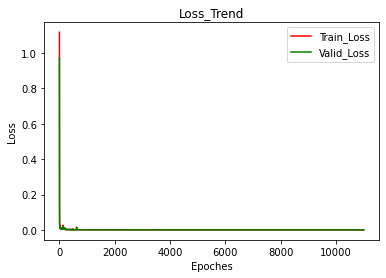

In [4]:
from time import time
TRAN_TAG = True
if TRAN_TAG:
    if path.exists("model/trajectory_predict_0707_44_4_30.pt"):
        Prednet.load_state_dict(torch.load('model/trajectory_predict_0707_44_4_30.pt'))
    Prednet = Prednet.double()
    Prednet = Prednet.to(device)
    start = time()
    trainIters(Prednet, 1000,0.001,20)
    print('Training time is:',time()-start,'s')

In [5]:
def calcu_XY(predY):
    #input: [batchsize len features]; features:[velx,vely,x,y]
    '''
    deltaY = v0*delta_t + 0.5* a *delta_t^2
    a = (v - v0)/delta_t
    vo
    '''
    vels = predY[:,:,0:2]
    rst_xy = np.zeros(predY[:,:,0:2].shape)
    rst_xy[:,:-predict_length,:] = predY[:,:-predict_length,2:4]
    delta_t = 0.1
    
    for i in range(predict_length):
        a = (vels[:,-(predict_length-i),:] - vels[:,-(predict_length+1-i),:])/delta_t
        delta_xy = vels[:,-(predict_length-i),:]*vels[:,-(predict_length-i),:]-vels[:,-(predict_length+1-i),:]*vels[:,-(predict_length+1-i),:]
        delta_xy = delta_xy/(2*a)
        rst_xy[:,-(predict_length-i),:] = rst_xy[:,-(predict_length+1-i),:] + delta_xy
    return rst_xy

In [28]:
def Eval_net(encoder,optmizer=False):
    n_trajectory_batch = 0
    loss = []
    MSE_pres, MSE_rsts = [],[]
    for local_batch, local_labels in Test:
        n_trajectory_batch = n_trajectory_batch + 1
        criterion = nn.MSELoss()
        local_batch = local_batch.to(device)
        local_labels = local_labels.to(device)
        predY = encoder(local_batch)
        #print(WholeSet.std.repeat(BatchSize,100,1).shape)
        test_loss = criterion(predY,local_labels)
        loss.append(test_loss.item())
        std = WholeSet.std.repeat(local_batch.shape[0],x.shape[1],1)
        std = std[:,:,:4].to(device)
        mn = WholeSet.mn.repeat(local_batch.shape[0],x.shape[1],1)
        mn = mn[:,:,:4].to(device)
        rg = WholeSet.range.repeat(local_batch.shape[0],x.shape[1],1)
        rg = rg[:,:,:4].to(device)
        predY = (predY*(rg*std)+mn).detach().cpu()
        pY = np.array(predY )
        local_labels = (local_labels*(rg*std)+mn).detach().cpu()
        Y = np.array(local_labels)
#         std = WholeSet.std.repeat(local_batch.shape[0],x.shape[1],1)
#         std = std[:,:,:44].to(device)
#         mn = WholeSet.mn.repeat(local_batch.shape[0],x.shape[1],1)
#         mn = mn[:,:,:44].to(device)
#         rg = WholeSet.range.repeat(local_batch.shape[0],x.shape[1],1)
#         rg = rg[:,:,:44].to(device)
#         B = (local_batch*(rg*std)+mn).detach().cpu()
#         B = np.array(B)
        pY[:,:-predict_length,:] = Y[:,:-predict_length,:]
        rst_xy = calcu_XY(pY)
        
        if n_trajectory_batch > 20:
            break
        for i in range(1):
            real_predict = torch.from_numpy(Y[i,-predict_length-1:,2:4])
            rst_predict = torch.from_numpy(rst_xy[i,-predict_length-1:,:2])
            pre_predict = torch.from_numpy(pY[i,-predict_length-1:,2:4])
            MSE_pre = criterion(real_predict,pre_predict)
            MSE_rst = criterion(real_predict,rst_predict)
            print("MSE pre:",MSE_pre.item())
            print("MSE RST:",MSE_rst.item())
            MSE_pres.append(MSE_pre.item())
            MSE_rsts.append(MSE_rst.item())
            plt.plot(Y[i,:-predict_length,2],Y[i,:-predict_length,3],'r',label = 'history trajectory')
            if optmizer:
                 plt.plot(rst_xy[i,-predict_length-1:,0],rst_xy[i,-predict_length-1:,1],'b',label=" prediction trajectory via optimizing")
#             plt.plot(pY[i,-predict_length-1:,2],pY[i,-predict_length-1:,3],'k',label='prediction trajectory')
            plt.plot(Y[i,-predict_length-1:,2],Y[i,-predict_length-1:,3],'g',label='Real trajectory')
            plt.title('Trajectory prediction')
            plt.xlabel('X ')
            plt.ylabel('Y ')
            plt.legend()
            if optmizer:
                plt.savefig("image/trajectory_output_optimization/trajectory_{}.svg".format(n_trajectory_batch),dpi=600)
            else:
                plt.savefig("image/trajectory_output/trajectory_{}.svg".format(n_trajectory_batch),dpi=600)
        plt.show()
#         print(pY[0,-predict_length-1:,3])
#         print(Y[0,-predict_length-1:,3])
#         print(B[0,-predict_length-1:,3])
        print('Test loss:',test_loss.item())
    print('average MSE_pre:',np.mean(MSE_pres))
    print('average MSE_rst:',np.mean(MSE_rsts))
    print('average loss:',np.mean(loss))

MSE pre: 0.22073218452177804
MSE RST: 0.0008582417233938439


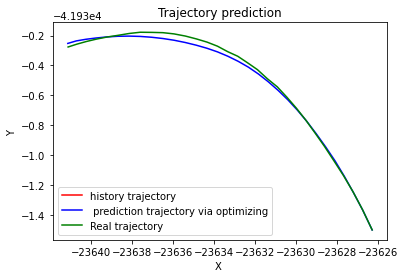

Test loss: 0.00017788925460647556
MSE pre: 0.30669732887490364
MSE RST: 0.00016836684592663764


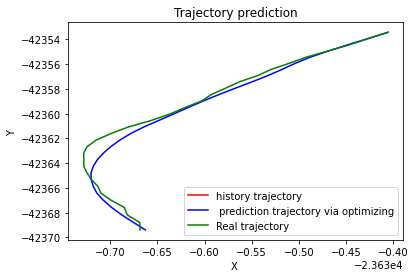

Test loss: 0.0002125704791880158
MSE pre: 0.2007972855180333
MSE RST: 0.0018510603608324716


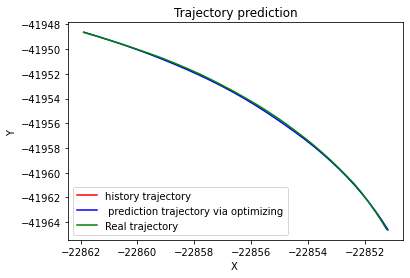

Test loss: 0.0001920693234076607
MSE pre: 0.7339351134474554
MSE RST: 0.012659030676561954


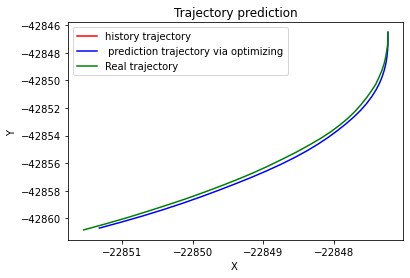

Test loss: 0.0001807972937769683
MSE pre: 0.778195227746314
MSE RST: 0.004060977960828709


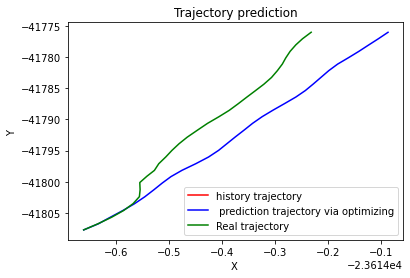

Test loss: 0.00018531186010760473
MSE pre: 1.5674791404210076
MSE RST: 0.05195723017772157


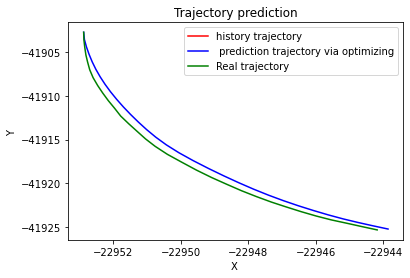

Test loss: 0.00017948647662093827
MSE pre: 0.6998790482711008
MSE RST: 0.015488986743945771


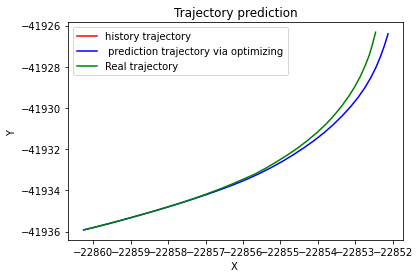

Test loss: 0.00019433951316650083
MSE pre: 0.5783664670873682
MSE RST: 0.01425637777230462


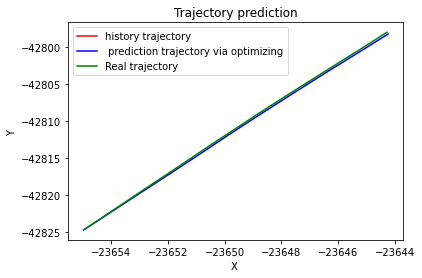

Test loss: 0.0001825422183935512
MSE pre: 0.4974772067992393
MSE RST: 0.0008318944566889914


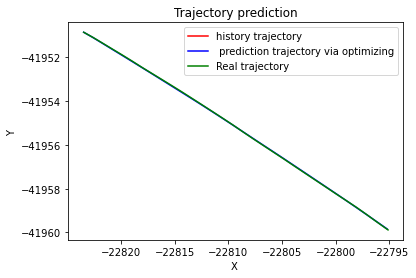

Test loss: 0.00015395924632227338
MSE pre: 8.226667204711871
MSE RST: 0.0449909744686354


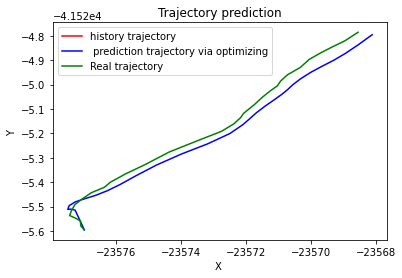

Test loss: 0.00017342958273838737
MSE pre: 0.7382012396980489
MSE RST: 0.011752760507269333


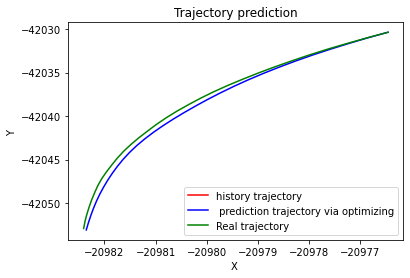

Test loss: 0.00016229181927775852
MSE pre: 0.09252542136654018
MSE RST: 0.0015687399706370627


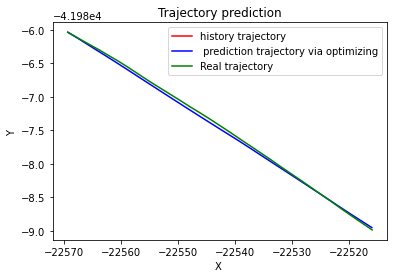

Test loss: 0.00016814494176223925
MSE pre: 0.2546418665370643
MSE RST: 0.002735757041080028


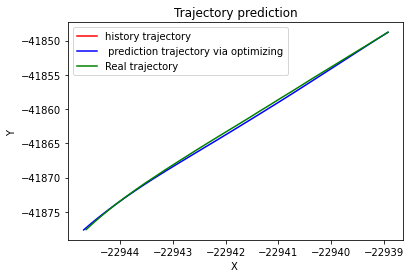

Test loss: 0.0001641598106300949
MSE pre: 0.10851441312399905
MSE RST: 0.014428266845275995


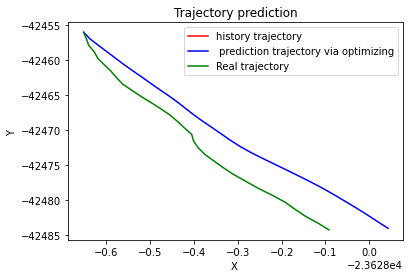

Test loss: 0.00018246266731786296
MSE pre: 1.298015653541725
MSE RST: 0.0048178170842982


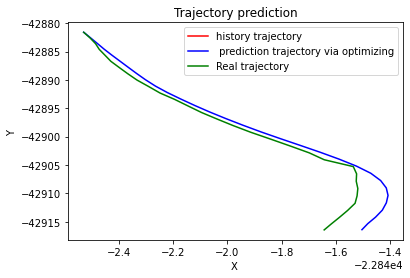

Test loss: 0.00017836054014453846
MSE pre: 0.09591589294968067
MSE RST: 0.007130084100708116


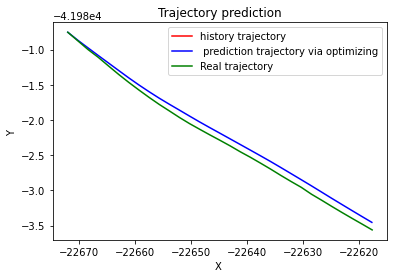

Test loss: 0.00017545592591185915
MSE pre: 0.6150552590095774
MSE RST: 0.007500947715482518


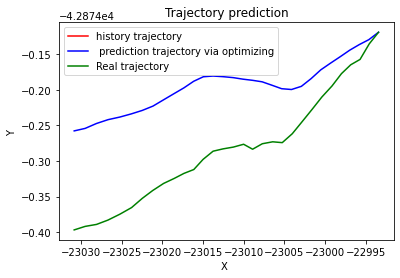

Test loss: 0.0003967513601850751
MSE pre: 0.637494216555766
MSE RST: 0.006405994240669453


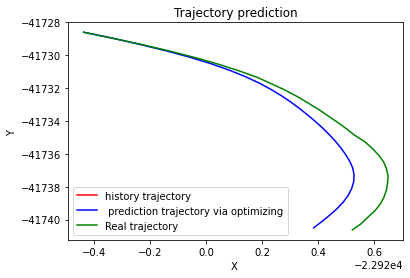

Test loss: 0.0001839167223466371
MSE pre: 0.6392898083793617
MSE RST: 0.0033783207869553973


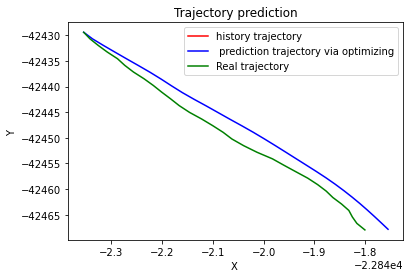

Test loss: 0.0001566425751784629
MSE pre: 0.12521105124704396
MSE RST: 0.003924036345354788


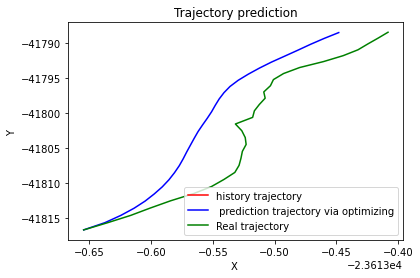

Test loss: 0.000147534730606578
average MSE_pre: 0.9207545514903938
average MSE_rst: 0.010538293291228544
average loss: 0.00018600930627270213


In [29]:
hidden_size = 256
Prednet = TraPred(x.shape[2], y.shape[2], hidden_size, x.shape[0])
Prednet.load_state_dict(torch.load('model/trajectory_predict_0707_44_4_30.pt'))
Prednet = Prednet.double()
Prednet = Prednet.to(device)
Prednet.eval()
Eval_net(Prednet, True)

In [30]:
def predict(model,test_load,n,optimizer=False):
    test = iter(test_load)
    x,y =  test.next()
    x,y = x.to(device),y.to(device)
    predY = model(x)
    criterion = nn.MSELoss()
    test_loss = criterion(predY,y)
    std = WholeSet.std.repeat(x.shape[0],x.shape[1],1)
    std = std[:,:,:4].to(device)
    mn = WholeSet.mn.repeat(x.shape[0],x.shape[1],1)
    mn = mn[:,:,:4].to(device)
    rg = WholeSet.range.repeat(x.shape[0],x.shape[1],1)
    rg = rg[:,:,:4].to(device)
    predY = (predY*(rg*std)+mn).detach().cpu()
    pY = np.array(predY)
    local_labels = (y*(rg*std)+mn).detach().cpu()
    Y = np.array(local_labels)
    pY[:,:-predict_length,:] = Y[:,:-predict_length,:]
    rst_xy = calcu_XY(pY)
    real_predict = torch.from_numpy(Y[:n,-predict_length-1:,2:4])
    rst_predict = torch.from_numpy(rst_xy[:n,-predict_length-1:,:2])
    pre_predict = torch.from_numpy(pY[:n,-predict_length-1:,2:4])
    MSE_pre = criterion(real_predict,pre_predict)
    MSE_rst = criterion(real_predict,rst_predict)
    print("MSE pre:",MSE_pre.item())
    print("MSE RST:",MSE_rst.item())
    plt.plot(Y[:n,:-predict_length,2][0],Y[:n,:-predict_length,3][0],'r',label = 'history trajectory')
    if optimizer:
        plt.plot(rst_xy[:n,-predict_length-1:,0][0],rst_xy[:n,-predict_length-1:,1][0],'b',label="prediction trajectory via optimizing")
#     plt.plot(pY[:n,-predict_length-1:,2][0],pY[:n,-predict_length-1:,3][0],'k',label='prediction trajectory')
    plt.plot(Y[:n,-predict_length-1:,2][0],Y[:n,-predict_length-1:,3][0],'g',label='Real trajectory')
    plt.title('Trajectory prediction')
    plt.xlabel('X ')
    plt.ylabel('Y ')
    plt.legend()
    if optimizer:
        plt.savefig("image/trajectory_output_optimization/trajectory_alone.svg",dpi = 600)
    else:
        plt.savefig("image/trajectory_output/trajectory_alone.svg",dpi = 600)
    
    print("Test Loss:",test_loss.item())

torch.Size([128, 31, 44])
MSE pre: 0.3942417807977103
MSE RST: 0.0025188805551680416
Test Loss: 0.00018262790155149905


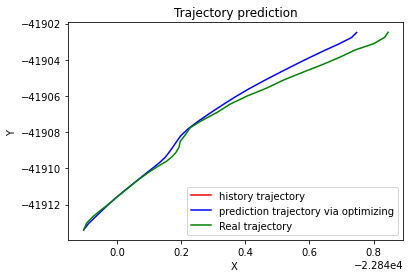

In [31]:
hidden_size = 256
print(x.shape)
Prednet = TraPred(x.shape[2], y.shape[2], hidden_size, x.shape[0])
Prednet.load_state_dict(torch.load('model/trajectory_predict_0707_44_4_30.pt'))
Prednet = Prednet.double()
Prednet = Prednet.to(device)
Prednet.eval()
predict(Prednet, Test, 1, True)

In [32]:
test_iter = iter(Test)
x, y = test_iter.next()
print(x.shape)
x,y = x.to(device),y.to(device)
x = x[0][0].view(-1,len(x[0][0])).unsqueeze(0)
predY = Prednet(x)
print(predY)
print(y[0][2])

torch.Size([128, 31, 44])
tensor([[[-0.1909, -0.2223, -0.1348,  0.9700]]], device='cuda:0',
       dtype=torch.float64, grad_fn=<AddBackward0>)
tensor([-0.3531, -0.4228, -0.1445,  0.9735], device='cuda:0',
       dtype=torch.float64)


In [33]:
from behavior_model import LSTM
def compute_label(input_x):
    std = WholeSet.std.repeat(input_x.shape[0],x.shape[1],1)
    std = std.to(device)
    mn = WholeSet.mn.repeat(input_x.shape[0],x.shape[1],1)
    mn = mn.to(device)
    rg = WholeSet.range.repeat(input_x.shape[0],x.shape[1],1)
    rg = rg.to(device)
    print(input_x.shape)
    input_return = (input_x*(rg*std)+mn).detach().cpu()
    #print(mn[0,0,-1],std[0,0,-1],rg[0,0,-1])
    net_behavior = LSTM(1,6,256,2) 
    net_behavior.load_state_dict(torch.load('model/behavior_prediction_0707_43_30.pth'))
    net_behavior.to(device)
    inputs = torch.from_numpy(input_return[:,:,:-1].detach().cpu().numpy().astype(np.float32)).to(device)
    inputs = inputs.view(-1,inputs.shape[2]).unsqueeze(2)
    h = net_behavior.init_hidden(inputs.shape[0])
    h = tuple([each.data for each in h])
    behavior,h = net_behavior(inputs,h)
    _, class_ = torch.max(behavior, dim=1)
    class_ = torch.from_numpy(class_.detach().cpu().numpy().astype(np.double)).to(device)
    class_ = class_.view(input_x.shape[0],x.shape[1],-1)
    y_ = input_return[:,:,-1].view(-1,1).numpy().tolist()
    std = std[:,:,-1].unsqueeze(2)
    rg = rg[:,:,-1].unsqueeze(2)
    mn = mn[:,:,-1].unsqueeze(2)
    class_ = (class_ -mn) / (std*rg)
    py = torch.cat((input_x[:,:,:-1],class_),2)
    return py

In [40]:
test_iter = iter(Test)
x, y= test_iter.next()
x,y = x.to(device),y.to(device)
print(x[0,0,-1])
print(compute_label(x)[0,0,-1])

tensor(-0.4075, device='cuda:0', dtype=torch.float64)
torch.Size([128, 31, 44])
tensor(-0.4075, device='cuda:0', dtype=torch.float64)


In [41]:
def Eval_net_behavior(encoder,optimization=False):
    n_trajectory_batch = 0
    loss = []
    MSE_pres,MSE_rsts = [],[]
    for local_batch, local_labels in Test:
        n_trajectory_batch = n_trajectory_batch + 1
        criterion = nn.MSELoss()
        local_batch = local_batch.to(device)
        local_labels = local_labels.to(device)
        
        yl = local_batch[:,:,-1].view(-1,1)
        local_batch = compute_label(local_batch)
        pred = local_batch[:,:,-1].view(-1,1)
        equal = yl.squeeze()==pred.squeeze()
        accu = torch.mean(equal.type(torch.FloatTensor)).item()
        print('Behavior accuracy:',accu)
        
        predY = encoder(local_batch)
        test_loss = criterion(predY,local_labels)
        loss.append(test_loss.item())
        std = WholeSet.std.repeat(local_batch.shape[0],x.shape[1],1)
        std = std[:,:,:4].to(device)
        mn = WholeSet.mn.repeat(local_batch.shape[0],x.shape[1],1)
        mn = mn[:,:,:4].to(device)
        rg = WholeSet.range.repeat(local_batch.shape[0],x.shape[1],1)
        rg = rg[:,:,:4].to(device)
        predY = (predY*(rg*std)+mn).detach().cpu()
        pY = np.array(predY )
       # pY =  scipy.signal.savgol_filter(pY, window_length=((x.shape[1]-11)//2)*2+1, polyorder=3,axis=1)
        local_labels = (local_labels*(rg*std)+mn).detach().cpu()
        Y = np.array(local_labels)
        pY[:,:-predict_length,:] = Y[:,:-predict_length,:]
        rst_xy = calcu_XY(pY)
        if n_trajectory_batch > 20:
            break
        for i in range(1):
            real_predict = torch.from_numpy(Y[i,-predict_length-1:,2:4])
            rst_predict = torch.from_numpy(rst_xy[i,-predict_length-1:,:2])
            pre_predict = torch.from_numpy(pY[i,-predict_length-1:,2:4])
            MSE_pre = criterion(real_predict,pre_predict)
            MSE_rst = criterion(real_predict,rst_predict)
            print("MSE pre:",MSE_pre.item())
            print("MSE RST:",MSE_rst.item())
            MSE_pres.append(MSE_pre.item())
            MSE_rsts.append(MSE_rst.item())
            plt.plot(Y[i,:-predict_length,2],Y[i,:-predict_length,3],'r',label = 'history trajectory')
            if optimization:
                plt.plot(rst_xy[i,-predict_length-1:,0],rst_xy[i,-predict_length-1:,1],'b',label=" prediction trajectory via optimizing")
#             plt.plot(pY[i,-predict_length-1:,2],pY[i,-predict_length-1:,3],'k',label='prediction trajectory')
            plt.plot(Y[i,-predict_length-1:,2],Y[i,-predict_length-1:,3],'g',label='Real trajectory')
            plt.title('Trajectory prediction')
            plt.xlabel('X ')
            plt.ylabel('Y ')
            plt.legend()
            if optimization:
                plt.savefig("image/trajectory_output_optimization/behavior_trajectory_{}.svg".format(n_trajectory_batch),dpi=600)
            else:
                plt.savefig("image/trajectory_output/behavior_trajectory_{}.svg".format(n_trajectory_batch),dpi=600)
        plt.show()
        print('Test loss:',test_loss.item())
    print('average MSE_PRE:',np.mean(MSE_pres))
    print('average MSE_RST:',np.mean(MSE_rsts))
    print('average loss:',np.mean(loss))

torch.Size([128, 31, 44])
Behavior accuracy: 0.9599294066429138
MSE pre: 0.537439371564404
MSE RST: 0.013137326710898303


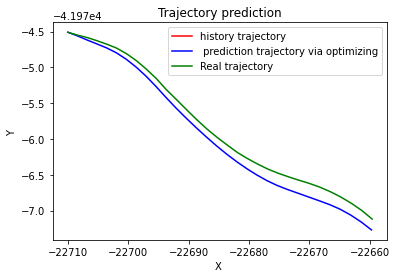

Test loss: 0.0007607840392918834
torch.Size([128, 31, 44])
Behavior accuracy: 0.977318525314331
MSE pre: 0.48583723737162593
MSE RST: 0.003364883467337896


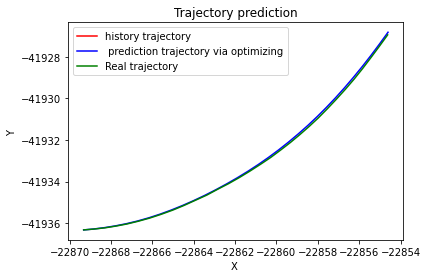

Test loss: 0.00017642946614762804
torch.Size([128, 31, 44])
Behavior accuracy: 0.9667338728904724
MSE pre: 0.21749640834425316
MSE RST: 0.011193373246120188


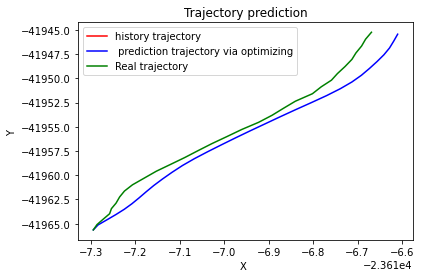

Test loss: 0.00023224351254273344
torch.Size([128, 31, 44])
Behavior accuracy: 0.9664818644523621
MSE pre: 1.6526425693242972
MSE RST: 0.047734549225071726


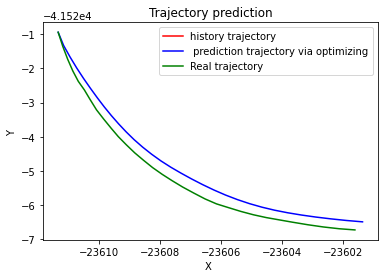

Test loss: 0.0003283325354041363
torch.Size([128, 31, 44])
Behavior accuracy: 0.9309476017951965
MSE pre: 0.8478654218312162
MSE RST: 0.0007282843930082303


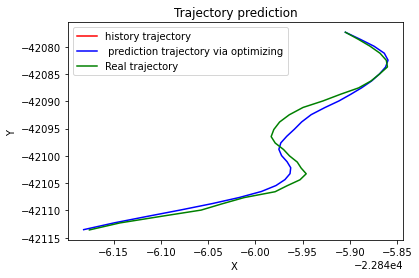

Test loss: 0.00030203510441912697
torch.Size([128, 31, 44])
Behavior accuracy: 0.9828628897666931
MSE pre: 0.6771455265198473
MSE RST: 0.0119594900922473


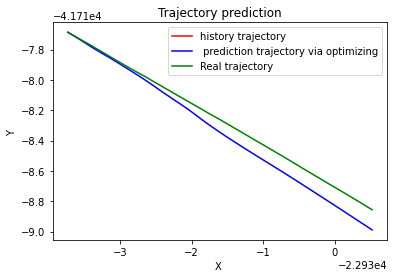

Test loss: 0.0001947609346017291
torch.Size([128, 31, 44])
Behavior accuracy: 0.9569052457809448
MSE pre: 0.27329395469865486
MSE RST: 0.004124374283029237


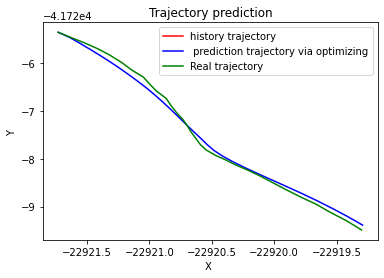

Test loss: 0.0002471126497770748
torch.Size([128, 31, 44])
Behavior accuracy: 0.9576612710952759
MSE pre: 0.24773000547613921
MSE RST: 0.0019249709541589817


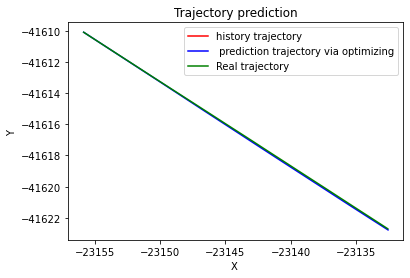

Test loss: 0.0002262768377904138
torch.Size([128, 31, 44])
Behavior accuracy: 0.9569052457809448
MSE pre: 0.19135467345532428
MSE RST: 0.0046738058429184525


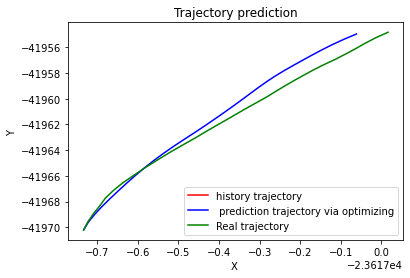

Test loss: 0.0007092713543834714
torch.Size([128, 31, 44])
Behavior accuracy: 0.9707661271095276
MSE pre: 0.3507415996953402
MSE RST: 0.0015755016433659532


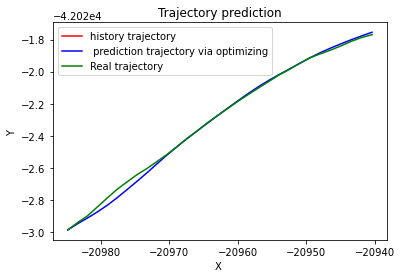

Test loss: 0.0008194351056017359
torch.Size([128, 31, 44])
Behavior accuracy: 0.9463205933570862
MSE pre: 0.34552514154746905
MSE RST: 0.009497319380389871


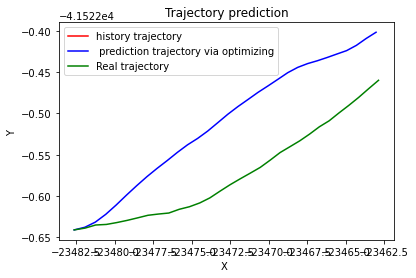

Test loss: 0.00029651000282098183
torch.Size([128, 31, 44])
Behavior accuracy: 0.9692540168762207
MSE pre: 1.645945965710941
MSE RST: 0.023845045492064388


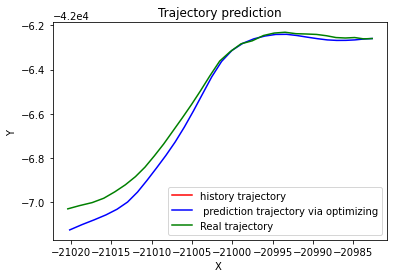

Test loss: 0.000324233965111848
torch.Size([128, 31, 44])
Behavior accuracy: 0.9493447542190552
MSE pre: 0.5129108440123618
MSE RST: 0.0019838600038859506


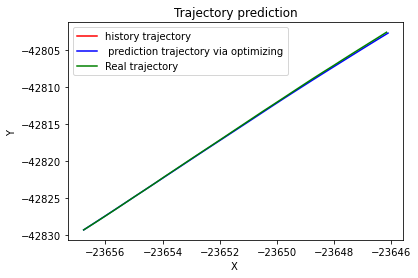

Test loss: 0.0003680164328276557
torch.Size([128, 31, 44])
Behavior accuracy: 0.9715221524238586
MSE pre: 0.01228772375097195
MSE RST: 0.004680183137748158


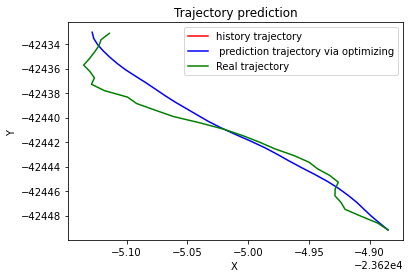

Test loss: 0.00048423661355084325
torch.Size([128, 31, 44])
Behavior accuracy: 0.9609375
MSE pre: 0.2838334515770369
MSE RST: 0.014867545207485587


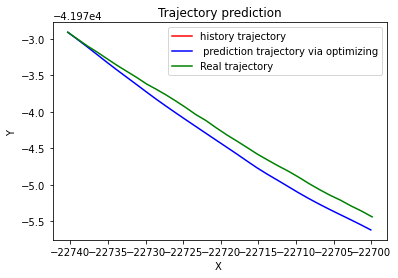

Test loss: 0.00027455350332757534
torch.Size([128, 31, 44])
Behavior accuracy: 0.9846270084381104
MSE pre: 0.8373424090398793
MSE RST: 0.0066233110540017326


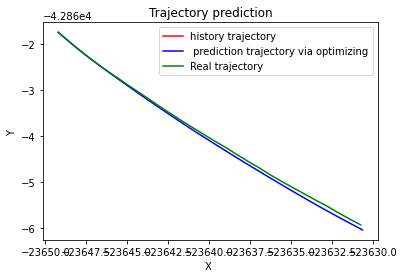

Test loss: 0.00014335551261332268
torch.Size([128, 31, 44])
Behavior accuracy: 0.9634576439857483
MSE pre: 0.1734935194573632
MSE RST: 0.0010030258839359213


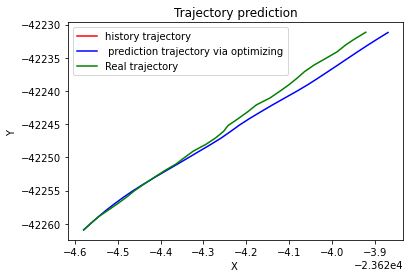

Test loss: 0.00032809519698808837
torch.Size([128, 31, 44])
Behavior accuracy: 0.9808467626571655
MSE pre: 0.6055505380002323
MSE RST: 0.009043436516982436


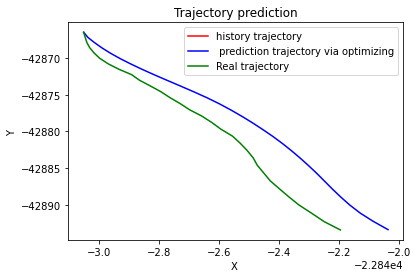

Test loss: 0.0002003493402625847
torch.Size([128, 31, 44])
Behavior accuracy: 0.9594253897666931
MSE pre: 0.11602767902305147
MSE RST: 0.00047765429939494025


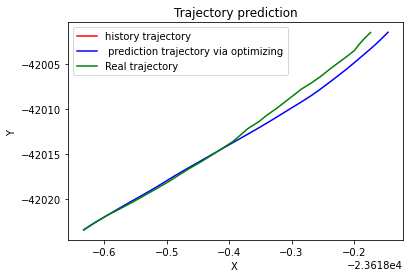

Test loss: 0.0002956284953353568
torch.Size([128, 31, 44])
Behavior accuracy: 0.9710181355476379
MSE pre: 1.4189050598070965
MSE RST: 0.01061744791504847


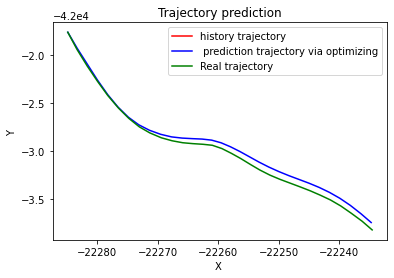

Test loss: 0.00035250048717120496
torch.Size([128, 31, 44])
Behavior accuracy: 0.9228830933570862
average MSE_PRE: 0.5716684550103752
average MSE_RST: 0.009152769437454685
average loss: 0.00035903806165022307


In [42]:
Eval_net_behavior(Prednet, True)

In [43]:
def predict_trajectory_behavior(model,n,optimization=False):
    test = iter(Test)
    x,y =  test.next()
    x,y = x.to(device),y.to(device)
    yl = x[:,:,-1].view(-1,1)
    x = compute_label(x)
    pred = x[:,:,-1].view(-1,1)
    equal = yl.squeeze()==pred.squeeze()
    accu = torch.mean(equal.type(torch.FloatTensor)).item()
    print('Behavior accuracy:',accu)
    
    predY = model(x)
    criterion = nn.MSELoss()
    test_loss = criterion(predY,y)
    std = WholeSet.std.repeat(x.shape[0],x.shape[1],1)
    std = std[:,:,:4].to(device)
    mn = WholeSet.mn.repeat(x.shape[0],x.shape[1],1)
    mn = mn[:,:,:4].to(device)
    rg = WholeSet.range.repeat(x.shape[0],x.shape[1],1)
    rg = rg[:,:,:4].to(device)
    predY = (predY*(rg*std)+mn).detach().cpu()
    pY = np.array(predY)
    #pY =  scipy.signal.savgol_filter(pY, window_length=((x.shape[1]-1)//2)*2+1, polyorder=3,axis=1)
    local_labels = (y*(rg*std)+mn).detach().cpu()
    Y = np.array(local_labels)
    pY[:,:-predict_length,:] = Y[:,:-predict_length,:]
    rst_xy = calcu_XY(pY)
    real_predict = torch.from_numpy(Y[:n,-predict_length-1:,2:4])
    rst_predict = torch.from_numpy(rst_xy[:n,-predict_length-1:,:2])
    pre_predict = torch.from_numpy(pY[:n,-predict_length-1:,2:4])
    MSE_pre = criterion(real_predict,pre_predict)
    MSE_rst = criterion(real_predict,rst_predict)
    print("MSE pre:",MSE_pre.item())
    print("MSE RST:",MSE_rst.item())
    plt.plot(Y[:n,:-predict_length,2][0],Y[:n,:-predict_length,3][0],'r',label = 'history trajectory')
    if optimization:
        plt.plot(rst_xy[:n,-predict_length-1:,0][0],rst_xy[:n,-predict_length-1:,1][0],'b',label="prediction trajectory via optimizing")
#     plt.plot(pY[:n,-predict_length-1:,2][0],pY[:n,-predict_length-1:,3][0],'k',label='prediction trajectory')
    plt.plot(Y[:n,-predict_length-1:,2][0],Y[:n,-predict_length-1:,3][0],'g',label='Real trajectory')
    plt.title('Trajectory prediction')
    plt.xlabel('X ')
    plt.ylabel('Y ')
    plt.legend()
    if optimization:
        plt.savefig("image/trajectory_output_optimization/behavior_trajectory_alone.svg",dpi = 600)
    else:
        plt.savefig("image/trajectory_output/behavior_trajectory_alone.svg",dpi = 600)
    print("Test Loss:",test_loss.item())

torch.Size([128, 31, 44])
Behavior accuracy: 0.9889112710952759
MSE pre: 2.019565208004957
MSE RST: 0.02813840391767918
Test Loss: 0.00017073256832522091


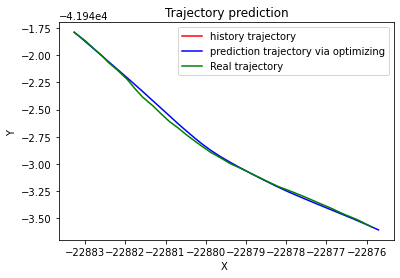

In [50]:
predict_trajectory_behavior(Prednet,7,True)

In [51]:
Prednet.load_state_dict(torch.load('model/trajectory_predict_0707_44_4_30.pt'))
Prednet.cuda().eval()
from time import time
# An example input you would normally provide to your model's forward() method.
#example = torch.rand(1, 4)

example = torch.ones(1,31,44).double().cuda()
t = time()
out = Prednet(example)
print('time',(time()-t)*1000)
print(out)
# Use torch.jit.trace to generate a torch.jit.ScriptModule via tracing.
traced_script_module = torch.jit.trace(Prednet, example)
traced_script_module.save("model/trajectory_prediction_LSTM_0707_31_30_cuda.pt")
example1 = torch.zeros(1,31,44).double().cuda()
out = traced_script_module(example)
out1 = traced_script_module(example1)
print(out)
print(out1)

time 3.5092830657958984
tensor([[[1.8500, 0.6697, 1.1031, 0.9745],
         [1.8178, 0.7030, 1.1000, 0.9819],
         [1.8962, 0.7940, 1.0982, 0.9914],
         [1.8579, 0.9711, 1.0881, 0.9914],
         [1.7114, 1.1523, 1.0739, 0.9878],
         [1.5250, 1.3313, 1.0615, 0.9902],
         [1.3109, 1.5142, 1.0522, 0.9992],
         [1.1260, 1.6511, 1.0466, 1.0098],
         [1.0239, 1.7099, 1.0420, 1.0155],
         [1.0047, 1.7070, 1.0365, 1.0147],
         [1.0173, 1.6866, 1.0307, 1.0108],
         [1.0305, 1.6681, 1.0255, 1.0066],
         [1.0415, 1.6498, 1.0215, 1.0037],
         [1.0517, 1.6369, 1.0192, 1.0023],
         [1.0635, 1.6273, 1.0182, 1.0015],
         [1.0757, 1.6177, 1.0178, 1.0010],
         [1.0848, 1.6086, 1.0179, 1.0005],
         [1.0834, 1.6036, 1.0181, 0.9995],
         [1.0592, 1.6092, 1.0182, 0.9974],
         [1.0033, 1.6300, 1.0181, 0.9934],
         [0.9277, 1.6621, 1.0188, 0.9897],
         [0.8498, 1.6977, 1.0204, 0.9890],
         [0.7802, 1.7279, 1.02